In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

Using TensorFlow backend.


In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 1000
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
sim_rln_train,agent = MaaSSim.simulators.simulate_RLn_with_agent(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-04-21 22:27:18,422] Setting up 4h simulation at 2023-04-21 20:27:09 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
---------------1585------------------
-------------------------------------
Day =  0
comm_rate =  0.15


[2023-04-21 22:27:26,922] simulation time 3.5 s


nP =  0    nV =  0
revenue =  0.0    npnv =  0.0
reward: 0.0
mean reward so far: nan
mean revenue so far: nan
Day =  1
comm_rate =  0.15


[2023-04-21 22:27:35,871] simulation time 3.9 s


nP =  20    nV =  1
revenue =  0.0012107693181818181    npnv =  0.01275
reward: 12.5636925
mean reward so far: 0.0
mean revenue so far: 0.0
Day =  2
comm_rate =  0.1


[2023-04-21 22:27:45,925] simulation time 4.8 s


nP =  46    nV =  7
revenue =  0.0018639522727272727    npnv =  0.049300000000000004
reward: 42.380695
mean reward so far: 6.28184625
mean revenue so far: 10.65477
Day =  3
comm_rate =  0.15


[2023-04-21 22:27:56,092] simulation time 4.8 s


nP =  63    nV =  3
revenue =  0.003897347727272726    npnv =  0.039525
reward: 39.264165000000006
mean reward so far: 18.314795833333335
mean revenue so far: 18.038366666666665
Day =  4
comm_rate =  0.2


[2023-04-21 22:28:06,481] simulation time 5.2 s


nP =  66    nV =  5
revenue =  0.0054873272727272715    npnv =  0.049300000000000004
reward: 50.35212
mean reward so far: 23.552138125000003
mean revenue so far: 30.677104999999997
Day =  5
comm_rate =  0.25


[2023-04-21 22:28:17,918] simulation time 6.1 s


nP =  96    nV =  9
revenue =  0.01053363068181818    npnv =  0.07905
reward: 84.5539875
mean reward so far: 28.9121345
mean revenue so far: 43.85707599999999
Day =  6
comm_rate =  0.2


[2023-04-21 22:28:28,694] simulation time 5.4 s


nP =  99    nV =  4
revenue =  0.008166940909090908    npnv =  0.059075
reward: 63.837270000000004
mean reward so far: 38.18577666666667
mean revenue so far: 67.44621333333333
Day =  7
comm_rate =  0.15


[2023-04-21 22:28:40,244] simulation time 6.4 s


nP =  106    nV =  13
revenue =  0.00673870568181818    npnv =  0.10029999999999999
reward: 92.7051525
mean reward so far: 41.850275714285715
mean revenue so far: 78.34506285714285
Day =  8
comm_rate =  0.15


[2023-04-21 22:28:52,234] simulation time 6.6 s


nP =  117    nV =  13
revenue =  0.007367573863636363    npnv =  0.104975
reward: 97.71866250000001
mean reward so far: 48.2071353125
mean revenue so far: 83.3770825
Day =  9
comm_rate =  0.15


[2023-04-21 22:29:04,885] simulation time 7.2 s


nP =  138    nV =  12
revenue =  0.008761817045454545    npnv =  0.10965
reward: 104.4159975
mean reward so far: 53.70841611111111
mean revenue so far: 88.52066222222223
Day =  10
comm_rate =  0.1


[2023-04-21 22:29:17,023] simulation time 6.9 s


nP =  125    nV =  12
revenue =  0.005109895454545455    npnv =  0.104125
reward: 92.09177
mean reward so far: 58.779174250000004
mean revenue so far: 95.089394
Day =  11
comm_rate =  0.1


[2023-04-21 22:29:29,870] simulation time 7.5 s


nP =  151    nV =  11
revenue =  0.006120059090909092    npnv =  0.110925
reward: 99.59413
mean reward so far: 61.80759204545455
mean revenue so far: 94.62073636363635
Day =  12
comm_rate =  0.05


[2023-04-21 22:29:42,616] simulation time 7.4 s


nP =  146    nV =  13
revenue =  0.0029154556818181813    npnv =  0.1173
reward: 97.49400250000001
mean reward so far: 64.95647020833333
mean revenue so far: 95.71176166666667
Day =  13
comm_rate =  0.05


[2023-04-21 22:29:55,341] simulation time 7.6 s


nP =  159    nV =  12
revenue =  0.003225951136363636    npnv =  0.11857500000000001
reward: 99.16709250000001
mean reward so far: 67.4593573076923
mean revenue so far: 92.29639692307693
Day =  14
comm_rate =  0


[2023-04-21 22:30:07,960] simulation time 7.3 s


nP =  145    nV =  20
revenue =  0.0    npnv =  0.14662499999999998
reward: 113.85
mean reward so far: 69.72419553571429
mean revenue so far: 89.75927857142858
Day =  15
comm_rate =  0.05


[2023-04-21 22:30:21,384] simulation time 8.2 s


nP =  173    nV =  19
revenue =  0.003709811363636364    npnv =  0.154275
reward: 127.951585
mean reward so far: 72.66591583333333
mean revenue so far: 83.77532666666667
Day =  16
comm_rate =  0


[2023-04-21 22:30:34,089] simulation time 7.6 s


nP =  155    nV =  12
revenue =  0.0    npnv =  0.116875
reward: 90.75000000000001
mean reward so far: 76.12127015625
mean revenue so far: 82.62016125
Day =  17
comm_rate =  0


[2023-04-21 22:30:47,120] simulation time 7.6 s


nP =  152    nV =  22
revenue =  0.0    npnv =  0.1581
reward: 122.76
mean reward so far: 76.9817836764706
mean revenue so far: 77.76015176470588
Day =  18
comm_rate =  0.05


[2023-04-21 22:31:00,317] simulation time 8.0 s


nP =  166    nV =  17
revenue =  0.0034346613636363635    npnv =  0.1428
reward: 118.43625500000002
mean reward so far: 79.52501791666667
mean revenue so far: 73.44014333333332
Day =  19
comm_rate =  0


[2023-04-21 22:31:13,335] simulation time 7.6 s


nP =  146    nV =  18
revenue =  0.0    npnv =  0.13854999999999998
reward: 107.57999999999998
mean reward so far: 81.57297776315791
mean revenue so far: 72.75645368421051
Day =  20
comm_rate =  0.05


[2023-04-21 22:31:26,369] simulation time 7.6 s


nP =  155    nV =  23
revenue =  0.0032368511363636363    npnv =  0.163625
reward: 134.1710725
mean reward so far: 82.873328875
mean revenue so far: 69.118631
Day =  21
comm_rate =  0.1


[2023-04-21 22:31:38,993] simulation time 7.5 s


nP =  149    nV =  13
revenue =  0.006021159090909091    npnv =  0.11857500000000001
reward: 105.31655
mean reward so far: 85.31607857142858
mean revenue so far: 68.54005714285714
Day =  22
comm_rate =  0.05


[2023-04-21 22:31:52,334] simulation time 8.0 s


nP =  170    nV =  18
revenue =  0.0035610624999999996    npnv =  0.14875
reward: 123.33433749999999
mean reward so far: 86.22519090909091
mean revenue so far: 70.24152727272727
Day =  23
comm_rate =  0.1


[2023-04-21 22:32:05,697] simulation time 8.1 s


nP =  169    nV =  12
revenue =  0.007205104545454546    npnv =  0.12282500000000002
reward: 111.22123
mean reward so far: 87.8386320652174
mean revenue so far: 69.91253478260869
Day =  24
comm_rate =  0.15


[2023-04-21 22:32:18,566] simulation time 7.7 s


nP =  161    nV =  12
revenue =  0.009740979545454545    npnv =  0.119425
reward: 114.160155
mean reward so far: 88.81290697916667
mean revenue so far: 72.28325583333333
Day =  25
comm_rate =  0.15


[2023-04-21 22:32:32,031] simulation time 8.0 s


nP =  168    nV =  23
revenue =  0.010879874999999999    npnv =  0.16915
reward: 155.275725
mean reward so far: 89.8267969
mean revenue so far: 76.2495752
Day =  26
comm_rate =  0.1


[2023-04-21 22:32:44,659] simulation time 7.4 s


nP =  143    nV =  20
revenue =  0.005915552272727273    npnv =  0.145775
reward: 126.204215
mean reward so far: 92.34406336538463
mean revenue so far: 80.68173769230769
Day =  27
comm_rate =  0.1


[2023-04-21 22:32:58,193] simulation time 8.1 s


nP =  173    nV =  14
revenue =  0.00717365    npnv =  0.133025
reward: 119.07203000000001
mean reward so far: 93.59814305555557
mean revenue so far: 81.54958888888888
Day =  28
comm_rate =  0.05


[2023-04-21 22:33:11,126] simulation time 7.5 s


nP =  151    nV =  19
revenue =  0.0031814511363636366    npnv =  0.14492499999999997
reward: 119.5291925
mean reward so far: 94.50792473214287
mean revenue so far: 83.146255
Day =  29
comm_rate =  0.1


[2023-04-21 22:33:23,885] simulation time 7.6 s


nP =  153    nV =  16
revenue =  0.0064166045454545455    npnv =  0.133025
reward: 117.40653
mean reward so far: 95.37072706896552
mean revenue so far: 82.20995448275862
Day =  30
comm_rate =  0.1


[2023-04-21 22:33:37,047] simulation time 7.6 s


nP =  158    nV =  11
revenue =  0.006625311363636363    npnv =  0.1139
reward: 103.01568500000002
mean reward so far: 96.10525383333335
mean revenue so far: 83.23403066666667
Day =  31
comm_rate =  0.15


[2023-04-21 22:33:49,438] simulation time 7.1 s


nP =  164    nV =  8
revenue =  0.010417104545454543    npnv =  0.1037
reward: 103.43763
mean reward so far: 96.32817096774195
mean revenue so far: 84.31052903225807
Day =  32
comm_rate =  0.1


[2023-04-21 22:34:02,469] simulation time 7.6 s


nP =  155    nV =  15
revenue =  0.006338736363636363    npnv =  0.129625
reward: 114.59522
mean reward so far: 96.55034156250001
mean revenue so far: 87.40523249999998
Day =  33
comm_rate =  0.1


[2023-04-21 22:34:15,905] simulation time 8.2 s


nP =  174    nV =  17
revenue =  0.007587259090909092    npnv =  0.1462
reward: 130.21197
mean reward so far: 97.09715606060607
mean revenue so far: 88.13724848484847
Day =  34
comm_rate =  0.1


[2023-04-21 22:34:29,320] simulation time 7.8 s


nP =  158    nV =  15
revenue =  0.006801431818181817    npnv =  0.1309
reward: 116.60315
mean reward so far: 98.0711211764706
mean revenue so far: 89.4724988235294
Day =  35
comm_rate =  0.15


[2023-04-21 22:34:42,542] simulation time 7.9 s


nP =  159    nV =  27
revenue =  0.010185524999999999    npnv =  0.18232500000000001
reward: 163.97815500000002
mean reward so far: 98.60060771428572
mean revenue so far: 90.33629028571427
Day =  36
comm_rate =  0.2


[2023-04-21 22:34:55,637] simulation time 7.5 s


nP =  145    nV =  21
revenue =  0.012374163636363636    npnv =  0.15087499999999998
reward: 144.37315999999998
mean reward so far: 100.41665069444444
mean revenue so far: 92.80653888888888
Day =  37
comm_rate =  0.25


[2023-04-21 22:35:08,368] simulation time 7.5 s


nP =  147    nV =  13
revenue =  0.015215761363636364    npnv =  0.11772500000000001
reward: 124.88467500000002
mean reward so far: 101.60466445945946
mean revenue so far: 96.1843427027027
Day =  38
comm_rate =  0.2


[2023-04-21 22:35:21,983] simulation time 8.0 s


nP =  161    nV =  15
revenue =  0.01457474090909091    npnv =  0.132175
reward: 134.69443
mean reward so far: 102.21729631578948
mean revenue so far: 100.70047578947367
Day =  39
comm_rate =  0.2


[2023-04-21 22:35:35,871] simulation time 8.5 s


nP =  185    nV =  13
revenue =  0.015266977272727272    npnv =  0.133875
reward: 137.53735
mean reward so far: 103.05004333333333
mean revenue so far: 104.69573128205128
Day =  40
comm_rate =  0.2


[2023-04-21 22:35:49,483] simulation time 8.2 s


nP =  169    nV =  18
revenue =  0.01391347727272727    npnv =  0.14832499999999998
reward: 145.77965
mean reward so far: 103.912226
mean revenue so far: 108.795808
Day =  41
comm_rate =  0.25


[2023-04-21 22:36:02,872] simulation time 8.0 s


nP =  178    nV =  11
revenue =  0.0182888125    npnv =  0.12239999999999998
reward: 135.2753875
mean reward so far: 104.93338268292685
mean revenue so far: 112.1148663414634
Day =  42
comm_rate =  0.2


[2023-04-21 22:36:16,158] simulation time 7.8 s


nP =  161    nV =  18
revenue =  0.013919868181818182    npnv =  0.14492499999999997
reward: 143.15371
mean reward so far: 105.65581136904764
mean revenue so far: 117.10934809523808
Day =  43
comm_rate =  0.25


[2023-04-21 22:36:29,297] simulation time 8.0 s


nP =  163    nV =  17
revenue =  0.017097420454545452    npnv =  0.141525
reward: 147.504325
mean reward so far: 106.52785552325582
mean revenue so far: 120.08330930232556
Day =  44
comm_rate =  0.25


[2023-04-21 22:36:42,267] simulation time 7.8 s


nP =  159    nV =  17
revenue =  0.016689528409090906    npnv =  0.139825
reward: 145.28696250000002
mean reward so far: 107.45913892045455
mean revenue so far: 124.19311136363635
Day =  45
comm_rate =  0.3


[2023-04-21 22:36:55,476] simulation time 8.0 s


nP =  176    nV =  15
revenue =  0.022204663636363635    npnv =  0.13854999999999998
reward: 156.43025999999998
mean reward so far: 108.29975722222223
mean revenue so far: 127.96072444444442
Day =  46
comm_rate =  0.3


[2023-04-21 22:37:08,915] simulation time 8.0 s


nP =  180    nV =  16
revenue =  0.021543749999999997    npnv =  0.1445
reward: 159.59625
mean reward so far: 109.3460725
mean revenue so far: 133.67466695652175
Day =  47
comm_rate =  0.25


[2023-04-21 22:37:21,905] simulation time 7.8 s


nP =  160    nV =  19
revenue =  0.017479170454545456    npnv =  0.14875
reward: 153.954175
mean reward so far: 110.41522521276596
mean revenue so far: 138.89797191489362
Day =  48
comm_rate =  0.25


[2023-04-21 22:37:35,264] simulation time 8.1 s


nP =  178    nV =  18
revenue =  0.018946238636363636    npnv =  0.15214999999999998
reward: 159.82172500000001
mean reward so far: 111.32228666666667
mean revenue so far: 142.4132933333333
Day =  49
comm_rate =  0.2


[2023-04-21 22:37:48,634] simulation time 8.1 s


nP =  180    nV =  15
revenue =  0.015113386363636362    npnv =  0.14024999999999999
reward: 142.14945
mean reward so far: 112.31207112244897
mean revenue so far: 146.31207918367346
Day =  50
comm_rate =  0.15


[2023-04-21 22:38:01,749] simulation time 7.7 s


nP =  158    nV =  19
revenue =  0.010195019318181816    npnv =  0.14789999999999998
reward: 137.26904249999998
mean reward so far: 112.9088187
mean revenue so far: 148.7057496
Day =  51
comm_rate =  0.2


[2023-04-21 22:38:15,212] simulation time 8.2 s


nP =  165    nV =  12
revenue =  0.014549495454545454    npnv =  0.12112500000000001
reward: 126.05889000000002
mean reward so far: 113.38647014705882
mean revenue so far: 149.30823176470588
Day =  52
comm_rate =  0.15


[2023-04-21 22:38:28,314] simulation time 7.4 s


nP =  150    nV =  12
revenue =  0.009211152272727272    npnv =  0.11475
reward: 109.364535
mean reward so far: 113.63017052884615
mean revenue so far: 151.36136423076923
Day =  53
comm_rate =  0.1


[2023-04-21 22:38:41,093] simulation time 7.6 s


nP =  157    nV =  15
revenue =  0.006358538636363637    npnv =  0.130475
reward: 115.29878500000001
mean reward so far: 113.54968683962264
mean revenue so far: 151.5642871698113
Day =  54
comm_rate =  0.05


[2023-04-21 22:38:54,104] simulation time 7.8 s


nP =  161    nV =  14
revenue =  0.003349194318181818    npnv =  0.127925
reward: 106.69822750000002
mean reward so far: 113.58207754629629
mean revenue so far: 150.8299537037037
Day =  55
comm_rate =  0.1


[2023-04-21 22:39:07,091] simulation time 7.5 s


nP =  170    nV =  10
revenue =  0.0071789340909090915    npnv =  0.11475
reward: 104.89365500000001
mean reward so far: 113.45691663636363
mean revenue so far: 149.1593330909091
Day =  56
comm_rate =  0.05


[2023-04-21 22:39:20,652] simulation time 8.3 s


nP =  191    nV =  14
revenue =  0.003950489772727272    npnv =  0.140675
reward: 117.9210775
mean reward so far: 113.30400124999998
mean revenue so far: 148.75200999999998
Day =  57
comm_rate =  0.05


[2023-04-21 22:39:34,526] simulation time 8.4 s


nP =  183    nV =  22
revenue =  0.0037675943181818185    npnv =  0.171275
reward: 141.2787075
mean reward so far: 113.38500258771928
mean revenue so far: 147.36212596491225
Day =  58
comm_rate =  0.1


[2023-04-21 22:39:47,293] simulation time 7.6 s


nP =  172    nV =  11
revenue =  0.007050045454545455    npnv =  0.11984999999999998
reward: 108.5701
mean reward so far: 113.86592853448275
mean revenue so far: 145.9646696551724
Day =  59
comm_rate =  0.1


[2023-04-21 22:40:00,768] simulation time 8.0 s


nP =  172    nV =  14
revenue =  0.007063163636363636    npnv =  0.1326
reward: 118.49896
mean reward so far: 113.77616872881354
mean revenue so far: 145.5937566101695
Day =  60
comm_rate =  0.15


[2023-04-21 22:40:13,779] simulation time 7.8 s


nP =  168    nV =  20
revenue =  0.010682192045454545    npnv =  0.15639999999999998
reward: 144.9408225
mean reward so far: 113.85488191666666
mean revenue so far: 145.23905533333334
Day =  61
comm_rate =  0.1


[2023-04-21 22:40:27,356] simulation time 8.1 s


nP =  176    nV =  17
revenue =  0.007308506818181819    npnv =  0.14705
reward: 130.258715
mean reward so far: 114.36448749999998
mean revenue so far: 145.94016229508196
Day =  62
comm_rate =  0.15


[2023-04-21 22:40:40,085] simulation time 7.5 s


nP =  154    nV =  20
revenue =  0.009044669318181816    npnv =  0.15045
reward: 136.71827249999998
mean reward so far: 114.62084600806449
mean revenue so far: 145.66096161290324
Day =  63
comm_rate =  0.2


[2023-04-21 22:40:53,073] simulation time 7.7 s


nP =  162    nV =  16
revenue =  0.012465204545454547    npnv =  0.13685
reward: 133.68345000000002
mean reward so far: 114.9715988095238
mean revenue so far: 145.87564761904764
Day =  64
comm_rate =  0.15


[2023-04-21 22:41:06,781] simulation time 8.2 s


nP =  184    nV =  14
revenue =  0.011583436363636363    npnv =  0.1377
reward: 132.40356
mean reward so far: 115.26397148437499
mean revenue so far: 147.024271875
Day =  65
comm_rate =  0.15


[2023-04-21 22:41:19,981] simulation time 8.0 s


nP =  173    nV =  23
revenue =  0.010481137499999998    npnv =  0.171275
reward: 156.0485025
mean reward so far: 115.52765746153845
mean revenue so far: 147.89879815384614
Day =  66
comm_rate =  0.15


[2023-04-21 22:41:33,181] simulation time 7.9 s


nP =  169    nV =  28
revenue =  0.010327261363636363    npnv =  0.19082500000000002
reward: 170.88997500000002
mean reward so far: 116.14160965909089
mean revenue so far: 148.45287727272728
Day =  67
comm_rate =  0.1


[2023-04-21 22:41:46,688] simulation time 8.0 s


nP =  174    nV =  21
revenue =  0.0068599636363636364    npnv =  0.1632
reward: 141.81192
mean reward so far: 116.95874944029849
mean revenue so far: 148.94999552238806
Day =  68
comm_rate =  0.1


[2023-04-21 22:42:00,212] simulation time 8.4 s


nP =  194    nV =  16
revenue =  0.008208486363636363    npnv =  0.15045
reward: 134.87867
mean reward so far: 117.32423724264704
mean revenue so far: 148.53507441176473
Day =  69
comm_rate =  0.1


[2023-04-21 22:42:13,451] simulation time 8.0 s


nP =  178    nV =  12
revenue =  0.006972918181818182    npnv =  0.12664999999999998
reward: 113.68041999999998
mean reward so far: 117.57864931159419
mean revenue so far: 148.47615101449276
Day =  70
comm_rate =  0.15


[2023-04-21 22:42:27,032] simulation time 8.1 s


nP =  179    nV =  16
revenue =  0.010701463636363635    npnv =  0.14407499999999998
reward: 135.41322
mean reward so far: 117.52296032142856
mean revenue so far: 148.108254
Day =  71
comm_rate =  0.2


[2023-04-21 22:42:39,822] simulation time 7.6 s


nP =  172    nV =  10
revenue =  0.013658313636363637    npnv =  0.11560000000000001
reward: 119.80829
mean reward so far: 117.77493580985914
mean revenue so far: 148.6749794366197
Day =  72
comm_rate =  0.25


[2023-04-21 22:42:53,641] simulation time 8.3 s


nP =  186    nV =  20
revenue =  0.018381392045454546    npnv =  0.16405
reward: 167.81906250000003
mean reward so far: 117.80317684027776
mean revenue so far: 149.94874805555557
Day =  73
comm_rate =  0.3


[2023-04-21 22:43:06,957] simulation time 8.1 s


nP =  205    nV =  11
revenue =  0.025315990909090903    npnv =  0.133875
reward: 159.64517999999998
mean reward so far: 118.4883259589041
mean revenue so far: 152.32633369863015
Day =  74
comm_rate =  0.35


[2023-04-21 22:43:19,845] simulation time 7.6 s


nP =  162    nV =  18
revenue =  0.02173325795454545    npnv =  0.14534999999999998
reward: 160.67316749999998
mean reward so far: 119.04449966216214
mean revenue so far: 156.28897027027028
Day =  75
comm_rate =  0.4


[2023-04-21 22:43:33,230] simulation time 7.9 s


nP =  192    nV =  10
revenue =  0.03197102727272728    npnv =  0.12410000000000002
reward: 166.69626000000002
mean reward so far: 119.59954856666664
mean revenue so far: 159.30518853333334
Day =  76
comm_rate =  0.45


[2023-04-21 22:43:46,939] simulation time 8.5 s


nP =  193    nV =  15
revenue =  0.03546323181818181    npnv =  0.145775
reward: 191.20911
mean reward so far: 120.21924213815787
mean revenue so far: 164.61288447368423
Day =  77
comm_rate =  0.45


[2023-04-21 22:44:00,117] simulation time 7.8 s


nP =  168    nV =  18
revenue =  0.028458859090909085    npnv =  0.14789999999999998
reward: 177.44948999999997
mean reward so far: 121.14118847402595
mean revenue so far: 170.58093636363637
Day =  78
comm_rate =  0.4


[2023-04-21 22:44:14,013] simulation time 8.4 s


nP =  191    nV =  18
revenue =  0.03084985454545455    npnv =  0.15767499999999998
reward: 190.29968
mean reward so far: 121.86308977564099
mean revenue so far: 174.81548743589747
Day =  79
comm_rate =  0.4


[2023-04-21 22:44:27,478] simulation time 8.2 s


nP =  182    nV =  17
revenue =  0.028761772727272726    npnv =  0.14959999999999998
reward: 179.4359
mean reward so far: 122.72937572784807
mean revenue so far: 179.47551215189876
Day =  80
comm_rate =  0.35


[2023-04-21 22:44:40,985] simulation time 8.2 s


nP =  177    nV =  21
revenue =  0.026212438636363633    npnv =  0.164475
reward: 185.377365
mean reward so far: 123.43820728125002
mean revenue so far: 183.55965824999998
Day =  81
comm_rate =  0.35


[2023-04-21 22:44:55,377] simulation time 8.6 s


nP =  200    nV =  15
revenue =  0.02747712386363636    npnv =  0.14875
reward: 175.9496725
mean reward so far: 124.20288824074076
mean revenue so far: 186.98903185185185
Day =  82
comm_rate =  0.3


[2023-04-21 22:45:09,644] simulation time 8.9 s


nP =  208    nV =  19
revenue =  0.025124618181818176    npnv =  0.16915
reward: 186.61416
mean reward so far: 124.83394658536588
mean revenue so far: 190.60620682926827
Day =  83
comm_rate =  0.3


[2023-04-21 22:45:23,647] simulation time 8.8 s


nP =  203    nV =  17
revenue =  0.024746795454545452    npnv =  0.158525
reward: 177.53295
mean reward so far: 125.57828650602411
mean revenue so far: 193.63737638554213
Day =  84
comm_rate =  0.35


[2023-04-21 22:45:38,016] simulation time 8.9 s


nP =  204    nV =  18
revenue =  0.02973261136363636    npnv =  0.1632
reward: 192.13174500000002
mean reward so far: 126.19679440476193
mean revenue so far: 196.51721238095234
Day =  85
comm_rate =  0.3


[2023-04-21 22:45:51,671] simulation time 8.4 s


nP =  185    nV =  17
revenue =  0.02257521818181818    npnv =  0.15087499999999998
reward: 166.81547999999998
mean reward so far: 126.97249970588238
mean revenue so far: 200.3616447058823
Day =  86
comm_rate =  0.35


[2023-04-21 22:46:04,800] simulation time 7.9 s


nP =  165    nV =  15
revenue =  0.023415524999999996    npnv =  0.133875
reward: 155.464155
mean reward so far: 127.43579017441863
mean revenue so far: 202.65190279069765
Day =  87
comm_rate =  0.3


[2023-04-21 22:46:18,628] simulation time 8.3 s


nP =  185    nV =  14
revenue =  0.021411640909090906    npnv =  0.138125
reward: 154.35561
mean reward so far: 127.75795528735634
mean revenue so far: 205.05950436781603
Day =  88
comm_rate =  0.3


[2023-04-21 22:46:32,278] simulation time 8.5 s


nP =  193    nV =  20
revenue =  0.022885070454545447    npnv =  0.167025
reward: 180.03715499999998
mean reward so far: 128.06020136363637
mean revenue so far: 207.01161090909093
Day =  89
comm_rate =  0.3


[2023-04-21 22:46:46,011] simulation time 8.5 s


nP =  189    nV =  18
revenue =  0.02274318409090909    npnv =  0.156825
reward: 171.805005
mean reward so far: 128.6442120786517
mean revenue so far: 209.21122471910115
Day =  90
comm_rate =  0.25


[2023-04-21 22:46:59,988] simulation time 8.4 s


nP =  202    nV =  12
revenue =  0.020178454545454548    npnv =  0.13685
reward: 150.6526
mean reward so far: 129.12377644444445
mean revenue so far: 211.3342115555556
Day =  91
comm_rate =  0.3


[2023-04-21 22:47:14,052] simulation time 8.9 s


nP =  205    nV =  23
revenue =  0.022600547727272727    npnv =  0.18487499999999998
reward: 193.271205
mean reward so far: 129.36035692307692
mean revenue so far: 212.91450373626378
Day =  92
comm_rate =  0.25


[2023-04-21 22:47:28,050] simulation time 8.8 s


nP =  205    nV =  20
revenue =  0.020716613636363637    npnv =  0.172125
reward: 179.22655
mean reward so far: 130.05504005434784
mean revenue so far: 214.9237986956522
Day =  93
comm_rate =  0.3


[2023-04-21 22:47:42,535] simulation time 9.0 s


nP =  225    nV =  13
revenue =  0.02652709090909091    npnv =  0.15087499999999998
reward: 175.50959999999998
mean reward so far: 130.58376596774195
mean revenue so far: 216.5333535483871
Day =  94
comm_rate =  0.3


[2023-04-21 22:47:56,683] simulation time 9.0 s


nP =  213    nV =  18
revenue =  0.024294947727272725    npnv =  0.167025
reward: 183.13888500000002
mean reward so far: 131.06170037234043
mean revenue so far: 219.19658170212767
Day =  95
comm_rate =  0.25


[2023-04-21 22:48:10,468] simulation time 8.5 s


nP =  186    nV =  22
revenue =  0.018558306818181818    npnv =  0.17255
reward: 174.80827500000004
mean reward so far: 131.6098812631579
mean revenue so far: 221.39020799999997
Day =  96
comm_rate =  0.2


[2023-04-21 22:48:24,769] simulation time 9.1 s


nP =  218    nV =  13
revenue =  0.017064031818181818    npnv =  0.14789999999999998
reward: 152.38087
mean reward so far: 132.05986453125
mean revenue so far: 222.48641625000002
Day =  97
comm_rate =  0.2


[2023-04-21 22:48:37,810] simulation time 7.5 s


nP =  214    nV =  7
revenue =  0.017423054545454543    npnv =  0.12070000000000002
reward: 132.05072
mean reward so far: 132.26935943298972
mean revenue so far: 223.28889608247422
Day =  98
comm_rate =  0.25


[2023-04-21 22:48:51,541] simulation time 8.6 s


nP =  195    nV =  19
revenue =  0.01876747159090909    npnv =  0.163625
reward: 168.3384375
mean reward so far: 132.26712841836735
mean revenue so far: 224.1394763265306
Day =  99
comm_rate =  0.25


[2023-04-21 22:49:05,715] simulation time 9.0 s


nP =  218    nV =  15
revenue =  0.021902460227272727    npnv =  0.15639999999999998
reward: 169.6254125
mean reward so far: 132.6314850757576
mean revenue so far: 225.2118806060606
Day =  100
comm_rate =  0.25


[2023-04-21 22:49:19,914] simulation time 8.9 s


nP =  212    nV =  19
revenue =  0.020450801136363633    npnv =  0.17085
reward: 177.65176250000002
mean reward so far: 133.00142435
mean revenue so far: 226.81459479999998
Day =  101
comm_rate =  0.2


[2023-04-21 22:49:33,420] simulation time 8.0 s


nP =  209    nV =  9
revenue =  0.017002149999999997    npnv =  0.127075
reward: 136.07473
mean reward so far: 133.4435069059406
mean revenue so far: 228.13260970297026
Day =  102
comm_rate =  0.25


[2023-04-21 22:49:47,161] simulation time 8.4 s


nP =  198    nV =  12
revenue =  0.01943355681818182    npnv =  0.13515
reward: 147.693825
mean reward so far: 133.46930321078432
mean revenue so far: 228.82971980392153
Day =  103
comm_rate =  0.25


[2023-04-21 22:50:01,303] simulation time 8.9 s


nP =  217    nV =  13
revenue =  0.021854619318181816    npnv =  0.147475
reward: 162.5901625
mean reward so far: 133.6074053640777
mean revenue so far: 229.9287574757281
Day =  104
comm_rate =  0.2


[2023-04-21 22:50:15,582] simulation time 9.0 s


nP =  204    nV =  18
revenue =  0.016165254545454547    npnv =  0.1632
reward: 162.28356
mean reward so far: 133.88608572115385
mean revenue so far: 231.41637807692308
Day =  105
comm_rate =  0.15


[2023-04-21 22:50:30,494] simulation time 9.4 s


nP =  221    nV =  18
revenue =  0.01297383068181818    npnv =  0.170425
reward: 160.87242750000001
mean reward so far: 134.15653785714284
mean revenue so far: 231.92201714285713
Day =  106
comm_rate =  0.15


[2023-04-21 22:50:44,603] simulation time 8.8 s


nP =  215    nV =  11
revenue =  0.012749188636363635    npnv =  0.138125
reward: 135.298215
mean reward so far: 134.40857455188677
mean revenue so far: 231.88821905660376
Day =  107
comm_rate =  0.1


[2023-04-21 22:50:57,325] simulation time 7.4 s


nP =  206    nV =  6
revenue =  0.008211963636363636    npnv =  0.11305
reward: 105.84632
mean reward so far: 134.41688894859814
mean revenue so far: 231.81810224299065
Day =  108
comm_rate =  0.15


[2023-04-21 22:51:12,040] simulation time 9.4 s


nP =  224    nV =  16
revenue =  0.012950584090909089    npnv =  0.1632
reward: 155.211285
mean reward so far: 134.1523466435185
mean revenue so far: 231.00988425925922
Day =  109
comm_rate =  0.1


[2023-04-21 22:51:26,526] simulation time 8.9 s


nP =  201    nV =  23
revenue =  0.00801595909090909    npnv =  0.183175
reward: 159.86511000000002
mean reward so far: 134.34554791284404
mean revenue so far: 230.9816310091743
Day =  110
comm_rate =  0.15


[2023-04-21 22:51:40,640] simulation time 8.9 s


nP =  208    nV =  15
revenue =  0.01250815568181818    npnv =  0.15214999999999998
reward: 145.6579425
mean reward so far: 134.57754393181818
mean revenue so far: 230.16435145454545
Day =  111
comm_rate =  0.1


[2023-04-21 22:51:54,854] simulation time 9.0 s


nP =  235    nV =  11
revenue =  0.008944845454545453    npnv =  0.14662499999999998
reward: 133.52866
mean reward so far: 134.67736734234234
mean revenue so far: 230.07407387387389
Day =  112
comm_rate =  0.15


[2023-04-21 22:52:10,326] simulation time 9.8 s


nP =  242    nV =  17
revenue =  0.013904890909090906    npnv =  0.1751
reward: 166.55076
mean reward so far: 134.6671110267857
mean revenue so far: 229.42545964285713
Day =  113
comm_rate =  0.1


[2023-04-21 22:52:24,918] simulation time 9.3 s


nP =  223    nV =  16
revenue =  0.008863054545454545    npnv =  0.162775
reward: 145.88872
mean reward so far: 134.94926721238937
mean revenue so far: 229.56086336283187
Day =  114
comm_rate =  0.05


[2023-04-21 22:52:39,481] simulation time 9.3 s


nP =  230    nV =  13
revenue =  0.004394009090909091    npnv =  0.153
reward: 128.46681999999998
mean reward so far: 135.0452273245614
mean revenue so far: 228.91550280701756
Day =  115
comm_rate =  0


[2023-04-21 22:52:54,321] simulation time 9.4 s


nP =  217    nV =  22
revenue =  0.0    npnv =  0.185725
reward: 144.21
mean reward so far: 134.98802378260868
mean revenue so far: 227.59740765217393
Day =  116
comm_rate =  0


[2023-04-21 22:53:08,901] simulation time 9.3 s


nP =  229    nV =  16
revenue =  0.0    npnv =  0.165325
reward: 128.37
mean reward so far: 135.0675235775862
mean revenue so far: 225.63536103448277
Day =  117
comm_rate =  0.0


[2023-04-21 22:53:23,576] simulation time 9.2 s


nP =  236    nV =  13
revenue =  0.0    npnv =  0.15555
reward: 120.78
mean reward so far: 135.0102797863248
mean revenue so far: 223.7068536752137
Day =  118
comm_rate =  0


[2023-04-21 22:53:38,214] simulation time 9.4 s


nP =  225    nV =  20
revenue =  0.0    npnv =  0.180625
reward: 140.25000000000003
mean reward so far: 134.88968419491525
mean revenue so far: 221.81103288135594
Day =  119
comm_rate =  0.0


[2023-04-21 22:53:53,092] simulation time 9.6 s


nP =  236    nV =  21
revenue =  0.0    npnv =  0.18954999999999997
reward: 147.17999999999998
mean reward so far: 134.93472886554622
mean revenue so far: 219.94707462184874
Day =  120
comm_rate =  0.05


[2023-04-21 22:54:08,313] simulation time 10.0 s


nP =  242    nV =  19
revenue =  0.004668413636363637    npnv =  0.18359999999999999
reward: 152.83051
mean reward so far: 135.0367727916667
mean revenue so far: 218.11418233333333
Day =  121
comm_rate =  0


[2023-04-21 22:54:22,702] simulation time 9.1 s


nP =  218    nV =  24
revenue =  0.0    npnv =  0.19465
reward: 151.14
mean reward so far: 135.1838284710744
mean revenue so far: 216.99062776859503
Day =  122
comm_rate =  0.05


[2023-04-21 22:54:37,681] simulation time 9.7 s


nP =  244    nV =  22
revenue =  0.004756226136363636    npnv =  0.1972
reward: 163.58369749999997
mean reward so far: 135.3146167622951
mean revenue so far: 215.21201606557378
Day =  123
comm_rate =  0


[2023-04-21 22:54:52,563] simulation time 9.7 s


nP =  253    nV =  14
revenue =  0.0    npnv =  0.167025
reward: 129.69
mean reward so far: 135.54444668699188
mean revenue so far: 214.14289056910567
Day =  124
comm_rate =  0


[2023-04-21 22:55:07,988] simulation time 9.9 s


nP =  247    nV =  23
revenue =  0.0    npnv =  0.202725
reward: 157.41
mean reward so far: 135.49723340725805
mean revenue so far: 212.41593177419352
Day =  125
comm_rate =  0


[2023-04-21 22:55:22,546] simulation time 9.3 s


nP =  225    nV =  23
revenue =  0.0    npnv =  0.193375
reward: 150.15
mean reward so far: 135.67253553999998
mean revenue so far: 210.71660432
Day =  126
comm_rate =  0


[2023-04-21 22:55:37,628] simulation time 9.9 s


nP =  249    nV =  23
revenue =  0.0    npnv =  0.20357499999999998
reward: 158.07
mean reward so far: 135.7874360515873
mean revenue so far: 209.0442503174603
Day =  127
comm_rate =  0.05


[2023-04-21 22:55:52,082] simulation time 9.2 s


nP =  224    nV =  25
revenue =  0.004260580681818182    npnv =  0.20145
reward: 165.7932775
mean reward so far: 135.96288931102362
mean revenue so far: 207.39823259842518
Day =  128
comm_rate =  0.1


[2023-04-21 22:56:07,388] simulation time 10.1 s


nP =  240    nV =  28
revenue =  0.009393606818181818    npnv =  0.221
reward: 192.26593499999998
mean reward so far: 136.19593921875
mean revenue so far: 206.36376374999998
Day =  129
comm_rate =  0.05


[2023-04-21 22:56:22,658] simulation time 10.0 s


nP =  250    nV =  28
revenue =  0.0048857238636363645    npnv =  0.22525
reward: 185.6485925
mean reward so far: 136.63059034883722
mean revenue so far: 206.04565302325582
Day =  130
comm_rate =  0.1


[2023-04-21 22:56:37,637] simulation time 9.8 s


nP =  244    nV =  31
revenue =  0.009330577272727271    npnv =  0.23545000000000002
reward: 203.34727
mean reward so far: 137.00765190384615
mean revenue so far: 205.12213830769232
Day =  131
comm_rate =  0.1


[2023-04-21 22:56:53,067] simulation time 10.2 s


nP =  256    nV =  29
revenue =  0.010311570454545454    npnv =  0.23205
reward: 202.865455
mean reward so far: 137.51406120229007
mean revenue so far: 204.8098941984733
Day =  132
comm_rate =  0.1


[2023-04-21 22:57:08,432] simulation time 10.1 s


nP =  253    nV =  16
revenue =  0.009758315909090908    npnv =  0.17552500000000001
reward: 157.75829500000003
mean reward so far: 138.0091475189394
mean revenue so far: 204.63318015151515
Day =  133
comm_rate =  0.15


[2023-04-21 22:57:23,440] simulation time 9.8 s


nP =  244    nV =  22
revenue =  0.014344810227272723    npnv =  0.1972
reward: 184.67858249999998
mean reward so far: 138.15763734962405
mean revenue so far: 204.38591082706768
Day =  134
comm_rate =  0.15


[2023-04-21 22:57:39,089] simulation time 10.4 s


nP =  267    nV =  28
revenue =  0.015331479545454546    npnv =  0.23247500000000001
reward: 214.239255
mean reward so far: 138.50480858208954
mean revenue so far: 204.74473731343284
Day =  135
comm_rate =  0.1


[2023-04-21 22:57:54,188] simulation time 9.8 s


nP =  246    nV =  25
revenue =  0.009311918181818183    npnv =  0.2108
reward: 184.16622
mean reward so far: 139.06580448148148
mean revenue so far: 205.22688029629632
Day =  136
comm_rate =  0.05


[2023-04-21 22:58:09,097] simulation time 9.7 s


nP =  239    nV =  22
revenue =  0.004583571590909091    npnv =  0.19507499999999997
reward: 161.5538575
mean reward so far: 139.39742518382354
mean revenue so far: 204.92293088235294
Day =  137
comm_rate =  0


[2023-04-21 22:58:24,944] simulation time 10.6 s


nP =  264    nV =  25
revenue =  0.0    npnv =  0.21845
reward: 169.62
mean reward so far: 139.55915096715327
mean revenue so far: 204.015981459854
Day =  138
comm_rate =  0.0


[2023-04-21 22:58:40,354] simulation time 10.1 s


nP =  260    nV =  24
revenue =  0.0    npnv =  0.2125
reward: 165.0
mean reward so far: 139.77698320652175
mean revenue so far: 202.53760478260867
Day =  139
comm_rate =  0.0


[2023-04-21 22:58:56,038] simulation time 10.3 s


nP =  260    nV =  24
revenue =  0.0    npnv =  0.2125
reward: 165.0
mean reward so far: 139.95844375899281
mean revenue so far: 201.0804997122302
Day =  140
comm_rate =  0.0


[2023-04-21 22:59:11,597] simulation time 10.3 s


nP =  258    nV =  22
revenue =  0.0    npnv =  0.20315
reward: 157.73999999999998
mean reward so far: 140.13731201785714
mean revenue so far: 199.64421042857143
Day =  141
comm_rate =  0


[2023-04-21 22:59:27,164] simulation time 10.2 s


nP =  261    nV =  19
revenue =  0.0    npnv =  0.191675
reward: 148.83
mean reward so far: 140.26215377659574
mean revenue so far: 198.2282940425532
Day =  142
comm_rate =  0.0


[2023-04-21 22:59:43,126] simulation time 10.6 s


nP =  279    nV =  29
revenue =  0.0    npnv =  0.24182499999999998
reward: 187.76999999999998
mean reward so far: 140.32249072183097
mean revenue so far: 196.83232014084504
Day =  143
comm_rate =  0.05


[2023-04-21 22:59:59,181] simulation time 10.8 s


nP =  273    nV =  23
revenue =  0.005180832954545455    npnv =  0.213775
reward: 177.3878325
mean reward so far: 140.654291486014
mean revenue so far: 195.45587034965033
Day =  144
comm_rate =  0.05


[2023-04-21 23:00:15,466] simulation time 11.0 s


nP =  288    nV =  39
revenue =  0.005553150000000001    npnv =  0.28814999999999996
reward: 235.95692999999997
mean reward so far: 140.90938552083333
mean revenue so far: 194.73175083333334
Day =  145
comm_rate =  0.05


[2023-04-21 23:00:31,624] simulation time 10.9 s


nP =  284    nV =  44
revenue =  0.005351820454545455    npnv =  0.3077
reward: 250.694005
mean reward so far: 141.56488582758618
mean revenue so far: 194.06281075862069
Day =  146
comm_rate =  0.05


[2023-04-21 23:00:47,064] simulation time 10.2 s


nP =  258    nV =  32
revenue =  0.0047644397727272724    npnv =  0.24565000000000003
reward: 201.2217675
mean reward so far: 142.3123455479452
mean revenue so far: 193.37876438356164
Day =  147
comm_rate =  0.05


[2023-04-21 23:01:03,284] simulation time 10.9 s


nP =  281    nV =  32
revenue =  0.005495810227272728    npnv =  0.25542499999999996
reward: 210.42078249999997
mean reward so far: 142.71308991496596
mean revenue so far: 192.63369891156464
Day =  148
comm_rate =  0.1


[2023-04-21 23:01:19,614] simulation time 11.0 s


nP =  296    nV =  32
revenue =  0.011134795454545455    npnv =  0.2618
reward: 227.77655
mean reward so far: 143.1705743243243
mean revenue so far: 191.98567567567568
Day =  149
comm_rate =  0.15


[2023-04-21 23:01:36,352] simulation time 11.4 s


nP =  308    nV =  30
revenue =  0.01757315795454545    npnv =  0.25839999999999996
reward: 239.30094749999998
mean reward so far: 143.73839966442952
mean revenue so far: 192.0124322147651
Day =  150
comm_rate =  0.15


[2023-04-21 23:01:54,073] simulation time 12.4 s


nP =  333    nV =  38
revenue =  0.01942811590909091    npnv =  0.30302500000000004
reward: 278.031855
mean reward so far: 144.37548331666665
mean revenue so far: 192.79426653333334
Day =  151
comm_rate =  0.1


[2023-04-21 23:02:10,445] simulation time 11.0 s


nP =  298    nV =  22
revenue =  0.011377477272727272    npnv =  0.22015
reward: 195.97045
mean reward so far: 145.26062485099334
mean revenue so far: 193.78195245033115
Day =  152
comm_rate =  0.05


[2023-04-21 23:02:27,336] simulation time 11.6 s


nP =  316    nV =  30
revenue =  0.006217488636363636    npnv =  0.2618
reward: 216.958475
mean reward so far: 145.59424212171052
mean revenue so far: 193.82446328947367
Day =  153
comm_rate =  0


[2023-04-21 23:02:43,786] simulation time 11.2 s


nP =  300    nV =  33
revenue =  0.0    npnv =  0.26775
reward: 207.9
mean reward so far: 146.06067501633987
mean revenue so far: 193.27285111111112
Day =  154
comm_rate =  0


[2023-04-21 23:03:00,091] simulation time 11.0 s


nP =  296    nV =  30
revenue =  0.0    npnv =  0.25329999999999997
reward: 196.67999999999998
mean reward so far: 146.4622290746753
mean revenue so far: 192.01783259740262
Day =  155
comm_rate =  0.0


[2023-04-21 23:03:17,048] simulation time 11.6 s


nP =  318    nV =  33
revenue =  0.0    npnv =  0.2754
reward: 213.84
mean reward so far: 146.78621469354837
mean revenue so far: 190.77900787096775
Day =  156
comm_rate =  0.0


[2023-04-21 23:03:33,850] simulation time 11.5 s


nP =  312    nV =  36
revenue =  0.0    npnv =  0.28559999999999997
reward: 221.76
mean reward so far: 147.216046650641
mean revenue so far: 189.5560655128205
Day =  157
comm_rate =  0.05


[2023-04-21 23:03:50,243] simulation time 11.1 s


nP =  298    nV =  27
revenue =  0.00559805    npnv =  0.24140000000000003
reward: 199.75571000000002
mean reward so far: 147.69084890127388
mean revenue so far: 188.34870203821657
Day =  158
comm_rate =  0


[2023-04-21 23:04:07,931] simulation time 12.4 s


nP =  338    nV =  36
revenue =  0.0    npnv =  0.29664999999999997
reward: 230.33999999999997
mean reward so far: 148.02037333860758
mean revenue so far: 187.78020189873416
Day =  159
comm_rate =  0


[2023-04-21 23:04:25,659] simulation time 12.4 s


nP =  350    nV =  33
revenue =  0.0    npnv =  0.289
reward: 224.39999999999998
mean reward so far: 148.53810683962263
mean revenue so far: 186.59919433962264
Day =  160
comm_rate =  0.0


[2023-04-21 23:04:42,534] simulation time 11.6 s


nP =  317    nV =  26
revenue =  0.0    npnv =  0.24522499999999997
reward: 190.41
mean reward so far: 149.012243671875
mean revenue so far: 185.432949375
Day =  161
comm_rate =  0.05


[2023-04-21 23:04:59,789] simulation time 12.0 s


nP =  325    nV =  34
revenue =  0.0059421125    npnv =  0.282625
reward: 232.5226475
mean reward so far: 149.2693725931677
mean revenue so far: 184.28119192546583
Day =  162
comm_rate =  0.05


[2023-04-21 23:05:17,324] simulation time 12.3 s


nP =  350    nV =  37
revenue =  0.006756079545454545    npnv =  0.306
reward: 252.46337499999998
mean reward so far: 149.78328169753087
mean revenue so far: 183.78921654320985
Day =  163
comm_rate =  0.1


[2023-04-21 23:05:34,458] simulation time 11.8 s


nP =  326    nV =  38
revenue =  0.012428115909090908    npnv =  0.30005
reward: 260.32185499999997
mean reward so far: 150.4132209202454
mean revenue so far: 183.3911661349693
Day =  164
comm_rate =  0.15


[2023-04-21 23:05:51,494] simulation time 11.7 s


nP =  316    nV =  34
revenue =  0.017665380681818176    npnv =  0.2788
reward: 255.3438375
mean reward so far: 151.0833955182927
mean revenue so far: 183.6066763414634
Day =  165
comm_rate =  0.1


[2023-04-21 23:06:08,645] simulation time 11.8 s


nP =  329    nV =  34
revenue =  0.0119909    npnv =  0.284325
reward: 247.14998000000003
mean reward so far: 151.7152769848485
mean revenue so far: 184.37821587878787
Day =  166
comm_rate =  0.05


[2023-04-21 23:06:26,726] simulation time 12.7 s


nP =  367    nV =  33
revenue =  0.006886267045454545    npnv =  0.296225
reward: 245.15978750000002
mean reward so far: 152.29018483433734
mean revenue so far: 184.53882807228914
Day =  167
comm_rate =  0


[2023-04-21 23:06:43,846] simulation time 11.7 s


nP =  321    nV =  33
revenue =  0.0    npnv =  0.276675
reward: 214.83
mean reward so far: 152.84629023952095
mean revenue so far: 184.15954347305387
Day =  168
comm_rate =  0.0


[2023-04-21 23:07:01,834] simulation time 12.6 s


nP =  349    nV =  34
revenue =  0.0    npnv =  0.292825
reward: 227.37
mean reward so far: 153.21524089285717
mean revenue so far: 183.0633557142857
Day =  169
comm_rate =  0.0


[2023-04-21 23:07:19,701] simulation time 12.5 s


nP =  345    nV =  34
revenue =  0.0    npnv =  0.291125
reward: 226.05
mean reward so far: 153.65402644970416
mean revenue so far: 181.98014059171598
Day =  170
comm_rate =  0.0


[2023-04-21 23:07:37,647] simulation time 12.6 s


nP =  359    nV =  42
revenue =  0.0    npnv =  0.33107499999999995
reward: 257.07
mean reward so far: 154.07988511764705
mean revenue so far: 180.90966917647057
Day =  171
comm_rate =  0.05


[2023-04-21 23:07:55,726] simulation time 12.7 s


nP =  364    nV =  30
revenue =  0.006796035227272727    npnv =  0.28219999999999995
reward: 234.07127749999998
mean reward so far: 154.6821664912281
mean revenue so far: 179.85171789473682
Day =  172
comm_rate =  0


[2023-04-21 23:08:13,991] simulation time 12.9 s


nP =  376    nV =  40
revenue =  0.0    npnv =  0.3298
reward: 256.08
mean reward so far: 155.1437310901163
mean revenue so far: 179.50147662790698
Day =  173
comm_rate =  0.05


[2023-04-21 23:08:32,324] simulation time 13.0 s


nP =  370    nV =  40
revenue =  0.006907001136363637    npnv =  0.32725
reward: 269.2954025
mean reward so far: 155.7271777312139
mean revenue so far: 178.4638958381503
Day =  174
comm_rate =  0.05


[2023-04-21 23:08:50,978] simulation time 13.3 s


nP =  382    nV =  46
revenue =  0.007213819318181818    npnv =  0.35785
reward: 293.7304025
mean reward so far: 156.37986867816096
mean revenue so far: 178.1368804597701
Day =  175
comm_rate =  0.1


[2023-04-21 23:09:09,152] simulation time 12.8 s


nP =  368    nV =  32
revenue =  0.013572772727272728    npnv =  0.2924
reward: 256.9001
mean reward so far: 157.1647288714286
mean revenue so far: 177.84445954285715
Day =  176
comm_rate =  0.05


[2023-04-21 23:09:26,985] simulation time 12.5 s


nP =  358    nV =  40
revenue =  0.006388969318181818    npnv =  0.32215
reward: 264.1957325
mean reward so far: 157.73140711647727
mean revenue so far: 178.1912569318182
Day =  177
comm_rate =  0.05


[2023-04-21 23:09:45,880] simulation time 13.5 s


nP =  397    nV =  40
revenue =  0.007585307954545453    npnv =  0.338725
reward: 279.6976775
mean reward so far: 158.332900480226
mean revenue so far: 177.81981401129946
Day =  178
comm_rate =  0.05


[2023-04-21 23:10:04,375] simulation time 13.1 s


nP =  381    nV =  30
revenue =  0.007289713636363635    npnv =  0.289425
reward: 240.76737000000003
mean reward so far: 159.01472507022473
mean revenue so far: 177.57083426966292
Day =  179
comm_rate =  0.05


[2023-04-21 23:10:23,484] simulation time 13.7 s


nP =  385    nV =  41
revenue =  0.007196487499999999    npnv =  0.337875
reward: 278.18227249999995
mean reward so far: 159.47144375698326
mean revenue so far: 177.29557240223465
Day =  180
comm_rate =  0


[2023-04-21 23:10:42,159] simulation time 13.7 s


nP =  390    nV =  35
revenue =  0.0    npnv =  0.3145
reward: 244.2
mean reward so far: 160.1309483611111
mean revenue so far: 177.01425355555557
Day =  181
comm_rate =  0


[2023-04-21 23:11:00,861] simulation time 13.3 s


nP =  391    nV =  36
revenue =  0.0    npnv =  0.319175
reward: 247.83
mean reward so far: 160.59541825966852
mean revenue so far: 176.03627425414365
Day =  182
comm_rate =  0.0


[2023-04-21 23:11:19,097] simulation time 12.8 s


nP =  368    nV =  41
revenue =  0.0    npnv =  0.33065
reward: 256.74
mean reward so far: 161.07472914835168
mean revenue so far: 175.06904197802197
Day =  183
comm_rate =  0.0


[2023-04-21 23:11:38,018] simulation time 13.6 s


nP =  400    nV =  49
revenue =  0.0    npnv =  0.37825
reward: 293.7
mean reward so far: 161.59749019125684
mean revenue so far: 174.1123805464481
Day =  184
comm_rate =  0.05


[2023-04-21 23:11:56,987] simulation time 13.6 s


nP =  396    nV =  42
revenue =  0.0072265875    npnv =  0.3468
reward: 285.1784925
mean reward so far: 162.31543861413044
mean revenue so far: 173.16611760869566
Day =  185
comm_rate =  0


[2023-04-21 23:12:16,353] simulation time 14.0 s


nP =  397    nV =  46
revenue =  0.0    npnv =  0.36422499999999997
reward: 282.81
mean reward so far: 162.9795632297297
mean revenue so far: 172.91758691891894
Day =  186
comm_rate =  0.0


[2023-04-21 23:12:35,436] simulation time 13.7 s


nP =  397    nV =  45
revenue =  0.0    npnv =  0.359975
reward: 279.51
mean reward so far: 163.62381288978494
mean revenue so far: 171.9879224731183
Day =  187
comm_rate =  0


[2023-04-21 23:12:54,898] simulation time 14.0 s


nP =  417    nV =  44
revenue =  0.0    npnv =  0.36422499999999997
reward: 282.81
mean reward so far: 164.24352512032084
mean revenue so far: 171.06820096256686
Day =  188
comm_rate =  0


[2023-04-21 23:13:14,232] simulation time 13.9 s


nP =  406    nV =  45
revenue =  0.0    npnv =  0.3638
reward: 282.48
mean reward so far: 164.87419785904254
mean revenue so far: 170.15826372340427
Day =  189
comm_rate =  0.05


[2023-04-21 23:13:34,414] simulation time 14.7 s


nP =  424    nV =  40
revenue =  0.007715248863636365    npnv =  0.3502
reward: 288.8935475
mean reward so far: 165.49645078042326
mean revenue so far: 169.25795544973548
Day =  190
comm_rate =  0.05


[2023-04-21 23:13:53,646] simulation time 13.8 s


nP =  409    nV =  34
revenue =  0.007577061363636364    npnv =  0.31832499999999997
reward: 263.839535
mean reward so far: 166.14590918421052
mean revenue so far: 169.0817997894737
Day =  191
comm_rate =  0.1


[2023-04-21 23:14:13,266] simulation time 14.2 s


nP =  424    nV =  32
revenue =  0.015819509090909088    npnv =  0.3162
reward: 280.32292
mean reward so far: 166.65739413612565
mean revenue so far: 168.89475518324608
Day =  192
comm_rate =  0.15


[2023-04-21 23:14:32,826] simulation time 14.1 s


nP =  414    nV =  42
revenue =  0.02221097727272727    npnv =  0.35445
reward: 324.08414999999997
mean reward so far: 167.2494020833333
mean revenue so far: 169.4652166666667
Day =  193
comm_rate =  0.1


[2023-04-21 23:14:52,770] simulation time 14.5 s


nP =  429    nV =  42
revenue =  0.015568779545454547    npnv =  0.360825
reward: 314.42131500000005
mean reward so far: 168.06201735751293
mean revenue so far: 170.6126155440415
Day =  194
comm_rate =  0.15


[2023-04-21 23:15:12,708] simulation time 14.5 s


nP =  427    nV =  39
revenue =  0.023836701136363634    npnv =  0.34722499999999995
reward: 322.05074249999996
mean reward so far: 168.8164467268041
mean revenue so far: 171.1455944329897
Day =  195
comm_rate =  0.15


[2023-04-21 23:15:32,971] simulation time 14.8 s


nP =  451    nV =  36
revenue =  0.025078343181818178    npnv =  0.34467499999999995
reward: 322.802355
mean reward so far: 169.6022636282051
mean revenue so far: 172.4193397948718
Day =  196
comm_rate =  0.1


[2023-04-21 23:15:52,790] simulation time 14.4 s


nP =  423    nV =  43
revenue =  0.01593220909090909    npnv =  0.362525
reward: 316.54086
mean reward so far: 170.38389674744894
mean revenue so far: 173.79158214285712
Day =  197
comm_rate =  0.05


[2023-04-21 23:16:12,629] simulation time 14.4 s


nP =  420    nV =  38
revenue =  0.007681193181818181    npnv =  0.34
reward: 280.898625
mean reward so far: 171.12581026649744
mean revenue so far: 174.33277654822336
Day =  198
comm_rate =  0.1


[2023-04-21 23:16:33,008] simulation time 14.9 s


nP =  450    nV =  43
revenue =  0.016553161363636364    npnv =  0.374
reward: 326.816955
mean reward so far: 171.68021842171717
mean revenue so far: 174.1350807070707
Day =  199
comm_rate =  0.15


[2023-04-21 23:16:54,103] simulation time 15.6 s


nP =  476    nV =  46
revenue =  0.0260460034090909    npnv =  0.3978
reward: 366.18120749999997
mean reward so far: 172.45980001256282
mean revenue so far: 174.724028241206
Day =  200
comm_rate =  0.2


[2023-04-21 23:17:14,983] simulation time 15.4 s


nP =  473    nV =  55
revenue =  0.034218849999999995    npnv =  0.434775
reward: 412.87147000000004
mean reward so far: 173.42840704999998
mean revenue so far: 176.14245640000001
Day =  201
comm_rate =  0.15


[2023-04-21 23:17:35,243] simulation time 14.8 s


nP =  440    nV =  44
revenue =  0.02414725909090909    npnv =  0.374
reward: 343.52396999999996
mean reward so far: 174.61966606965171
mean revenue so far: 178.2624031840796
Day =  202
comm_rate =  0.1


[2023-04-21 23:17:56,024] simulation time 15.3 s


nP =  459    nV =  48
revenue =  0.016351070454545456    npnv =  0.399075
reward: 345.842355
mean reward so far: 175.455825990099
mean revenue so far: 179.4838356435644
Day =  203
comm_rate =  0.15


[2023-04-21 23:18:17,000] simulation time 15.5 s


nP =  470    nV =  48
revenue =  0.025633619318181818    npnv =  0.40375
reward: 369.8939625
mean reward so far: 176.29516849753693
mean revenue so far: 180.0173085714286
Day =  204
comm_rate =  0.1


[2023-04-21 23:18:38,574] simulation time 16.1 s


nP =  495    nV =  45
revenue =  0.018361575    npnv =  0.401625
reward: 352.245465
mean reward so far: 177.2441821936274
mean revenue so far: 181.34639872549022
Day =  205
comm_rate =  0.15


[2023-04-21 23:19:00,928] simulation time 16.8 s


nP =  514    nV =  44
revenue =  0.02832480681818181    npnv =  0.40545
reward: 377.134575
mean reward so far: 178.09784698780481
mean revenue so far: 182.03819053658538
Day =  206
comm_rate =  0.15


[2023-04-21 23:19:23,587] simulation time 17.1 s


nP =  508    nV =  48
revenue =  0.028057424999999993    npnv =  0.4199
reward: 387.766335
mean reward so far: 179.0640446966019
mean revenue so far: 183.57449349514567
Day =  207
comm_rate =  0.15


[2023-04-21 23:19:46,594] simulation time 17.4 s


nP =  517    nV =  51
revenue =  0.02886209659090909    npnv =  0.43647500000000006
reward: 402.4066125
mean reward so far: 180.07226832125602
mean revenue so far: 185.07321903381643
Day =  208
comm_rate =  0.1


[2023-04-21 23:20:09,298] simulation time 17.1 s


nP =  510    nV =  48
revenue =  0.01902176590909091    npnv =  0.42075
reward: 368.547885
mean reward so far: 181.1411834375
mean revenue so far: 186.62562134615382
Day =  209
comm_rate =  0.05


[2023-04-21 23:20:31,122] simulation time 16.3 s


nP =  484    nV =  41
revenue =  0.00883602159090909    npnv =  0.37994999999999995
reward: 314.4592475
mean reward so far: 182.03786622009568
mean revenue so far: 187.33450870813394
Day =  210
comm_rate =  0.1


[2023-04-21 23:20:53,384] simulation time 16.6 s


nP =  490    nV =  49
revenue =  0.017604863636363634    npnv =  0.4165
reward: 362.1307
mean reward so far: 182.66844422619047
mean revenue so far: 187.18298238095238
Day =  211
comm_rate =  0.05


[2023-04-21 23:21:15,837] simulation time 16.8 s


nP =  518    nV =  38
revenue =  0.009484951136363636    npnv =  0.38165
reward: 317.20689250000004
mean reward so far: 183.5189762440758
mean revenue so far: 187.76432180094787
Day =  212
comm_rate =  0


[2023-04-21 23:21:38,721] simulation time 17.2 s


nP =  526    nV =  51
revenue =  0.0    npnv =  0.4403
reward: 341.88
mean reward so far: 184.1495796226415
mean revenue so far: 187.6660709433962
Day =  213
comm_rate =  0.0


[2023-04-21 23:22:00,629] simulation time 16.2 s


nP =  474    nV =  54
revenue =  0.0    npnv =  0.43095
reward: 334.62
mean reward so far: 184.890098028169
mean revenue so far: 186.78500957746476
Day =  214
comm_rate =  0


[2023-04-21 23:22:22,979] simulation time 16.9 s


nP =  500    nV =  45
revenue =  0.0    npnv =  0.40375
reward: 313.5
mean reward so far: 185.58977046728972
mean revenue so far: 185.91218242990652
Day =  215
comm_rate =  0.0


[2023-04-21 23:22:45,924] simulation time 17.4 s


nP =  536    nV =  47
revenue =  0.0    npnv =  0.42755
reward: 331.98
mean reward so far: 186.18470176744185
mean revenue so far: 185.04747460465114
Day =  216
comm_rate =  0


[2023-04-21 23:23:07,774] simulation time 16.4 s


nP =  505    nV =  48
revenue =  0.0    npnv =  0.41862499999999997
reward: 325.05
mean reward so far: 186.85967999999997
mean revenue so far: 184.1907733333333
Day =  217
comm_rate =  0.05


[2023-04-21 23:23:30,155] simulation time 16.8 s


nP =  509    nV =  56
revenue =  0.009456536363636362    npnv =  0.454325
reward: 373.57437999999996
mean reward so far: 187.49650175115207
mean revenue so far: 183.34196792626724
Day =  218
comm_rate =  0.1


[2023-04-21 23:23:53,150] simulation time 17.4 s


nP =  519    nV =  52
revenue =  0.019223938636363635    npnv =  0.44157500000000005
reward: 385.16266500000006
mean reward so far: 188.35007
mean revenue so far: 183.26441321100916
Day =  219
comm_rate =  0.05


[2023-04-21 23:24:15,745] simulation time 17.0 s


nP =  506    nV =  43
revenue =  0.009186969318181817    npnv =  0.3978
reward: 329.0913325
mean reward so far: 189.24875764840183
mean revenue so far: 183.97252694063926
Day =  220
comm_rate =  0.05


[2023-04-21 23:24:37,821] simulation time 16.5 s


nP =  505    nV =  47
revenue =  0.00907264318181818    npnv =  0.414375
reward: 341.709815
mean reward so far: 189.88440571590908
mean revenue so far: 183.8712457272727
Day =  221
comm_rate =  0


[2023-04-21 23:25:00,693] simulation time 17.3 s


nP =  531    nV =  53
revenue =  0.0    npnv =  0.45092499999999996
reward: 350.13
mean reward so far: 190.57139851809953
mean revenue so far: 183.76177638009048
Day =  222
comm_rate =  0


[2023-04-21 23:25:24,343] simulation time 18.1 s


nP =  554    nV =  52
revenue =  0.0    npnv =  0.45645
reward: 354.42
mean reward so far: 191.2901309572072
mean revenue so far: 182.9340206306306
Day =  223
comm_rate =  0


[2023-04-21 23:25:47,564] simulation time 17.6 s


nP =  539    nV =  51
revenue =  0.0    npnv =  0.44582499999999997
reward: 346.16999999999996
mean reward so far: 192.02165503363227
mean revenue so far: 182.11368869955157
Day =  224
comm_rate =  0


[2023-04-21 23:26:10,851] simulation time 17.6 s


nP =  545    nV =  50
revenue =  0.0    npnv =  0.44412499999999994
reward: 344.84999999999997
mean reward so far: 192.7098172879464
mean revenue so far: 181.30068116071428
Day =  225
comm_rate =  0.0


[2023-04-21 23:26:34,390] simulation time 17.9 s


nP =  541    nV =  61
revenue =  0.0    npnv =  0.48917499999999997
reward: 379.83
mean reward so far: 193.3859958777778
mean revenue so far: 180.49490035555556
Day =  226
comm_rate =  0


[2023-04-21 23:26:57,798] simulation time 17.8 s


nP =  550    nV =  57
revenue =  0.0    npnv =  0.47600000000000003
reward: 369.6
mean reward so far: 194.21096934734516
mean revenue so far: 179.6962503539823
Day =  227
comm_rate =  0.0


[2023-04-21 23:27:21,156] simulation time 17.8 s


nP =  526    nV =  65
revenue =  0.0    npnv =  0.4998000000000001
reward: 388.08000000000004
mean reward so far: 194.98360824889866
mean revenue so far: 178.90463691629955
Day =  228
comm_rate =  0.05


[2023-04-21 23:27:44,955] simulation time 18.1 s


nP =  557    nV =  58
revenue =  0.010190220454545455    npnv =  0.483225
reward: 397.62848499999996
mean reward so far: 195.830522247807
mean revenue so far: 178.11996745614036
Day =  229
comm_rate =  0.05


[2023-04-21 23:28:08,311] simulation time 17.8 s


nP =  546    nV =  59
revenue =  0.009952578409090909    npnv =  0.48280000000000006
reward: 396.77567250000004
mean reward so far: 196.71173605895197
mean revenue so far: 178.12532951965065
Day =  230
comm_rate =  0.05


[2023-04-21 23:28:31,943] simulation time 18.1 s


nP =  550    nV =  56
revenue =  0.009869542045454547    npnv =  0.47175
reward: 388.0129925
mean reward so far: 197.58157926086955
mean revenue so far: 178.11246017391304
Day =  231
comm_rate =  0.1


[2023-04-21 23:28:55,804] simulation time 18.2 s


nP =  555    nV =  54
revenue =  0.02055806590909091    npnv =  0.4653750000000001
reward: 406.57774500000005
mean reward so far: 198.4059576731602
mean revenue so far: 178.09337567099567
Day =  232
comm_rate =  0.1


[2023-04-21 23:29:19,814] simulation time 18.4 s


nP =  566    nV =  58
revenue =  0.02093552272727273    npnv =  0.4870499999999999
reward: 424.23814999999996
mean reward so far: 199.3032498599138
mean revenue so far: 178.88530922413793
Day =  233
comm_rate =  0.15


[2023-04-21 23:29:43,243] simulation time 17.8 s


nP =  547    nV =  54
revenue =  0.029356063636363634    npnv =  0.4619750000000001
reward: 423.29334000000006
mean reward so far: 200.26863569742488
mean revenue so far: 179.69895682403433
Day =  234
comm_rate =  0.2


[2023-04-21 23:30:06,549] simulation time 17.7 s


nP =  546    nV =  59
revenue =  0.03998491363636364    npnv =  0.48280000000000006
reward: 462.84681000000006
mean reward so far: 201.221732724359
mean revenue so far: 181.13899000000004
Day =  235
comm_rate =  0.2


[2023-04-21 23:30:30,538] simulation time 18.4 s


nP =  576    nV =  59
revenue =  0.04119699545454545    npnv =  0.49554999999999993
reward: 475.41338999999994
mean reward so far: 202.33503092553192
mean revenue so far: 183.36280059574472
Day =  236
comm_rate =  0.2


[2023-04-21 23:30:55,104] simulation time 19.0 s


nP =  586    nV =  60
revenue =  0.04372014090909091    npnv =  0.50405
reward: 487.56431
mean reward so far: 203.49214261652546
mean revenue so far: 185.65815788135592
Day =  237
comm_rate =  0.25


[2023-04-21 23:31:19,346] simulation time 18.6 s


nP =  583    nV =  57
revenue =  0.05351871590909091    npnv =  0.490025
reward: 498.231175
mean reward so far: 204.6907593565401
mean revenue so far: 188.12151789029537
Day =  238
comm_rate =  0.3


[2023-04-21 23:31:43,592] simulation time 18.6 s


nP =  582    nV =  54
revenue =  0.0626427409090909    npnv =  0.47684999999999994
reward: 508.07403
mean reward so far: 205.924122447479
mean revenue so far: 191.28877789915967
Day =  239
comm_rate =  0.3


[2023-04-21 23:32:07,872] simulation time 18.6 s


nP =  579    nV =  49
revenue =  0.06413095227272728    npnv =  0.454325
reward: 493.85809500000005
mean reward so far: 207.18834800209206
mean revenue so far: 195.10142836820086
Day =  240
comm_rate =  0.25


[2023-04-21 23:32:31,951] simulation time 18.4 s


nP =  575    nV =  39
revenue =  0.05168282954545454    npnv =  0.41012499999999996
reward: 432.152225
mean reward so far: 208.38280528125003
mean revenue so far: 198.99144225
Day =  241
comm_rate =  0.2


[2023-04-21 23:32:56,446] simulation time 18.9 s


nP =  596    nV =  54
revenue =  0.0442753    npnv =  0.48280000000000006
reward: 472.28566000000006
mean reward so far: 209.3113090975104
mean revenue so far: 201.9400993360996
Day =  242
comm_rate =  0.25


[2023-04-21 23:33:21,157] simulation time 19.0 s


nP =  595    nV =  55
revenue =  0.05532914772727273    npnv =  0.486625
reward: 499.57412500000004
mean reward so far: 210.39797996900825
mean revenue so far: 204.3256579338843
Day =  243
comm_rate =  0.25


[2023-04-21 23:33:46,385] simulation time 19.6 s


nP =  603    nV =  55
revenue =  0.0540475909090909    npnv =  0.490025
reward: 499.3947
mean reward so far: 211.58800525720164
mean revenue so far: 207.49219020576132
Day =  244
comm_rate =  0.25


[2023-04-21 23:34:11,203] simulation time 19.2 s


nP =  603    nV =  57
revenue =  0.054199704545454544    npnv =  0.498525
reward: 506.32935000000003
mean reward so far: 212.76754089139345
mean revenue so far: 210.54032713114754
Day =  245
comm_rate =  0.2


[2023-04-21 23:34:35,385] simulation time 18.6 s


nP =  581    nV =  48
revenue =  0.04276332727272727    npnv =  0.45092499999999996
reward: 444.20932
mean reward so far: 213.96575235714286
mean revenue so far: 213.57450865306123
Day =  246
comm_rate =  0.25


[2023-04-21 23:34:59,690] simulation time 18.7 s


nP =  606    nV =  42
revenue =  0.05526610227272726    npnv =  0.43605
reward: 460.16542499999997
mean reward so far: 214.90170181910568
mean revenue so far: 215.76580967479674
Day =  247
comm_rate =  0.2


[2023-04-21 23:35:24,906] simulation time 19.6 s


nP =  612    nV =  58
revenue =  0.04490360454545454    npnv =  0.5065999999999999
reward: 492.14793
mean reward so far: 215.89467235829957
mean revenue so far: 218.8302533603239
Day =  248
comm_rate =  0.2


[2023-04-21 23:35:49,659] simulation time 19.1 s


nP =  610    nV =  41
revenue =  0.04463785454545455    npnv =  0.4335
reward: 434.80328000000003
mean reward so far: 217.0085967842742
mean revenue so far: 221.13458072580644
Day =  249
comm_rate =  0.15


[2023-04-21 23:36:14,334] simulation time 19.0 s


nP =  610    nV =  54
revenue =  0.03279515795454545    npnv =  0.48874999999999996
reward: 451.6493474999999
mean reward so far: 217.88327422690767
mean revenue so far: 223.40161550200804
Day =  250
comm_rate =  0.2


[2023-04-21 23:36:39,396] simulation time 19.9 s


nP =  627    nV =  52
revenue =  0.04537339090909091    npnv =  0.487475
reward: 478.33146
mean reward so far: 218.81833852
mean revenue so far: 224.81678816
Day =  251
comm_rate =  0.15


[2023-04-21 23:37:04,149] simulation time 19.6 s


nP =  631    nV =  43
revenue =  0.03421895795454545    npnv =  0.45092499999999996
reward: 425.4117075
mean reward so far: 219.85225533864542
mean revenue so far: 227.1026642231076
Day =  252
comm_rate =  0.2


[2023-04-21 23:37:29,719] simulation time 19.8 s


nP =  646    nV =  51
revenue =  0.047671904545454544    npnv =  0.49130000000000007
reward: 486.35819000000004
mean reward so far: 220.66796745039687
mean revenue so far: 228.59135865079367
Day =  253
comm_rate =  0.15


[2023-04-21 23:37:54,997] simulation time 19.6 s


nP =  630    nV =  56
revenue =  0.034302538636363636    npnv =  0.5057499999999999
reward: 468.165585
mean reward so far: 221.71812643280634
mean revenue so far: 231.0041418972332
Day =  254
comm_rate =  0.1


[2023-04-21 23:38:20,231] simulation time 19.6 s


nP =  627    nV =  58
revenue =  0.02302769318181818    npnv =  0.512975
reward: 448.97092499999997
mean reward so far: 222.68839201771655
mean revenue so far: 232.47154559055116
Day =  255
comm_rate =  0.15


[2023-04-21 23:38:46,282] simulation time 20.4 s


nP =  655    nV =  58
revenue =  0.03642688295454545    npnv =  0.524875
reward: 487.68914249999995
mean reward so far: 223.57577450000002
mean revenue so far: 233.14925482352942
Day =  256
comm_rate =  0.2


[2023-04-21 23:39:12,028] simulation time 20.1 s


nP =  619    nV =  56
revenue =  0.0444119    npnv =  0.501075
reward: 486.77618
mean reward so far: 224.60746734375005
mean revenue so far: 234.74286375
Day =  257
comm_rate =  0.15


[2023-04-21 23:39:37,069] simulation time 19.4 s


nP =  626    nV =  52
revenue =  0.03425986363636363    npnv =  0.4870499999999999
reward: 453.5516999999999
mean reward so far: 225.62757906614786
mean revenue so far: 236.87090490272374
Day =  258
comm_rate =  0.1


[2023-04-21 23:40:02,377] simulation time 19.7 s


nP =  640    nV =  54
revenue =  0.02287745909090909    npnv =  0.5015000000000001
reward: 439.73041000000006
mean reward so far: 226.51100589147285
mean revenue so far: 238.28990759689924
Day =  259
comm_rate =  0.05


[2023-04-21 23:40:27,685] simulation time 19.6 s


nP =  615    nV =  58
revenue =  0.011338097727272727    npnv =  0.507875
reward: 419.293815
mean reward so far: 227.33424683397683
mean revenue so far: 238.92447660231662
Day =  260
comm_rate =  0


[2023-04-21 23:40:53,362] simulation time 20.0 s


nP =  645    nV =  56
revenue =  0.0    npnv =  0.512125
reward: 397.65000000000003
mean reward so far: 228.0725528653846
mean revenue so far: 238.77303830769233
Day =  261
comm_rate =  0.0


[2023-04-21 23:41:18,883] simulation time 20.3 s


nP =  640    nV =  66
revenue =  0.0    npnv =  0.5525
reward: 429.0
mean reward so far: 228.7222748850575
mean revenue so far: 237.8581990804598
Day =  262
comm_rate =  0.0


[2023-04-21 23:41:45,538] simulation time 21.4 s


nP =  691    nV =  69
revenue =  0.0    npnv =  0.5869249999999999
reward: 455.7299999999999
mean reward so far: 229.4866936832061
mean revenue so far: 236.95034335877864
Day =  263
comm_rate =  0.0


[2023-04-21 23:42:12,015] simulation time 20.7 s


nP =  656    nV =  67
revenue =  0.0    npnv =  0.56355
reward: 437.58000000000004
mean reward so far: 230.346934391635
mean revenue so far: 236.04939148288975
Day =  264
comm_rate =  0


[2023-04-21 23:42:38,758] simulation time 21.1 s


nP =  677    nV =  62
revenue =  0.0    npnv =  0.5512250000000001
reward: 428.01000000000005
mean reward so far: 231.131908125
mean revenue so far: 235.15526499999999
Day =  265
comm_rate =  0


[2023-04-21 23:43:04,704] simulation time 20.2 s


nP =  664    nV =  56
revenue =  0.0    npnv =  0.5202000000000001
reward: 403.9200000000001
mean reward so far: 231.8748443207547
mean revenue so far: 234.26788664150942
Day =  266
comm_rate =  0.0


[2023-04-21 23:43:31,184] simulation time 20.8 s


nP =  657    nV =  61
revenue =  0.0    npnv =  0.5384749999999999
reward: 418.10999999999996
mean reward so far: 232.52163062030073
mean revenue so far: 233.38718030075188
Day =  267
comm_rate =  0.05


[2023-04-21 23:43:57,913] simulation time 21.0 s


nP =  662    nV =  67
revenue =  0.012257394318181819    npnv =  0.5661
reward: 466.5262675
mean reward so far: 233.2167181460674
mean revenue so far: 232.51307101123595
Day =  268
comm_rate =  0.05


[2023-04-21 23:44:24,235] simulation time 21.1 s


nP =  641    nV =  67
revenue =  0.011929719318181818    npnv =  0.557175
reward: 458.8753825
mean reward so far: 234.08727616604475
mean revenue so far: 232.45044813432835
Day =  269
comm_rate =  0


[2023-04-21 23:44:51,075] simulation time 21.6 s


nP =  673    nV =  73
revenue =  0.0    npnv =  0.596275
reward: 462.99
mean reward so far: 234.92291968401486
mean revenue so far: 232.36685189591074
Day =  270
comm_rate =  0.0


[2023-04-21 23:45:18,978] simulation time 22.1 s


nP =  706    nV =  69
revenue =  0.0    npnv =  0.5932999999999999
reward: 460.67999999999995
mean reward so far: 235.76761257407406
mean revenue so far: 231.5062339259259
Day =  271
comm_rate =  0.05


[2023-04-21 23:45:46,308] simulation time 21.5 s


nP =  684    nV =  67
revenue =  0.012528968181818182    npnv =  0.57545
reward: 474.38373000000007
mean reward so far: 236.5975475830258
mean revenue so far: 230.65196738007378
Day =  272
comm_rate =  0.1


[2023-04-21 23:46:13,252] simulation time 21.2 s


nP =  688    nV =  71
revenue =  0.02503400909090909    npnv =  0.59415
reward: 516.41482
mean reward so far: 237.4717614889706
mean revenue so far: 230.61468014705883
Day =  273
comm_rate =  0.1


[2023-04-21 23:46:40,274] simulation time 21.3 s


nP =  694    nV =  71
revenue =  0.025012231818181817    npnv =  0.5966999999999999
reward: 518.34691
mean reward so far: 238.49353093406592
mean revenue so far: 231.38385186813187
Day =  274
comm_rate =  0.05


[2023-04-21 23:47:07,363] simulation time 21.8 s


nP =  691    nV =  70
revenue =  0.01239159090909091    npnv =  0.591175
reward: 486.29150000000004
mean reward so far: 239.51489363138688
mean revenue so far: 232.1460103649635
Day =  275
comm_rate =  0.05


[2023-04-21 23:47:34,044] simulation time 21.4 s


nP =  698    nV =  64
revenue =  0.0126198625    npnv =  0.56865
reward: 469.3036975
mean reward so far: 240.4122631090909
mean revenue so far: 232.09490487272726
Day =  276
comm_rate =  0.1


[2023-04-21 23:48:01,386] simulation time 21.5 s


nP =  694    nV =  76
revenue =  0.025583261363636364    npnv =  0.61795
reward: 536.103175
mean reward so far: 241.24157990036232
mean revenue so far: 232.05872615942027
Day =  277
comm_rate =  0.1


[2023-04-21 23:48:28,859] simulation time 21.7 s


nP =  713    nV =  73
revenue =  0.026220138636363636    npnv =  0.613275
reward: 533.874305
mean reward so far: 242.30606219314078
mean revenue so far: 232.84647588447652
Day =  278
comm_rate =  0.05


[2023-04-21 23:48:56,496] simulation time 21.9 s


nP =  715    nV =  69
revenue =  0.013102676136363636    npnv =  0.5971249999999999
reward: 492.47588749999994
mean reward so far: 243.35486882194246
mean revenue so far: 233.66887863309356
Day =  279
comm_rate =  0.1


[2023-04-21 23:49:24,801] simulation time 22.5 s


nP =  738    nV =  74
revenue =  0.027335924999999997    npnv =  0.62815
reward: 547.879035
mean reward so far: 244.24777569892467
mean revenue so far: 233.65790451612904
Day =  280
comm_rate =  0.1


[2023-04-21 23:49:52,148] simulation time 22.1 s


nP =  687    nV =  77
revenue =  0.02526819545454545    npnv =  0.619225
reward: 536.40003
mean reward so far: 245.33217305357144
mean revenue so far: 234.54167014285713
Day =  281
comm_rate =  0.05


[2023-04-21 23:50:19,188] simulation time 21.8 s


nP =  718    nV =  76
revenue =  0.013153069318181816    npnv =  0.62815
reward: 516.6767525
mean reward so far: 246.36800172597862
mean revenue so far: 235.28963658362989
Day =  282
comm_rate =  0.05


[2023-04-21 23:50:47,246] simulation time 22.2 s


nP =  731    nV =  64
revenue =  0.013415874999999999    npnv =  0.5826749999999999
reward: 481.944925
mean reward so far: 247.32654339539005
mean revenue so far: 235.2761769503546
Day =  283
comm_rate =  0


[2023-04-21 23:51:14,612] simulation time 21.6 s


nP =  712    nV =  68
revenue =  0.0    npnv =  0.5915999999999999
reward: 459.35999999999996
mean reward so far: 248.15558361307424
mean revenue so far: 235.27915653710244
Day =  284
comm_rate =  0.0


[2023-04-21 23:51:43,240] simulation time 22.8 s


nP =  740    nV =  70
revenue =  0.0    npnv =  0.612
reward: 475.2
mean reward so far: 248.8992611355634
mean revenue so far: 234.45070880281688
Day =  285
comm_rate =  0.05


[2023-04-21 23:52:11,693] simulation time 23.2 s


nP =  737    nV =  83
revenue =  0.013311642045454543    npnv =  0.665975
reward: 546.3956125
mean reward so far: 249.69329881578946
mean revenue so far: 233.62807473684208
Day =  286
comm_rate =  0.1


[2023-04-21 23:52:39,345] simulation time 22.4 s


nP =  729    nV =  73
revenue =  0.026710459090909088    npnv =  0.620075
reward: 540.23301
mean reward so far: 250.73071949300697
mean revenue so far: 233.6303713286713
Day =  287
comm_rate =  0.05


[2023-04-21 23:53:07,360] simulation time 22.2 s


nP =  721    nV =  73
revenue =  0.013166034090909091    npnv =  0.616675
reward: 507.79527500000006
mean reward so far: 251.73943827526134
mean revenue so far: 234.45432153310102
Day =  288
comm_rate =  0


[2023-04-21 23:53:35,895] simulation time 22.8 s


nP =  738    nV =  77
revenue =  0.0    npnv =  0.6409
reward: 497.64
mean reward so far: 252.62852104166663
mean revenue so far: 234.44483500000004
Day =  289
comm_rate =  0.05


[2023-04-21 23:54:04,471] simulation time 22.8 s


nP =  748    nV =  69
revenue =  0.013603430681818183    npnv =  0.61115
reward: 504.46754749999997
mean reward so far: 253.47631162629753
mean revenue so far: 233.63360719723187
Day =  290
comm_rate =  0.1


[2023-04-21 23:54:32,195] simulation time 22.4 s


nP =  735    nV =  72
revenue =  0.026840577272727272    npnv =  0.618375
reward: 539.1992700000001
mean reward so far: 254.34179864655167
mean revenue so far: 233.65356158620693
Day =  291
comm_rate =  0.1


[2023-04-21 23:55:01,325] simulation time 23.3 s


nP =  758    nV =  82
revenue =  0.02733446136363637    npnv =  0.67065
reward: 580.8758149999999
mean reward so far: 255.3206903006872
mean revenue so far: 234.47397601374573
Day =  292
comm_rate =  0.1


[2023-04-21 23:55:30,572] simulation time 23.4 s


nP =  762    nV =  81
revenue =  0.02783485227272727    npnv =  0.6681
reward: 579.996675
mean reward so far: 256.4356051113013
mean revenue so far: 235.31853952054794
Day =  293
comm_rate =  0.1


[2023-04-21 23:55:58,862] simulation time 22.5 s


nP =  735    nV =  85
revenue =  0.02686001590909091    npnv =  0.6736249999999999
reward: 582.142035
mean reward so far: 257.5399091040955
mean revenue so far: 236.1873956996587
Day =  294
comm_rate =  0.1


[2023-04-21 23:56:27,454] simulation time 23.3 s


nP =  740    nV =  75
revenue =  0.026662877272727276    npnv =  0.63325
reward: 550.35833
mean reward so far: 258.643997967687
mean revenue so far: 236.9919837414966
Day =  295
comm_rate =  0.05


[2023-04-21 23:56:55,179] simulation time 22.5 s


nP =  730    nV =  68
revenue =  0.013238085227272729    npnv =  0.5992500000000001
reward: 494.42378750000006
mean reward so far: 259.6328601101695
mean revenue so far: 237.77935545762716
Day =  296
comm_rate =  0


[2023-04-21 23:57:23,792] simulation time 22.7 s


nP =  744    nV =  71
revenue =  0.0    npnv =  0.61795
reward: 479.82
mean reward so far: 260.4260727027027
mean revenue so far: 237.76317621621624
Day =  297
comm_rate =  0.0


[2023-04-21 23:57:52,876] simulation time 23.3 s


nP =  756    nV =  84
revenue =  0.0    npnv =  0.6783
reward: 526.6800000000001
mean reward so far: 261.16477279461276
mean revenue so far: 236.96262680134683
Day =  298
comm_rate =  0.0


[2023-04-21 23:58:21,375] simulation time 22.7 s


nP =  752    nV =  77
revenue =  0.0    npnv =  0.64685
reward: 502.26
mean reward so far: 262.0557634899329
mean revenue so far: 236.1674502013423
Day =  299
comm_rate =  0


[2023-04-21 23:58:49,505] simulation time 22.9 s


nP =  752    nV =  73
revenue =  0.0    npnv =  0.62985
reward: 489.06
mean reward so far: 262.85912214046823
mean revenue so far: 235.37759250836123
Day =  300
comm_rate =  0


[2023-04-21 23:59:17,851] simulation time 22.5 s


nP =  730    nV =  93
revenue =  0.0    npnv =  0.7055
reward: 547.8000000000001
mean reward so far: 263.61312506666667
mean revenue so far: 234.59300053333334
Day =  301
comm_rate =  0


[2023-04-21 23:59:46,551] simulation time 22.9 s


nP =  752    nV =  80
revenue =  0.0    npnv =  0.6596
reward: 512.16
mean reward so far: 264.55726750830564
mean revenue so far: 233.81362179401995
Day =  302
comm_rate =  0


[2023-04-22 00:00:16,372] simulation time 24.0 s


nP =  779    nV =  78
revenue =  0.0    npnv =  0.662575
reward: 514.47
mean reward so far: 265.37714410596027
mean revenue so far: 233.03940450331126
Day =  303
comm_rate =  0.05


[2023-04-22 00:00:46,108] simulation time 24.5 s


nP =  789    nV =  75
revenue =  0.014351192045454545    npnv =  0.6540750000000001
reward: 539.4426225000001
mean reward so far: 266.19923273927395
mean revenue so far: 232.27029755775578
Day =  304
comm_rate =  0


[2023-04-22 00:01:15,390] simulation time 24.0 s


nP =  783    nV =  81
revenue =  0.0    npnv =  0.677025
reward: 525.6899999999999
mean reward so far: 267.09805967927633
mean revenue so far: 232.33710901315786
Day =  305
comm_rate =  0.05


[2023-04-22 00:01:45,674] simulation time 24.4 s


nP =  813    nV =  79
revenue =  0.014700524999999999    npnv =  0.681275
reward: 561.331155
mean reward so far: 267.9459021065574
mean revenue so far: 231.57534799999996
Day =  306
comm_rate =  0


[2023-04-22 00:02:15,196] simulation time 23.7 s


nP =  793    nV =  78
revenue =  0.0    npnv =  0.6685249999999999
reward: 519.09
mean reward so far: 268.90467744281045
mean revenue so far: 231.6640862091503
Day =  307
comm_rate =  0.05


[2023-04-22 00:02:44,874] simulation time 24.4 s


nP =  791    nV =  76
revenue =  0.014502052272727273    npnv =  0.6591750000000001
reward: 543.734515
mean reward so far: 269.71961334690553
mean revenue so far: 230.90948006514654
Day =  308
comm_rate =  0.1


[2023-04-22 00:03:13,648] simulation time 23.5 s


nP =  775    nV =  79
revenue =  0.02798986818181818    npnv =  0.665125
reward: 578.02771
mean reward so far: 270.6092721185065
mean revenue so far: 230.98846266233764
Day =  309
comm_rate =  0.15


[2023-04-22 00:03:43,223] simulation time 23.7 s


nP =  778    nV =  80
revenue =  0.04293651136363636    npnv =  0.67065
reward: 615.200325
mean reward so far: 271.6041537944984
mean revenue so far: 231.83517210355987
Day =  310
comm_rate =  0.1


[2023-04-22 00:04:12,778] simulation time 23.7 s


nP =  782    nV =  83
revenue =  0.028791084090909087    npnv =  0.6851
reward: 595.300385
mean reward so far: 272.7125285403226
mean revenue so far: 233.52500251612904
Day =  311
comm_rate =  0.15


[2023-04-22 00:04:42,729] simulation time 24.7 s


nP =  803    nV =  78
revenue =  0.044175623863636354    npnv =  0.672775
reward: 619.5763725
mean reward so far: 273.7497885289389
mean revenue so far: 234.40345292604502
Day =  312
comm_rate =  0.2


[2023-04-22 00:05:12,525] simulation time 24.5 s


nP =  805    nV =  81
revenue =  0.058633836363636366    npnv =  0.6863750000000001
reward: 661.9444400000001
mean reward so far: 274.85820706730766
mean revenue so far: 236.1441180769231
Day =  313
comm_rate =  0.15


[2023-04-22 00:05:42,285] simulation time 23.8 s


nP =  780    nV =  83
revenue =  0.042365127272727274    npnv =  0.6842499999999999
reward: 624.5032799999999
mean reward so far: 276.0949042971246
mean revenue so far: 238.68664651757186
Day =  314
comm_rate =  0.1


[2023-04-22 00:06:12,190] simulation time 24.0 s


nP =  803    nV =  80
revenue =  0.029225934090909088    npnv =  0.6812750000000001
reward: 593.2870550000001
mean reward so far: 277.2044851114649
mean revenue so far: 240.301103821656
Day =  315
comm_rate =  0.05


[2023-04-22 00:06:41,819] simulation time 24.3 s


nP =  803    nV =  88
revenue =  0.014792724999999996    npnv =  0.715275
reward: 587.933995
mean reward so far: 278.2079218412698
mean revenue so far: 241.17118425396825
Day =  316
comm_rate =  0.05


[2023-04-22 00:07:12,105] simulation time 24.4 s


nP =  810    nV =  86
revenue =  0.014835027272727272    npnv =  0.70975
reward: 583.73706
mean reward so far: 279.188067642405
mean revenue so far: 241.23188291139238
Day =  317
comm_rate =  0


[2023-04-22 00:07:42,860] simulation time 24.9 s


nP =  824    nV =  86
revenue =  0.0    npnv =  0.7157
reward: 555.72
mean reward so far: 280.1487900157728
mean revenue so far: 241.29454725552046
Day =  318
comm_rate =  0.0


[2023-04-22 00:08:13,474] simulation time 24.7 s


nP =  818    nV =  79
revenue =  0.0    npnv =  0.6834
reward: 530.64
mean reward so far: 281.0153661477987
mean revenue so far: 240.53575937106913
Day =  319
comm_rate =  0.0


[2023-04-22 00:08:43,505] simulation time 24.7 s


nP =  833    nV =  79
revenue =  0.0    npnv =  0.689775
reward: 535.59
mean reward so far: 281.79788851097175
mean revenue so far: 239.78172877742944
Day =  320
comm_rate =  0


[2023-04-22 00:09:14,263] simulation time 24.8 s


nP =  804    nV =  99
revenue =  0.0    npnv =  0.76245
reward: 592.02
mean reward so far: 282.590988859375
mean revenue so far: 239.032410875
Day =  321
comm_rate =  0


[2023-04-22 00:09:45,138] simulation time 25.0 s


nP =  823    nV =  85
revenue =  0.0    npnv =  0.711025
reward: 552.09
mean reward so far: 283.554942165109
mean revenue so far: 238.2877616199377
Day =  322
comm_rate =  0


[2023-04-22 00:10:15,172] simulation time 24.7 s


nP =  800    nV =  85
revenue =  0.0    npnv =  0.7012499999999999
reward: 544.5
mean reward so far: 284.38890197204967
mean revenue so far: 237.54773751552796
Day =  323
comm_rate =  0.05


[2023-04-22 00:10:44,650] simulation time 24.2 s


nP =  802    nV =  86
revenue =  0.014538547727272727    npnv =  0.7063499999999999
reward: 580.444805
mean reward so far: 285.1941994891641
mean revenue so far: 236.81229560371517
Day =  324
comm_rate =  0


[2023-04-22 00:11:14,914] simulation time 24.4 s


nP =  813    nV =  91
revenue =  0.0    npnv =  0.7322749999999999
reward: 568.5899999999999
mean reward so far: 286.10546679012344
mean revenue so far: 236.87114172839506
Day =  325
comm_rate =  0


[2023-04-22 00:11:45,433] simulation time 24.6 s


nP =  816    nV =  84
revenue =  0.0    npnv =  0.7038
reward: 546.48
mean reward so far: 286.97464996923077
mean revenue so far: 236.14230744615386
Day =  326
comm_rate =  0


[2023-04-22 00:12:15,835] simulation time 25.1 s


nP =  835    nV =  79
revenue =  0.0    npnv =  0.6906249999999999
reward: 536.25
mean reward so far: 287.77067865030665
mean revenue so far: 235.4179445398773
Day =  327
comm_rate =  0.0


[2023-04-22 00:12:46,855] simulation time 25.0 s


nP =  819    nV =  91
revenue =  0.0    npnv =  0.7348250000000001
reward: 570.57
mean reward so far: 288.53055425076445
mean revenue so far: 234.6980119877676
Day =  328
comm_rate =  0.05


[2023-04-22 00:13:18,342] simulation time 25.6 s


nP =  850    nV =  100
revenue =  0.015480854545454543    npnv =  0.78625
reward: 644.55788
mean reward so far: 289.39043060975604
mean revenue so far: 233.98246926829268
Day =  329
comm_rate =  0


[2023-04-22 00:13:49,290] simulation time 25.6 s


nP =  833    nV =  92
revenue =  0.0    npnv =  0.745025
reward: 578.49
mean reward so far: 290.4699669300912
mean revenue so far: 234.0994314893617
Day =  330
comm_rate =  0.05


[2023-04-22 00:14:19,444] simulation time 24.8 s


nP =  832    nV =  88
revenue =  0.015316689772727274    npnv =  0.7275999999999999
reward: 598.6567175
mean reward so far: 291.34275490909084
mean revenue so far: 233.39003927272728
Day =  331
comm_rate =  0.05


[2023-04-22 00:14:50,755] simulation time 25.2 s


nP =  854    nV =  83
revenue =  0.015566881818181817    npnv =  0.7157
reward: 589.96714
mean reward so far: 292.2711958836858
mean revenue so far: 233.49935558912387
Day =  332
comm_rate =  0.05


[2023-04-22 00:15:21,689] simulation time 25.0 s


nP =  834    nV =  84
revenue =  0.015299556818181818    npnv =  0.7114499999999999
reward: 586.079025
mean reward so far: 293.1678704141566
mean revenue so far: 233.62127656626504
Day =  333
comm_rate =  0.1


[2023-04-22 00:15:52,568] simulation time 25.5 s


nP =  843    nV =  92
revenue =  0.030765865909090907    npnv =  0.7492749999999999
reward: 649.4749049999999
mean reward so far: 294.047483490991
mean revenue so far: 233.7283363963964
Day =  334
comm_rate =  0.1


[2023-04-22 00:16:24,066] simulation time 25.5 s


nP =  849    nV =  86
revenue =  0.03126915    npnv =  0.726325
reward: 632.7621300000001
mean reward so far: 295.1116374476048
mean revenue so far: 234.64974628742516
Day =  335
comm_rate =  0.15


[2023-04-22 00:16:55,538] simulation time 25.5 s


nP =  844    nV =  90
revenue =  0.04614527727272727    npnv =  0.7412
reward: 677.03961
mean reward so far: 296.1195493656716
mean revenue so far: 235.59209641791045
Day =  336
comm_rate =  0.2


[2023-04-22 00:17:26,854] simulation time 26.0 s


nP =  854    nV =  90
revenue =  0.06319047727272727    npnv =  0.74545
reward: 717.83905
mean reward so far: 297.25324002232145
mean revenue so far: 237.30806303571427
Day =  337
comm_rate =  0.25


[2023-04-22 00:17:58,854] simulation time 26.0 s


nP =  865    nV =  81
revenue =  0.07971607954545454    npnv =  0.711875
reward: 728.125375
mean reward so far: 298.5012691320475
mean revenue so far: 239.9040402967359
Day =  338
comm_rate =  0.25


[2023-04-22 00:18:29,902] simulation time 25.1 s


nP =  841    nV =  97
revenue =  0.07643847727272726    npnv =  0.769675
reward: 765.79465
mean reward so far: 299.7723463683432
mean revenue so far: 243.34516147928997
Day =  339
comm_rate =  0.3


[2023-04-22 00:19:00,158] simulation time 24.9 s


nP =  828    nV =  89
revenue =  0.08972822045454545    npnv =  0.73015
reward: 764.342085
mean reward so far: 301.14704342920356
mean revenue so far: 246.595816460177
Day =  340
comm_rate =  0.35


[2023-04-22 00:19:32,161] simulation time 26.0 s


nP =  867    nV =  86
revenue =  0.11247704999999998    npnv =  0.7339749999999999
reward: 817.35951
mean reward so far: 302.5093817867647
mean revenue so far: 250.51528958823533
Day =  341
comm_rate =  0.4


[2023-04-22 00:20:04,237] simulation time 26.7 s


nP =  872    nV =  72
revenue =  0.1280831272727273    npnv =  0.6766
reward: 807.1428800000001
mean reward so far: 304.0192062096774
mean revenue so far: 255.5859077419355
Day =  342
comm_rate =  0.35


[2023-04-22 00:20:35,753] simulation time 26.1 s


nP =  872    nV =  68
revenue =  0.11187946477272727    npnv =  0.6596
reward: 758.2948225
mean reward so far: 305.4903280628655
mean revenue so far: 261.4299929239766
Day =  343
comm_rate =  0.3


[2023-04-22 00:21:07,496] simulation time 25.8 s


nP =  876    nV =  64
revenue =  0.09546498409090909    npnv =  0.6443
reward: 710.3029650000001
mean reward so far: 306.8104577842566
mean revenue so far: 266.40856023323613
Day =  344
comm_rate =  0.3


[2023-04-22 00:21:38,889] simulation time 25.3 s


nP =  855    nV =  65
revenue =  0.09444970227272727    npnv =  0.6396249999999999
reward: 704.439345
mean reward so far: 307.98340111918606
mean revenue so far: 270.518371744186
Day =  345
comm_rate =  0.35


[2023-04-22 00:22:10,387] simulation time 26.2 s


nP =  874    nV =  77
revenue =  0.11373708977272726    npnv =  0.6987
reward: 792.7415975000001
mean reward so far: 309.1325487826087
mean revenue so far: 274.552564173913
Day =  346
comm_rate =  0.35


[2023-04-22 00:22:42,670] simulation time 26.2 s


nP =  886    nV =  68
revenue =  0.11260084659090909    npnv =  0.66555
reward: 764.5018625
mean reward so far: 310.53026279624277
mean revenue so far: 279.54453011560696
Day =  347
comm_rate =  0.35


[2023-04-22 00:23:15,059] simulation time 26.3 s


nP =  881    nV =  62
revenue =  0.11209841363636364    npnv =  0.637925
reward: 741.94651
mean reward so far: 311.83853829971184
mean revenue so far: 284.45009314121035
Day =  348
comm_rate =  0.3


[2023-04-22 00:23:46,455] simulation time 26.0 s


nP =  870    nV =  67
revenue =  0.09690731590909091    npnv =  0.6545
reward: 721.3960950000001
mean reward so far: 313.0744807471265
mean revenue so far: 289.3020528735632
Day =  349
comm_rate =  0.35


[2023-04-22 00:24:18,757] simulation time 26.3 s


nP =  892    nV =  65
revenue =  0.11338326363636361    npnv =  0.65535
reward: 758.30318
mean reward so far: 314.24445671919773
mean revenue so far: 293.3601236676218
Day =  350
comm_rate =  0.3


[2023-04-22 00:24:49,882] simulation time 25.2 s


nP =  865    nV =  57
revenue =  0.09528569318181816    npnv =  0.6098750000000001
reward: 683.178525
mean reward so far: 315.5131959285714
mean revenue so far: 298.22351028571427
Day =  351
comm_rate =  0.3


[2023-04-22 00:25:20,040] simulation time 24.8 s


nP =  837    nV =  57
revenue =  0.09140972727272728    npnv =  0.597975
reward: 665.4114000000001
mean reward so far: 316.5606754985755
mean revenue so far: 302.15172877492876
Day =  352
comm_rate =  0.25


[2023-04-22 00:25:51,239] simulation time 25.1 s


nP =  860    nV =  55
revenue =  0.07891880681818182    npnv =  0.5992500000000001
reward: 638.9213750000001
mean reward so far: 317.5517286931818
mean revenue so far: 305.86382954545456
Day =  353
comm_rate =  0.3


[2023-04-22 00:26:23,206] simulation time 26.6 s


nP =  882    nV =  50
revenue =  0.09467539772727272    npnv =  0.58735
reward: 664.3458750000001
mean reward so far: 318.46212429178473
mean revenue so far: 308.93212181303113
Day =  354
comm_rate =  0.3


[2023-04-22 00:26:54,177] simulation time 25.6 s


nP =  876    nV =  52
revenue =  0.09517422272727272    npnv =  0.5932999999999999
reward: 670.0632899999999
mean reward so far: 319.4391970338983
mean revenue so far: 312.76645762711865
Day =  355
comm_rate =  0.35


[2023-04-22 00:27:25,266] simulation time 25.0 s


nP =  852    nV =  52
revenue =  0.1087625318181818    npnv =  0.5831
reward: 692.03757
mean reward so far: 320.42687053521126
mean revenue so far: 316.603922028169
Day =  356
comm_rate =  0.35


[2023-04-22 00:27:58,096] simulation time 27.5 s


nP =  918    nV =  45
revenue =  0.11827655795454543    npnv =  0.5814
reward: 711.6484275
mean reward so far: 321.4707208146067
mean revenue so far: 321.09160921348314
Day =  357
comm_rate =  0.4


[2023-04-22 00:28:29,117] simulation time 25.6 s


nP =  873    nV =  54
revenue =  0.13020308181818183    npnv =  0.600525
reward: 752.7367800000001
mean reward so far: 322.5636555672269
mean revenue so far: 326.023194117647
Day =  358
comm_rate =  0.45


[2023-04-22 00:29:00,920] simulation time 25.7 s


nP =  875    nV =  59
revenue =  0.14366771590909092    npnv =  0.6226249999999999
reward: 799.518975
mean reward so far: 323.7652564734637
mean revenue so far: 331.51356016759775
Day =  359
comm_rate =  0.5


[2023-04-22 00:29:31,577] simulation time 25.3 s


nP =  855    nV =  45
revenue =  0.1561496931818182    npnv =  0.5546249999999999
reward: 774.1793250000001
mean reward so far: 325.09047574512533
mean revenue so far: 337.6334438440111
Day =  360
comm_rate =  0.55


[2023-04-22 00:30:03,581] simulation time 25.9 s


nP =  887    nV =  40
revenue =  0.1795303625    npnv =  0.546975
reward: 819.6767975
mean reward so far: 326.3379447708333
mean revenue so far: 344.3295581666667
Day =  361
comm_rate =  0.5


[2023-04-22 00:30:34,750] simulation time 25.8 s


nP =  848    nV =  45
revenue =  0.15562487499999997    npnv =  0.55165
reward: 770.714725
mean reward so far: 327.70453439058167
mean revenue so far: 352.1284634903047
Day =  362
comm_rate =  0.55


[2023-04-22 00:31:05,343] simulation time 25.2 s


nP =  859    nV =  42
revenue =  0.172633525    npnv =  0.5435749999999999
reward: 801.8637550000001
mean reward so far: 328.9283194475138
mean revenue so far: 358.7220251933702
Day =  363
comm_rate =  0.5


[2023-04-22 00:31:35,635] simulation time 24.2 s


nP =  863    nV =  31
revenue =  0.15877664772727274    npnv =  0.498525
reward: 736.398625
mean reward so far: 330.2311718870523
mean revenue so far: 366.1039205509642
Day =  364
comm_rate =  0.55


[2023-04-22 00:32:03,510] simulation time 22.5 s


nP =  803    nV =  30
revenue =  0.163857575    npnv =  0.468775
reward: 724.476665
mean reward so far: 331.3470165384615
mean revenue so far: 372.7752531868132
Day =  365
comm_rate =  0.6


[2023-04-22 00:32:33,104] simulation time 23.5 s


nP =  797    nV =  35
revenue =  0.17507067272727272    npnv =  0.487475
reward: 763.6654800000001
mean reward so far: 332.42408406849313
mean revenue so far: 379.6550287123288
Day =  366
comm_rate =  0.65


[2023-04-22 00:33:01,913] simulation time 22.6 s


nP =  791    nV =  29
revenue =  0.18863862727272726    npnv =  0.459425
reward: 771.73498
mean reward so far: 333.6023392486339
mean revenue so far: 387.0364189071038
Day =  367
comm_rate =  0.7


[2023-04-22 00:33:25,860] simulation time 18.6 s


nP =  793    nV =  18
revenue =  0.2045429909090909    npnv =  0.41352500000000003
reward: 771.0845800000001
mean reward so far: 334.7961611580381
mean revenue so far: 395.0282538419619
Day =  368
comm_rate =  0.65


[2023-04-22 00:33:52,515] simulation time 20.5 s


nP =  719    nV =  26
revenue =  0.1772811181818182    npnv =  0.416075
reward: 713.0884599999999
mean reward so far: 335.981727513587
mean revenue so far: 403.73729836956517
Day =  369
comm_rate =  0.7


[2023-04-22 00:34:14,405] simulation time 16.6 s


nP =  672    nV =  18
revenue =  0.17819545227272726    npnv =  0.36210000000000003
reward: 673.1899950000001
mean reward so far: 337.0036969783198
mean revenue so far: 411.09884411924116
Day =  370
comm_rate =  0.7


[2023-04-22 00:34:39,808] simulation time 19.4 s


nP =  648    nV =  27
revenue =  0.1686532909090909    npnv =  0.39015
reward: 673.9772399999999
mean reward so far: 337.9123085945946
mean revenue so far: 418.46409037837833
Day =  371
comm_rate =  0.65


[2023-04-22 00:35:00,688] simulation time 15.6 s


nP =  645    nV =  15
revenue =  0.15597819545454547    npnv =  0.337875
reward: 605.5020300000001
mean reward so far: 338.81814398921836
mean revenue so far: 425.3369578436658
Day =  372
comm_rate =  0.7


[2023-04-22 00:35:24,124] simulation time 17.4 s


nP =  543    nV =  28
revenue =  0.1418385818181818    npnv =  0.349775
reward: 583.6348800000001
mean reward so far: 339.53503615591404
mean revenue so far: 431.57319247311824
Day =  373
comm_rate =  0.65


[2023-04-22 00:35:46,467] simulation time 17.2 s


nP =  609    nV =  19
revenue =  0.15098801249999996    npnv =  0.33957499999999996
reward: 595.8436274999999
mean reward so far: 340.18945932975873
mean revenue so far: 437.1088113672922
Day =  374
comm_rate =  0.65


[2023-04-22 00:36:08,536] simulation time 16.8 s


nP =  570    nV =  22
revenue =  0.13726989545454546    npnv =  0.33574999999999994
reward: 562.6937700000001
mean reward so far: 340.8730266243316
mean revenue so far: 443.04538946524065
Day =  375
comm_rate =  0.7


[2023-04-22 00:36:30,810] simulation time 16.3 s


nP =  516    nV =  25
revenue =  0.1371951    npnv =  0.32555
reward: 554.6092199999999
mean reward so far: 341.46454860666665
mean revenue so far: 448.30646885333334
Day =  376
comm_rate =  0.7


[2023-04-22 00:36:48,334] simulation time 12.4 s


nP =  512    nV =  11
revenue =  0.13618635227272724    npnv =  0.26435
reward: 504.86997499999995
mean reward so far: 342.0314227327127
mean revenue so far: 453.53606271276595
Day =  377
comm_rate =  0.7


[2023-04-22 00:37:07,220] simulation time 12.9 s


nP =  488    nV =  13
revenue =  0.1287786977272727    npnv =  0.26265
reward: 487.253135
mean reward so far: 342.46335523209547
mean revenue so far: 458.69082063660477
Day =  378
comm_rate =  0.7


[2023-04-22 00:37:27,623] simulation time 15.2 s


nP =  470    nV =  26
revenue =  0.12848254999999997    npnv =  0.31024999999999997
reward: 523.56161
mean reward so far: 342.8463969775132
mean revenue so far: 463.473398042328
Day =  379
comm_rate =  0.65


[2023-04-22 00:37:48,651] simulation time 15.1 s


nP =  482    nV =  23
revenue =  0.12167926136363634    npnv =  0.3026
reward: 502.65437499999996
mean reward so far: 343.3232181200528
mean revenue so far: 468.21698506596306
Day =  380
comm_rate =  0.65


[2023-04-22 00:38:08,590] simulation time 14.8 s


nP =  456    nV =  23
revenue =  0.11181783068181818    npnv =  0.29155000000000003
reward: 472.37922750000007
mean reward so far: 343.74251063815785
mean revenue so far: 472.6205061578947
Day =  381
comm_rate =  0.65


[2023-04-22 00:38:28,658] simulation time 14.2 s


nP =  445    nV =  20
revenue =  0.10880776931818181    npnv =  0.274125
reward: 452.2270925
mean reward so far: 344.08013981627295
mean revenue so far: 476.54537049868753
Day =  382
comm_rate =  0.7


[2023-04-22 00:38:47,212] simulation time 13.4 s


nP =  450    nV =  16
revenue =  0.1210039568181818    npnv =  0.25925
reward: 467.50870499999996
mean reward so far: 344.36324702225124
mean revenue so far: 480.311002356021
Day =  383
comm_rate =  0.7


[2023-04-22 00:39:07,286] simulation time 14.1 s


nP =  424    nV =  28
revenue =  0.11095482045454544    npnv =  0.29919999999999997
reward: 476.4206049999999
mean reward so far: 344.68477563315923
mean revenue so far: 484.6174217754569
Day =  384
comm_rate =  0.7


[2023-04-22 00:39:25,232] simulation time 12.8 s


nP =  452    nV =  14
revenue =  0.12076495454545452    npnv =  0.25160000000000005
reward: 461.04290000000003
mean reward so far: 345.02783768880204
mean revenue so far: 488.4408265104167
Day =  385
comm_rate =  0.7


[2023-04-22 00:39:45,109] simulation time 14.0 s


nP =  432    nV =  20
revenue =  0.11583929318181817    npnv =  0.2686
reward: 463.40644499999996
mean reward so far: 345.329175512987
mean revenue so far: 492.6928326753247
Day =  386
comm_rate =  0.65


[2023-04-22 00:40:04,288] simulation time 14.1 s


nP =  432    nV =  21
revenue =  0.10637901477272727    npnv =  0.27285
reward: 445.89383250000003
mean reward so far: 345.63507517487045
mean revenue so far: 496.69821797927455
Day =  387
comm_rate =  0.7


[2023-04-22 00:40:24,158] simulation time 14.0 s


nP =  412    nV =  25
revenue =  0.11028859545454545    npnv =  0.28134999999999993
reward: 461.09490999999997
mean reward so far: 345.89414173126613
mean revenue so far: 500.2526687338501
Day =  388
comm_rate =  0.75


[2023-04-22 00:40:42,846] simulation time 13.6 s


nP =  417    nV =  20
revenue =  0.12193082386363636    npnv =  0.262225
reward: 471.8578125
mean reward so far: 346.1910509278351
mean revenue so far: 503.96613938144327
Day =  389
comm_rate =  0.75


[2023-04-22 00:41:02,366] simulation time 13.6 s


nP =  440    nV =  15
revenue =  0.12717395454545452    npnv =  0.25075
reward: 474.48269999999997
mean reward so far: 346.51410172879173
mean revenue so far: 508.1872611311054
Day =  390
comm_rate =  0.75


[2023-04-22 00:41:21,047] simulation time 13.5 s


nP =  410    nV =  14
revenue =  0.11568801136363635    npnv =  0.23375
reward: 436.01362500000005
mean reward so far: 346.8422263397436
mean revenue so far: 512.6233491794871
Day =  391
comm_rate =  0.8


[2023-04-22 00:41:40,151] simulation time 14.0 s


nP =  404    nV =  25
revenue =  0.1248556    npnv =  0.27795000000000003
reward: 490.50232000000005
mean reward so far: 347.07028618286444
mean revenue so far: 516.5197319181585
Day =  392
comm_rate =  0.8


[2023-04-22 00:41:58,603] simulation time 13.3 s


nP =  402    nV =  15
revenue =  0.12205652727272726    npnv =  0.2346
reward: 450.68436
mean reward so far: 347.43618422831634
mean revenue so far: 520.8078411734693
Day =  393
comm_rate =  0.8


[2023-04-22 00:42:16,602] simulation time 12.9 s


nP =  392    nV =  17
revenue =  0.11720936363636363    npnv =  0.23885
reward: 443.3206
mean reward so far: 347.69890223282437
mean revenue so far: 524.9487751145037
Day =  394
comm_rate =  0.85


[2023-04-22 00:42:34,352] simulation time 11.7 s


nP =  393    nV =  13
revenue =  0.12811321704545456    npnv =  0.222275
reward: 454.43907750000005
mean reward so far: 347.94159689720806
mean revenue so far: 528.8521660406092
Day =  395
comm_rate =  0.9


[2023-04-22 00:42:52,306] simulation time 12.8 s


nP =  375    nV =  21
revenue =  0.12879767045454546    npnv =  0.24862499999999998
reward: 476.40487499999995
mean reward so far: 348.21121077215184
mean revenue so far: 533.2216355443037
Day =  396
comm_rate =  0.9


[2023-04-22 00:43:10,833] simulation time 12.6 s


nP =  399    nV =  17
revenue =  0.1389513886363636    npnv =  0.241825
reward: 493.46305500000005
mean reward so far: 348.5349321464646
mean revenue so far: 537.5994571717172
Day =  397
comm_rate =  0.95


[2023-04-22 00:43:27,540] simulation time 11.6 s


nP =  381    nV =  13
revenue =  0.1387676011363636    npnv =  0.217175
reward: 473.91872249999994
mean reward so far: 348.8999903904282
mean revenue so far: 542.4053639294709
Day =  398
comm_rate =  0.95


[2023-04-22 00:43:46,878] simulation time 13.4 s


nP =  380    nV =  26
revenue =  0.14581632045454543    npnv =  0.272
reward: 531.995905
mean reward so far: 349.21410780778893
mean revenue so far: 547.1789931155778
Day =  399
comm_rate =  1


[2023-04-22 00:44:04,571] simulation time 12.6 s


nP =  351    nV =  18
revenue =  0.13198636363636365    npnv =  0.22567499999999996
reward: 465.59999999999997
mean reward so far: 349.67220755012534
mean revenue so far: 552.2396152882204
Day =  400
comm_rate =  0.95


[2023-04-22 00:44:23,595] simulation time 13.1 s


nP =  400    nV =  16
revenue =  0.1428332340909091    npnv =  0.23800000000000002
reward: 499.033115
mean reward so far: 349.96202703125
mean revenue so far: 556.66641625
Day =  401
comm_rate =  0.95


[2023-04-22 00:44:42,368] simulation time 13.5 s


nP =  401    nV =  18
revenue =  0.14390513636363636    npnv =  0.24692499999999998
reward: 508.32129999999995
mean reward so far: 350.3337753802992
mean revenue so far: 561.5472105236908
Day =  402
comm_rate =  0.9


[2023-04-22 00:45:01,320] simulation time 12.8 s


nP =  385    nV =  16
revenue =  0.13134141818181816    npnv =  0.231625
reward: 468.80112
mean reward so far: 350.7267791728856
mean revenue so far: 566.4506512935322
Day =  403
comm_rate =  0.85


[2023-04-22 00:45:19,231] simulation time 12.7 s


nP =  381    nV =  17
revenue =  0.1265250306818182    npnv =  0.23417500000000002
reward: 460.18506750000006
mean reward so far: 351.0197676116625
mean revenue so far: 570.7810689330025
Day =  404
comm_rate =  0.85


[2023-04-22 00:45:37,102] simulation time 11.8 s


nP =  352    nV =  14
revenue =  0.11158224318181817    npnv =  0.20909999999999998
reward: 407.84093499999994
mean reward so far: 351.28997875
mean revenue so far: 574.880226039604
Day =  405
comm_rate =  0.9


[2023-04-22 00:45:55,062] simulation time 12.8 s


nP =  348    nV =  22
revenue =  0.11738943409090909    npnv =  0.24139999999999998
reward: 445.69675499999994
mean reward so far: 351.4296107407407
mean revenue so far: 578.3097748148149
Day =  406
comm_rate =  0.85


[2023-04-22 00:46:13,788] simulation time 12.7 s


nP =  360    nV =  17
revenue =  0.11514455454545452    npnv =  0.22525
reward: 428.21802
mean reward so far: 351.66179582512314
mean revenue so far: 581.9741695566502
Day =  407
comm_rate =  0.9


[2023-04-22 00:46:31,909] simulation time 12.9 s


nP =  368    nV =  20
revenue =  0.1289366795454545    npnv =  0.24140000000000003
reward: 471.100695
mean reward so far: 351.84989465601967
mean revenue so far: 585.5234815724815
Day =  408
comm_rate =  0.85


[2023-04-22 00:46:51,081] simulation time 13.1 s


nP =  367    nV =  20
revenue =  0.12463209999999998    npnv =  0.24097499999999997
reward: 461.30062
mean reward so far: 352.14217602941176
mean revenue so far: 589.6503494117648
Day =  409
comm_rate =  0.85


[2023-04-22 00:47:09,835] simulation time 13.4 s


nP =  376    nV =  28
revenue =  0.12244263522727271    npnv =  0.2788
reward: 485.8537975
mean reward so far: 352.40906709046453
mean revenue so far: 593.571803227384
Day =  410
comm_rate =  0.9


[2023-04-22 00:47:28,387] simulation time 12.5 s


nP =  360    nV =  17
revenue =  0.11952587045454545    npnv =  0.22525
reward: 437.8569150000001
mean reward so far: 352.7345420426829
mean revenue so far: 597.3801412195123
Day =  411
comm_rate =  0.85


[2023-04-22 00:47:46,129] simulation time 12.6 s


nP =  353    nV =  16
revenue =  0.11314467840909088    npnv =  0.218025
reward: 418.20829249999997
mean reward so far: 352.94165243917274
mean revenue so far: 601.0450443309003
Day =  412
comm_rate =  0.85


[2023-04-22 00:48:04,389] simulation time 12.3 s


nP =  347    nV =  17
revenue =  0.11282587045454544    npnv =  0.219725
reward: 418.826915
mean reward so far: 353.10006661407766
mean revenue so far: 604.419562038835
Day =  413
comm_rate =  0.85


[2023-04-22 00:48:22,779] simulation time 13.2 s


nP =  378    nV =  20
revenue =  0.11908859318181816    npnv =  0.24565000000000003
reward: 452.734905
mean reward so far: 353.25921152542367
mean revenue so far: 607.7641522518161
Day =  414
comm_rate =  0.85


[2023-04-22 00:48:40,135] simulation time 11.3 s


nP =  350    nV =  13
revenue =  0.11623319204545453    npnv =  0.204
reward: 414.1130225
mean reward so far: 353.4994909782609
mean revenue so far: 611.3588263768117
Day =  415
comm_rate =  0.8


[2023-04-22 00:48:57,262] simulation time 12.0 s


nP =  357    nV =  15
revenue =  0.10760727272727272    npnv =  0.215475
reward: 404.04599999999994
mean reward so far: 353.6455476807228
mean revenue so far: 614.815080240964
Day =  416
comm_rate =  0.8


[2023-04-22 00:49:15,283] simulation time 11.7 s


nP =  344    nV =  15
revenue =  0.1058495090909091    npnv =  0.20995
reward: 395.88892000000004
mean reward so far: 353.7667026141827
mean revenue so far: 617.8897747596153
Day =  417
comm_rate =  0.85


[2023-04-22 00:49:33,122] simulation time 12.7 s


nP =  350    nV =  19
revenue =  0.11343972499999999    npnv =  0.2295
reward: 427.767395
mean reward so far: 353.8677151258993
mean revenue so far: 620.8755339568345
Day =  418
comm_rate =  0.8


[2023-04-22 00:49:51,613] simulation time 12.5 s


nP =  349    nV =  18
revenue =  0.1055080181818182    npnv =  0.22482499999999997
reward: 406.68764
mean reward so far: 354.0445086184211
mean revenue so far: 624.1665952631578
Day =  419
comm_rate =  0.8


[2023-04-22 00:50:09,175] simulation time 12.3 s


nP =  341    nV =  18
revenue =  0.10721347272727272    npnv =  0.221425
reward: 407.79964000000007
mean reward so far: 354.17014855011934
mean revenue so far: 627.1087778997613
Day =  420
comm_rate =  0.85


[2023-04-22 00:50:27,334] simulation time 12.0 s


nP =  313    nV =  18
revenue =  0.10155060113636362    npnv =  0.209525
reward: 386.1013225
mean reward so far: 354.29783781547616
mean revenue so far: 630.1084168095238
Day =  421
comm_rate =  0.8


[2023-04-22 00:50:44,123] simulation time 11.6 s


nP =  357    nV =  13
revenue =  0.11057618181818182    npnv =  0.206975
reward: 403.97760000000005
mean reward so far: 354.37338053444176
mean revenue so far: 632.8570680285036
Day =  422
comm_rate =  0.85


[2023-04-22 00:51:02,152] simulation time 12.0 s


nP =  341    nV =  17
revenue =  0.11588760909090909    npnv =  0.217175
reward: 423.58274
mean reward so far: 354.49092607819904
mean revenue so far: 635.9691147867298
Day =  423
comm_rate =  0.9


[2023-04-22 00:51:19,396] simulation time 12.0 s


nP =  317    nV =  23
revenue =  0.10978441363636364    npnv =  0.23247500000000001
reward: 422.03571
mean reward so far: 354.65426369976353
mean revenue so far: 639.2874429314421
Day =  424
comm_rate =  0.85


[2023-04-22 00:51:37,256] simulation time 11.7 s


nP =  330    nV =  16
revenue =  0.10853240454545453    npnv =  0.20825
reward: 400.47128999999995
mean reward so far: 354.8131822051887
mean revenue so far: 642.3367783962264
Day =  425
comm_rate =  0.85


[2023-04-22 00:51:54,834] simulation time 12.3 s


nP =  336    nV =  21
revenue =  0.1110840852272727    npnv =  0.23205
reward: 424.5649875
mean reward so far: 354.9206130470589
mean revenue so far: 645.3199161411765
Day =  426
comm_rate =  0.85


[2023-04-22 00:52:12,023] simulation time 11.2 s


nP =  361    nV =  11
revenue =  0.12049605795454545    npnv =  0.200175
reward: 420.5213275
mean reward so far: 355.0840974941315
mean revenue so far: 648.3944700938968
Day =  427
comm_rate =  0.8


[2023-04-22 00:52:29,515] simulation time 12.3 s


nP =  356    nV =  16
revenue =  0.11169536363636365    npnv =  0.2193
reward: 416.00980000000004
mean reward so far: 355.23734627634667
mean revenue so far: 651.8425641217798
Day =  428
comm_rate =  0.75


[2023-04-22 00:52:47,970] simulation time 13.3 s


nP =  312    nV =  17
revenue =  0.09004090909090907    npnv =  0.20484999999999998
reward: 357.15
mean reward so far: 355.3793379906543
mean revenue so far: 654.9126478504672
Day =  429
comm_rate =  0.8


[2023-04-22 00:53:06,203] simulation time 12.8 s


nP =  336    nV =  19
revenue =  0.10445394545454544    npnv =  0.22355
reward: 403.37868000000003
mean reward so far: 355.3834654079254
mean revenue so far: 657.0800309557109
Day =  430
comm_rate =  0.75


[2023-04-22 00:53:23,589] simulation time 12.0 s


nP =  322    nV =  16
revenue =  0.09539803977272726    npnv =  0.20484999999999998
reward: 368.93568750000003
mean reward so far: 355.49508218604655
mean revenue so far: 659.8272621395348
Day =  431
comm_rate =  0.8


[2023-04-22 00:53:39,672] simulation time 9.9 s


nP =  339    nV =  8
revenue =  0.1050774    npnv =  0.178075
reward: 369.44028000000003
mean reward so far: 355.5262668851508
mean revenue so far: 662.1919448259861
Day =  432
comm_rate =  0.85


[2023-04-22 00:53:57,742] simulation time 12.7 s


nP =  349    nV =  21
revenue =  0.11285915568181819    npnv =  0.23757499999999998
reward: 432.7601425
mean reward so far: 355.5584752488426
mean revenue so far: 664.940024212963
Day =  433
comm_rate =  0.85


[2023-04-22 00:54:16,064] simulation time 11.8 s


nP =  334    nV =  14
revenue =  0.1120102375    npnv =  0.20145000000000002
reward: 402.84252250000003
mean reward so far: 355.7367700923788
mean revenue so far: 667.9917127020785
Day =  434
comm_rate =  0.85


[2023-04-22 00:54:34,038] simulation time 12.6 s


nP =  343    nV =  17
revenue =  0.11213472386363636    npnv =  0.218025
reward: 415.98639249999997
mean reward so far: 355.8453086923964
mean revenue so far: 670.994911935484
Day =  435
comm_rate =  0.8


[2023-04-22 00:54:51,778] simulation time 11.3 s


nP =  330    nV =  12
revenue =  0.09988041818181818    npnv =  0.19125
reward: 368.23692000000005
mean reward so far: 355.9835640574713
mean revenue so far: 673.989340045977
Day =  436
comm_rate =  0.75


[2023-04-22 00:55:08,964] simulation time 11.7 s


nP =  299    nV =  17
revenue =  0.08776929545454544    npnv =  0.19932499999999997
reward: 347.86244999999997
mean reward so far: 356.01166808486244
mean revenue so far: 676.4753630275229
Day =  437
comm_rate =  0.7


[2023-04-22 00:55:27,476] simulation time 12.1 s


nP =  332    nV =  16
revenue =  0.09183778863636363    npnv =  0.20909999999999998
reward: 364.40313499999996
mean reward so far: 355.99301998855844
mean revenue so far: 678.4622377116705
Day =  438
comm_rate =  0.65


[2023-04-22 00:55:43,951] simulation time 11.0 s


nP =  318    nV =  11
revenue =  0.07995921818181818    npnv =  0.18189999999999998
reward: 317.15028
mean reward so far: 356.01222116438356
mean revenue so far: 680.603522739726
Day =  439
comm_rate =  0.65


[2023-04-22 00:56:01,284] simulation time 10.9 s


nP =  284    nV =  12
revenue =  0.07260786590909091    npnv =  0.1717
reward: 293.057305
mean reward so far: 355.92369738041003
mean revenue so far: 682.258827334852
Day =  440
comm_rate =  0.7


[2023-04-22 00:56:18,355] simulation time 11.6 s


nP =  304    nV =  15
revenue =  0.0827239477272727    npnv =  0.19294999999999998
reward: 331.812685
mean reward so far: 355.7808192159091
mean revenue so far: 683.6125537272727
Day =  441
comm_rate =  0.65


[2023-04-22 00:56:36,466] simulation time 11.7 s


nP =  287    nV =  23
revenue =  0.07043716136363636    npnv =  0.219725
reward: 325.571755
mean reward so far: 355.7264697052154
mean revenue so far: 685.3638664852608
Day =  442
comm_rate =  0.7


[2023-04-22 00:56:52,048] simulation time 10.2 s


nP =  294    nV =  10
revenue =  0.08070743863636362    npnv =  0.16745000000000002
reward: 307.576365
mean reward so far: 355.6582463687783
mean revenue so far: 686.6180071493213
Day =  443
comm_rate =  0.65


[2023-04-22 00:57:09,952] simulation time 11.5 s


nP =  304    nV =  15
revenue =  0.07931818522727271    npnv =  0.19294999999999998
reward: 324.3200075
mean reward so far: 355.5497093905192
mean revenue so far: 688.2745148532732
Day =  444
comm_rate =  0.65


[2023-04-22 00:57:27,013] simulation time 11.6 s


nP =  299    nV =  17
revenue =  0.07458813522727273    npnv =  0.19932499999999997
reward: 318.8638975
mean reward so far: 355.4793722240991
mean revenue so far: 689.8684913063063
Day =  445
comm_rate =  0.6


[2023-04-22 00:57:45,730] simulation time 12.3 s


nP =  311    nV =  19
revenue =  0.07253743636363637    npnv =  0.212925
reward: 324.91236000000004
mean reward so far: 355.39709025842694
mean revenue so far: 691.2682276853933
Day =  446
comm_rate =  0.6


[2023-04-22 00:58:01,383] simulation time 10.2 s


nP =  318    nV =  9
revenue =  0.07708013181818181    npnv =  0.1734
reward: 304.21629
mean reward so far: 355.3287388452915
mean revenue so far: 692.5807627802691
Day =  447
comm_rate =  0.65


[2023-04-22 00:58:19,976] simulation time 11.9 s


nP =  313    nV =  14
revenue =  0.07802945681818181    npnv =  0.192525
reward: 321.154805
mean reward so far: 355.21439332214766
mean revenue so far: 694.0662875167785
Day =  448
comm_rate =  0.65


[2023-04-22 00:58:35,492] simulation time 9.9 s


nP =  301    nV =  9
revenue =  0.07734518409090908    npnv =  0.166175
reward: 299.189405
mean reward so far: 355.1383674553572
mean revenue so far: 695.5824753571427
Day =  449
comm_rate =  0.6


[2023-04-22 00:58:53,254] simulation time 11.4 s


nP =  285    nV =  16
revenue =  0.06659873181818182    npnv =  0.189125
reward: 293.36721
mean reward so far: 355.01375952115814
mean revenue so far: 697.0650873051223
Day =  450
comm_rate =  0.65


[2023-04-22 00:59:10,301] simulation time 11.7 s


nP =  290    nV =  18
revenue =  0.07247114431818182    npnv =  0.19974999999999998
reward: 314.5365175
mean reward so far: 354.8767671888889
mean revenue so far: 698.1208041777777
Day =  451
comm_rate =  0.65


[2023-04-22 00:59:28,625] simulation time 11.9 s


nP =  309    nV =  19
revenue =  0.07664701022727273    npnv =  0.21207499999999999
reward: 333.2934225
mean reward so far: 354.78732095898
mean revenue so far: 699.4010066962305
Day =  452
comm_rate =  0.6


[2023-04-22 00:59:44,560] simulation time 10.5 s


nP =  320    nV =  10
revenue =  0.0785271409090909    npnv =  0.17850000000000002
reward: 311.35971000000006
mean reward so far: 354.73976808628316
mean revenue so far: 700.8381446902654
Day =  453
comm_rate =  0.65


[2023-04-22 01:00:02,427] simulation time 11.4 s


nP =  300    nV =  15
revenue =  0.07853079886363637    npnv =  0.19124999999999998
reward: 321.2677575
mean reward so far: 354.6440063686534
mean revenue so far: 702.3419847240617
Day =  454
comm_rate =  0.7


[2023-04-22 01:00:19,390] simulation time 11.6 s


nP =  281    nV =  24
revenue =  0.07368204772727271    npnv =  0.221425
reward: 334.03050499999995
mean reward so far: 354.57049040198234
mean revenue so far: 703.8393417180615
Day =  455
comm_rate =  0.65


[2023-04-22 01:00:37,192] simulation time 11.4 s


nP =  304    nV =  14
revenue =  0.07574946363636363    npnv =  0.1887
reward: 313.16882000000004
mean reward so far: 354.5253475769231
mean revenue so far: 705.1425608351648
Day =  456
comm_rate =  0.6


[2023-04-22 01:00:53,766] simulation time 11.2 s


nP =  272    nV =  18
revenue =  0.06334262727272727    npnv =  0.1921
reward: 288.51378
mean reward so far: 354.4346534375
mean revenue so far: 706.5198590789473
Day =  457
comm_rate =  0.55


[2023-04-22 01:01:11,861] simulation time 11.7 s


nP =  316    nV =  15
revenue =  0.0667232875    npnv =  0.19804999999999998
reward: 300.5712325
mean reward so far: 354.2904064496718
mean revenue so far: 707.4133172428884
Day =  458
comm_rate =  0.55


[2023-04-22 01:01:27,780] simulation time 10.6 s


nP =  296    nV =  11
revenue =  0.064603775    npnv =  0.17254999999999998
reward: 276.108305
mean reward so far: 354.1731156768559
mean revenue so far: 708.4327856768559
Day =  459
comm_rate =  0.55


[2023-04-22 01:01:45,919] simulation time 11.7 s


nP =  284    nV =  20
revenue =  0.0582627875    npnv =  0.2057
reward: 287.8981325
mean reward so far: 354.0030398366013
mean revenue so far: 709.3665409150327
Day =  460
comm_rate =  0.55


[2023-04-22 01:02:02,124] simulation time 10.9 s


nP =  303    nV =  11
revenue =  0.06497490000000002    npnv =  0.175525
reward: 279.23478
mean reward so far: 353.85933351630433
mean revenue so far: 710.0536246521739
Day =  461
comm_rate =  0.55


[2023-04-22 01:02:18,583] simulation time 11.0 s


nP =  286    nV =  13
revenue =  0.0583571125    npnv =  0.17679999999999998
reward: 265.6656475
mean reward so far: 353.69745812906723
mean revenue so far: 710.993981735358
Day =  462
comm_rate =  0.6


[2023-04-22 01:02:36,194] simulation time 11.2 s


nP =  295    nV =  15
revenue =  0.07078821818181819    npnv =  0.189125
reward: 302.58408000000003
mean reward so far: 353.5069130844156
mean revenue so far: 711.6781618181818
Day =  463
comm_rate =  0.6


[2023-04-22 01:02:50,968] simulation time 9.7 s


nP =  285    nV =  11
revenue =  0.06563503636363635    npnv =  0.16787499999999997
reward: 274.74708
mean reward so far: 353.3969285637149
mean revenue so far: 712.8319295896328
Day =  464
comm_rate =  0.65


[2023-04-22 01:03:07,898] simulation time 11.0 s


nP =  308    nV =  16
revenue =  0.0787226227272727    npnv =  0.1989
reward: 327.62977
mean reward so far: 353.2274245797414
mean revenue so far: 713.7852587068966
Day =  465
comm_rate =  0.65


[2023-04-22 01:03:23,887] simulation time 10.9 s


nP =  301    nV =  16
revenue =  0.07640266931818182    npnv =  0.195925
reward: 320.21587250000005
mean reward so far: 353.1723758602151
mean revenue so far: 715.229845591398
Day =  466
comm_rate =  0.6


[2023-04-22 01:03:40,449] simulation time 10.6 s


nP =  275    nV =  19
revenue =  0.06485282727272727    npnv =  0.197625
reward: 296.12622000000005
mean reward so far: 353.10165375
mean revenue so far: 716.580611974249
Day =  467
comm_rate =  0.6


[2023-04-22 01:03:55,642] simulation time 10.1 s


nP =  283    nV =  12
revenue =  0.06335446363636363    npnv =  0.17127499999999998
reward: 272.36982
mean reward so far: 352.97965067987155
mean revenue so far: 717.4903103640256
Day =  468
comm_rate =  0.6


[2023-04-22 01:04:12,152] simulation time 10.6 s


nP =  271    nV =  19
revenue =  0.06414969545454545    npnv =  0.19592500000000002
reward: 293.25933
mean reward so far: 352.8074074519231
mean revenue so far: 718.3397724358974
Day =  469
comm_rate =  0.55


[2023-04-22 01:04:27,972] simulation time 10.8 s


nP =  282    nV =  17
revenue =  0.060218625    npnv =  0.19209999999999997
reward: 281.640975
mean reward so far: 352.68043926972285
mean revenue so far: 719.2154544562899
Day =  470
comm_rate =  0.5


[2023-04-22 01:04:45,638] simulation time 11.8 s


nP =  305    nV =  16
revenue =  0.05912401136363636    npnv =  0.197625
reward: 283.522825
mean reward so far: 352.5292914734043
mean revenue so far: 719.9402041276595
Day =  471
comm_rate =  0.55


[2023-04-22 01:05:01,341] simulation time 10.3 s


nP =  309    nV =  10
revenue =  0.06775233750000001    npnv =  0.173825
reward: 284.0251425
mean reward so far: 352.38278092887475
mean revenue so far: 720.6209735456475
Day =  472
comm_rate =  0.6


[2023-04-22 01:05:19,364] simulation time 12.6 s


nP =  282    nV =  23
revenue =  0.06774704999999999    npnv =  0.2176
reward: 318.00351
mean reward so far: 352.23795542372886
mean revenue so far: 721.6205925423728
Day =  473
comm_rate =  0.55


[2023-04-22 01:05:35,466] simulation time 10.7 s


nP =  281    nV =  13
revenue =  0.0617504375    npnv =  0.174675
reward: 271.48096250000003
mean reward so far: 352.16557816067655
mean revenue so far: 722.6157880761099
Day =  474
comm_rate =  0.5


[2023-04-22 01:05:51,915] simulation time 11.1 s


nP =  265    nV =  22
revenue =  0.05209792045454544    npnv =  0.206125
reward: 274.66542499999997
mean reward so far: 351.99535745253166
mean revenue so far: 723.3841254430379
Day =  475
comm_rate =  0.55


[2023-04-22 01:06:09,687] simulation time 11.4 s


nP =  290    nV =  16
revenue =  0.0617879    npnv =  0.19124999999999998
reward: 284.43337999999994
mean reward so far: 351.8325575947369
mean revenue so far: 723.7915765473684
Day =  476
comm_rate =  0.5


[2023-04-22 01:06:25,536] simulation time 10.5 s


nP =  295    nV =  12
revenue =  0.05804313636363635    npnv =  0.17637499999999998
reward: 264.6449
mean reward so far: 351.69096268382356
mean revenue so far: 724.555600630252
Day =  477
comm_rate =  0.55


[2023-04-22 01:06:42,684] simulation time 10.9 s


nP =  292    nV =  14
revenue =  0.06121780000000001    npnv =  0.18359999999999999
reward: 277.23916
mean reward so far: 351.5084761792453
mean revenue so far: 725.1782496855345
Day =  478
comm_rate =  0.55


[2023-04-22 01:06:58,234] simulation time 10.3 s


nP =  291    nV =  11
revenue =  0.06124001250000001    npnv =  0.170425
reward: 267.0580275
mean reward so far: 351.35310104079497
mean revenue so far: 725.9151848953974
Day =  479
comm_rate =  0.55


[2023-04-22 01:07:15,587] simulation time 10.9 s


nP =  295    nV =  15
revenue =  0.062181625000000004    npnv =  0.189125
reward: 283.649575
mean reward so far: 351.1771196764092
mean revenue so far: 726.6498592901878
Day =  480
comm_rate =  0.6


[2023-04-22 01:07:32,349] simulation time 11.7 s


nP =  292    nV =  19
revenue =  0.06723387272727271    npnv =  0.20484999999999998
reward: 306.97452
mean reward so far: 351.03643729166663
mean revenue so far: 727.4159983333334
Day =  481
comm_rate =  0.55


[2023-04-22 01:07:49,895] simulation time 11.2 s


nP =  284    nV =  18
revenue =  0.0617289125    npnv =  0.1972
reward: 288.9236075
mean reward so far: 350.9448324740125
mean revenue so far: 728.3638157172558
Day =  482
comm_rate =  0.6


[2023-04-22 01:08:06,588] simulation time 11.2 s


nP =  300    nV =  13
revenue =  0.06961814999999999    npnv =  0.18275
reward: 295.05993
mean reward so far: 350.8161577334025
mean revenue so far: 729.106689253112
Day =  483
comm_rate =  0.55


[2023-04-22 01:08:24,858] simulation time 11.7 s


nP =  286    nV =  23
revenue =  0.06079300000000001    npnv =  0.2193
reward: 304.0246000000001
mean reward so far: 350.70072040890267
mean revenue so far: 730.1339620289855
Day =  484
comm_rate =  0.5


[2023-04-22 01:08:42,242] simulation time 12.0 s


nP =  300    nV =  20
revenue =  0.05823838636363636    npnv =  0.2125
reward: 293.12445
mean reward so far: 350.60428214359507
mean revenue so far: 730.8360753305786
Day =  485
comm_rate =  0.5


[2023-04-22 01:08:59,031] simulation time 10.9 s


nP =  293    nV =  21
revenue =  0.05650620454545454    npnv =  0.213775
reward: 290.30365
mean reward so far: 350.4857670257732
mean revenue so far: 731.4425898144331
Day =  486
comm_rate =  0.45


[2023-04-22 01:09:14,374] simulation time 10.3 s


nP =  274    nV =  15
revenue =  0.0464092159090909    npnv =  0.18020000000000003
reward: 242.02027500000003
mean reward so far: 350.3619355092593
mean revenue so far: 731.9838791358026
Day =  487
comm_rate =  0.4


[2023-04-22 01:09:30,647] simulation time 11.3 s


nP =  293    nV =  23
revenue =  0.04612269090909091    npnv =  0.222275
reward: 274.05992000000003
mean reward so far: 350.139468033881
mean revenue so far: 732.1580440657084
Day =  488
comm_rate =  0.45


[2023-04-22 01:09:47,702] simulation time 11.1 s


nP =  294    nV =  21
revenue =  0.05232056931818182    npnv =  0.2142
reward: 281.4252525
mean reward so far: 349.98356732069675
mean revenue so far: 732.3211615163934
Day =  489
comm_rate =  0.4


[2023-04-22 01:10:02,952] simulation time 10.2 s


nP =  293    nV =  13
revenue =  0.04547441818181818    npnv =  0.179775
reward: 239.63372000000004
mean reward so far: 349.84336626789366
mean revenue so far: 732.7066847443763
Day =  490
comm_rate =  0.45


[2023-04-22 01:10:19,352] simulation time 10.5 s


nP =  287    nV =  15
revenue =  0.05081354999999999    npnv =  0.18572499999999997
reward: 255.99980999999997
mean reward so far: 349.618448622449
mean revenue so far: 732.8447318367347
Day =  491
comm_rate =  0.45


[2023-04-22 01:10:34,401] simulation time 10.0 s


nP =  280    nV =  13
revenue =  0.04767892159090909    npnv =  0.17425000000000002
reward: 240.19362750000002
mean reward so far: 349.42777929735234
mean revenue so far: 733.1735989409368
Day =  492
comm_rate =  0.4


[2023-04-22 01:10:50,549] simulation time 10.3 s


nP =  298    nV =  13
revenue =  0.04593454545454546    npnv =  0.18189999999999998
reward: 242.29600000000002
mean reward so far: 349.2057586636179
mean revenue so far: 733.3889961382114
Day =  493
comm_rate =  0.35


[2023-04-22 01:11:04,897] simulation time 9.3 s


nP =  298    nV =  9
revenue =  0.04127627954545454    npnv =  0.1649
reward: 218.847815
mean reward so far: 348.9889031693712
mean revenue so far: 733.5412456389452
Day =  494
comm_rate =  0.4


[2023-04-22 01:11:20,958] simulation time 10.2 s


nP =  278    nV =  15
revenue =  0.04450402727272727    npnv =  0.1819
reward: 239.14886
mean reward so far: 348.72545967105265
mean revenue so far: 733.5269162348179
Day =  495
comm_rate =  0.35


[2023-04-22 01:11:35,678] simulation time 9.7 s


nP =  300    nV =  10
revenue =  0.04095002386363635    npnv =  0.17
reward: 222.09005249999998
mean reward so far: 348.5040928030303
mean revenue so far: 733.627409090909
Day =  496
comm_rate =  0.3


[2023-04-22 01:11:52,480] simulation time 10.9 s


nP =  300    nV =  17
revenue =  0.035415143181818175    npnv =  0.19974999999999998
reward: 233.01331499999998
mean reward so far: 348.24922578629037
mean revenue so far: 733.6013869354837
Day =  497
comm_rate =  0.35


[2023-04-22 01:12:07,955] simulation time 10.5 s


nP =  281    nV =  15
revenue =  0.037935410227272724    npnv =  0.183175
reward: 225.6879025
mean reward so far: 348.01736278672035
mean revenue so far: 733.379465674044
Day =  498
comm_rate =  0.4


[2023-04-22 01:12:23,743] simulation time 10.8 s


nP =  292    nV =  18
revenue =  0.04544726363636363    npnv =  0.20059999999999997
reward: 255.74398
mean reward so far: 347.77172130020085
mean revenue so far: 733.2475053413655
Day =  499
comm_rate =  0.4


[2023-04-22 01:12:40,567] simulation time 10.9 s


nP =  290    nV =  21
revenue =  0.04465394545454545    npnv =  0.2125
reward: 263.23868
mean reward so far: 347.5872969689379
mean revenue so far: 733.3810210420841
Day =  500
comm_rate =  0.4


[2023-04-22 01:12:56,347] simulation time 10.7 s


nP =  297    nV =  17
revenue =  0.04730034545454545    npnv =  0.19847499999999998
reward: 258.17076
mean reward so far: 347.41859973500004
mean revenue so far: 733.48607788
Day =  501
comm_rate =  0.45


[2023-04-22 01:13:12,239] simulation time 10.0 s


nP =  284    nV =  13
revenue =  0.04948852499999999    npnv =  0.17595
reward: 245.494755
mean reward so far: 347.24046033433143
mean revenue so far: 733.6836826746506
Day =  502
comm_rate =  0.45


[2023-04-22 01:13:28,426] simulation time 11.2 s


nP =  302    nV =  24
revenue =  0.051198729545454534    npnv =  0.23035
reward: 291.497205
mean reward so far: 347.0377796464144
mean revenue so far: 733.9572172509959
Day =  503
comm_rate =  0.4


[2023-04-22 01:13:45,944] simulation time 11.7 s


nP =  319    nV =  25
revenue =  0.04980991818181817    npnv =  0.24182499999999998
reward: 297.35182
mean reward so far: 346.9273610089464
mean revenue so far: 734.2895043737574
Day =  504
comm_rate =  0.4


[2023-04-22 01:14:01,872] simulation time 10.9 s


nP =  287    nV =  23
revenue =  0.04375269090909091    npnv =  0.219725
reward: 266.86592
mean reward so far: 346.82899684027785
mean revenue so far: 734.5719747222221
Day =  505
comm_rate =  0.4


[2023-04-22 01:14:18,991] simulation time 11.3 s


nP =  316    nV =  19
revenue =  0.04887746363636364    npnv =  0.21505
reward: 274.51042
mean reward so far: 346.6706541138614
mean revenue so far: 734.6422230099009
Day =  506
comm_rate =  0.45


[2023-04-22 01:14:35,180] simulation time 11.2 s


nP =  295    nV =  20
revenue =  0.05143035681818182    npnv =  0.210375
reward: 276.496785
mean reward so far: 346.5280449555336
mean revenue so far: 734.8904466007905
Day =  507
comm_rate =  0.45


[2023-04-22 01:14:51,385] simulation time 10.4 s


nP =  271    nV =  21
revenue =  0.04832655340909091    npnv =  0.204425
reward: 265.0484175
mean reward so far: 346.3899162376726
mean revenue so far: 735.2263121499013
Day =  508
comm_rate =  0.5


[2023-04-22 01:15:07,241] simulation time 10.9 s


nP =  294    nV =  19
revenue =  0.05724361363636363    npnv =  0.2057
reward: 285.65594999999996
mean reward so far: 346.2297951771654
mean revenue so far: 735.4533220472439
Day =  509
comm_rate =  0.5


[2023-04-22 01:15:22,549] simulation time 10.3 s


nP =  275    nV =  17
revenue =  0.05386528409090909    npnv =  0.18912500000000002
reward: 265.353625
mean reward so far: 346.1107895874263
mean revenue so far: 735.9877705304517
Day =  510
comm_rate =  0.55


[2023-04-22 01:15:39,023] simulation time 10.6 s


nP =  288    nV =  16
revenue =  0.0611450625    npnv =  0.19039999999999999
reward: 282.3591375
mean reward so far: 345.9524422058824
mean revenue so far: 736.4035376470587
Day =  511
comm_rate =  0.5


[2023-04-22 01:15:55,573] simulation time 11.5 s


nP =  315    nV =  23
revenue =  0.06076077272727272    npnv =  0.231625
reward: 313.5237
mean reward so far: 345.8279934686889
mean revenue so far: 737.0684095890409
Day =  512
comm_rate =  0.45


[2023-04-22 01:16:12,062] simulation time 10.6 s


nP =  300    nV =  15
revenue =  0.05334567954545454    npnv =  0.19124999999999998
reward: 265.860495
mean reward so far: 345.76489914550785
mean revenue so far: 737.7174744140624
Day =  513
comm_rate =  0.4


[2023-04-22 01:16:28,555] simulation time 11.5 s


nP =  317    nV =  23
revenue =  0.05060040909090909    npnv =  0.23247500000000001
reward: 291.83090000000004
mean reward so far: 345.60914007309947
mean revenue so far: 738.1096118128654
Day =  514
comm_rate =  0.35


[2023-04-22 01:16:45,260] simulation time 10.8 s


nP =  286    nV =  21
revenue =  0.038448677272727265    npnv =  0.2108
reward: 248.26709
mean reward so far: 345.5045131468872
mean revenue so far: 738.4062219066147
Day =  515
comm_rate =  0.4


[2023-04-22 01:17:01,557] simulation time 11.3 s


nP =  306    nV =  21
revenue =  0.048906109090909096    npnv =  0.2193
reward: 277.87344
mean reward so far: 345.31570261650484
mean revenue so far: 738.2863976310679
Day =  516
comm_rate =  0.35


[2023-04-22 01:17:18,203] simulation time 10.7 s


nP =  280    nV =  21
revenue =  0.0378014    npnv =  0.20825
reward: 244.86307999999997
mean reward so far: 345.18500055717055
mean revenue so far: 738.5237253875969
Day =  517
comm_rate =  0.3


[2023-04-22 01:17:33,677] simulation time 10.5 s


nP =  297    nV =  14
revenue =  0.03408050454545454    npnv =  0.185725
reward: 219.18711000000002
mean reward so far: 344.9909542891683
mean revenue so far: 738.3821023984525
Day =  518
comm_rate =  0.25


[2023-04-22 01:17:50,073] simulation time 11.4 s


nP =  308    nV =  14
revenue =  0.029713607954545453    npnv =  0.19039999999999999
reward: 213.2099375
mean reward so far: 344.7480897249035
mean revenue so far: 738.114601969112
Day =  519
comm_rate =  0.3


[2023-04-22 01:18:05,340] simulation time 10.3 s


nP =  301    nV =  14
revenue =  0.035735781818181815    npnv =  0.187425
reward: 224.14872
mean reward so far: 344.4946443448941
mean revenue so far: 737.7000449325626
Day =  520
comm_rate =  0.3


[2023-04-22 01:18:21,168] simulation time 10.8 s


nP =  290    nV =  21
revenue =  0.03522837954545454    npnv =  0.2125
reward: 242.502435
mean reward so far: 344.26320987500003
mean revenue so far: 737.4909097692307
Day =  521
comm_rate =  0.3


[2023-04-22 01:18:37,501] simulation time 10.4 s


nP =  303    nV =  13
revenue =  0.03483161590909092    npnv =  0.184025
reward: 219.519555
mean reward so far: 344.06789168905954
mean revenue so far: 737.2654367754318
Day =  522
comm_rate =  0.35


[2023-04-22 01:18:53,692] simulation time 11.1 s


nP =  303    nV =  20
revenue =  0.04058526818181818    npnv =  0.213775
reward: 255.27759
mean reward so far: 343.8292933429119
mean revenue so far: 737.0274501915708
Day =  523
comm_rate =  0.4


[2023-04-22 01:19:09,589] simulation time 10.0 s


nP =  283    nV =  12
revenue =  0.04478505454545454    npnv =  0.17127499999999998
reward: 231.51711999999998
mean reward so far: 343.6599784225622
mean revenue so far: 736.9839956405353
Day =  524
comm_rate =  0.45


[2023-04-22 01:19:24,514] simulation time 9.9 s


nP =  296    nV =  11
revenue =  0.052401947727272725    npnv =  0.17254999999999998
reward: 249.26428499999997
mean reward so far: 343.44596533396947
mean revenue so far: 737.0817684732824
Day =  525
comm_rate =  0.5


[2023-04-22 01:19:39,835] simulation time 10.3 s


nP =  271    nV =  11
revenue =  0.053446829545454544    npnv =  0.16192499999999999
reward: 243.31302499999998
mean reward so far: 343.26657165714283
mean revenue so far: 737.4345161142857
Day =  526
comm_rate =  0.45


[2023-04-22 01:19:54,836] simulation time 9.9 s


nP =  280    nV =  12
revenue =  0.047566257954545436    npnv =  0.17
reward: 236.64576749999998
mean reward so far: 343.07654590304185
mean revenue so far: 737.8208843346007
Day =  527
comm_rate =  0.5


[2023-04-22 01:20:09,527] simulation time 9.7 s


nP =  293    nV =  11
revenue =  0.055761113636363636    npnv =  0.17127499999999998
reward: 255.66445
mean reward so far: 342.8745899667932
mean revenue so far: 738.009395256167
Day =  528
comm_rate =  0.5


[2023-04-22 01:20:25,663] simulation time 10.2 s


nP =  267    nV =  16
revenue =  0.051637329545454545    npnv =  0.18147500000000003
reward: 254.51212500000003
mean reward so far: 342.7094192471591
mean revenue so far: 738.4703539772727
Day =  529
comm_rate =  0.5


[2023-04-22 01:20:40,657] simulation time 10.0 s


nP =  288    nV =  13
revenue =  0.0559132159090909    npnv =  0.17764999999999997
reward: 260.949075
mean reward so far: 342.54269468336486
mean revenue so far: 738.792370321361
Day =  530
comm_rate =  0.5


[2023-04-22 01:20:57,112] simulation time 10.5 s


nP =  297    nV =  14
revenue =  0.05698073863636363    npnv =  0.185725
reward: 269.567625
mean reward so far: 342.38874445754715
mean revenue so far: 739.2551632075471
Day =  531
comm_rate =  0.55


[2023-04-22 01:21:12,241] simulation time 10.1 s


nP =  286    nV =  13
revenue =  0.05906518749999999    npnv =  0.17679999999999998
reward: 267.2234125
mean reward so far: 342.25160487288133
mean revenue so far: 739.7515960451977
Day =  532
comm_rate =  0.5


[2023-04-22 01:21:27,541] simulation time 10.3 s


nP =  271    nV =  17
revenue =  0.049986125    npnv =  0.187425
reward: 255.49947500000002
mean reward so far: 342.1105744360902
mean revenue so far: 740.3151218045111
Day =  533
comm_rate =  0.5


[2023-04-22 01:21:44,181] simulation time 10.7 s


nP =  284    nV =  19
revenue =  0.05402039772727272    npnv =  0.20145
reward: 275.26487499999996
mean reward so far: 341.94807706378987
mean revenue so far: 740.5767365853659
Day =  534
comm_rate =  0.45


[2023-04-22 01:21:59,885] simulation time 10.7 s


nP =  281    nV =  29
revenue =  0.049784451136363636    npnv =  0.24267499999999997
reward: 297.9557925
mean reward so far: 341.82320215355804
mean revenue so far: 740.9703363295879
Day =  535
comm_rate =  0.45


[2023-04-22 01:22:16,718] simulation time 10.9 s


nP =  302    nV =  18
revenue =  0.053516556818181814    npnv =  0.20484999999999998
reward: 276.796425
mean reward so far: 341.7412069953271
mean revenue so far: 741.223113906542
Day =  536
comm_rate =  0.45


[2023-04-22 01:22:31,984] simulation time 10.2 s


nP =  295    nV =  13
revenue =  0.05013886704545455    npnv =  0.18062499999999998
reward: 250.5555075
mean reward so far: 341.62004135727614
mean revenue so far: 741.5974950373134
Day =  537
comm_rate =  0.4


[2023-04-22 01:22:47,977] simulation time 10.1 s


nP =  299    nV =  12
revenue =  0.04579975454545454    npnv =  0.17807499999999998
reward: 239.02945999999997
mean reward so far: 341.45046121973934
mean revenue so far: 741.8597791433891
Day =  538
comm_rate =  0.4


[2023-04-22 01:23:03,596] simulation time 10.6 s


nP =  281    nV =  19
revenue =  0.04400564545454545    npnv =  0.20017500000000002
reward: 252.24242
mean reward so far: 341.26008761152417
mean revenue so far: 741.9791395539032
Day =  539
comm_rate =  0.4


[2023-04-22 01:23:20,237] simulation time 11.6 s


nP =  288    nV =  19
revenue =  0.04387189090909091    npnv =  0.20315
reward: 254.25815999999998
mean reward so far: 341.0949342393321
mean revenue so far: 742.0394739146567
Day =  540
comm_rate =  0.35


[2023-04-22 01:23:36,255] simulation time 11.0 s


nP =  295    nV =  26
revenue =  0.03959537272727272    npnv =  0.23587499999999997
reward: 270.25982
mean reward so far: 340.9341253981481
mean revenue so far: 742.0952254074073
Day =  541
comm_rate =  0.35


[2023-04-22 01:23:50,542] simulation time 9.3 s


nP =  299    nV =  9
revenue =  0.04067011136363635    npnv =  0.165325
reward: 217.844245
mean reward so far: 340.803488974122
mean revenue so far: 742.0116456192235
Day =  542
comm_rate =  0.4


[2023-04-22 01:24:07,372] simulation time 10.6 s


nP =  281    nV =  17
revenue =  0.04539876363636364    npnv =  0.191675
reward: 248.70728000000003
mean reward so far: 340.57662690036904
mean revenue so far: 741.963273505535
Day =  543
comm_rate =  0.4


[2023-04-22 01:24:23,178] simulation time 10.7 s


nP =  293    nV =  20
revenue =  0.04493433636363636    npnv =  0.209525
reward: 261.54554
mean reward so far: 340.4074384162063
mean revenue so far: 742.0683471086555
Day =  544
comm_rate =  0.4


[2023-04-22 01:24:40,160] simulation time 11.0 s


nP =  294    nV =  19
revenue =  0.046271263636363635    npnv =  0.2057
reward: 261.51678000000004
mean reward so far: 340.2624716911765
mean revenue so far: 742.1580088235293
Day =  545
comm_rate =  0.45


[2023-04-22 01:24:55,980] simulation time 10.8 s


nP =  286    nV =  18
revenue =  0.04839617045454545    npnv =  0.19804999999999998
reward: 260.251575
mean reward so far: 340.11798418348627
mean revenue so far: 742.2905156697248
Day =  546
comm_rate =  0.5


[2023-04-22 01:25:10,720] simulation time 9.7 s


nP =  301    nV =  10
revenue =  0.05818048863636363    npnv =  0.170425
reward: 260.32707500000004
mean reward so far: 339.97170870879125
mean revenue so far: 742.4910323076923
Day =  547
comm_rate =  0.45


[2023-04-22 01:25:27,134] simulation time 10.4 s


nP =  291    nV =  14
revenue =  0.04972083749999999    npnv =  0.183175
reward: 251.61584249999999
mean reward so far: 339.82610608775144
mean revenue so far: 743.0056311517366
Day =  548
comm_rate =  0.5


[2023-04-22 01:25:41,871] simulation time 9.7 s


nP =  292    nV =  11
revenue =  0.056678136363636354    npnv =  0.17084999999999997
reward: 257.3519
mean reward so far: 339.66513845346714
mean revenue so far: 743.2466550729927
Day =  549
comm_rate =  0.5


[2023-04-22 01:25:57,699] simulation time 9.9 s


nP =  275    nV =  13
revenue =  0.052982875    npnv =  0.172125
reward: 250.21232500000002
mean reward so far: 339.5152054143898
mean revenue so far: 743.7098400364299
Day =  550
comm_rate =  0.55


[2023-04-22 01:26:12,797] simulation time 10.0 s


nP =  268    nV =  13
revenue =  0.05704911250000001    npnv =  0.16915
reward: 256.8480475
mean reward so far: 339.3528365409091
mean revenue so far: 744.0530923272727
Day =  551
comm_rate =  0.6


[2023-04-22 01:26:29,030] simulation time 10.3 s


nP =  265    nV =  20
revenue =  0.06361505454545453    npnv =  0.197625
reward: 293.40312
mean reward so far: 339.20310008166973
mean revenue so far: 744.5249821415607
Day =  552
comm_rate =  0.6


[2023-04-22 01:26:43,996] simulation time 10.0 s


nP =  268    nV =  15
revenue =  0.06282550909090909    npnv =  0.17765
reward: 276.15612
mean reward so far: 339.12012910326087
mean revenue so far: 745.2045110869565
Day =  553
comm_rate =  0.55


[2023-04-22 01:26:59,977] simulation time 10.9 s


nP =  298    nV =  16
revenue =  0.060769787500000005    npnv =  0.19465
reward: 284.8335325
mean reward so far: 339.0062701356239
mean revenue so far: 745.8564540325497
Day =  554
comm_rate =  0.5


[2023-04-22 01:27:15,446] simulation time 9.5 s


nP =  248    nV =  13
revenue =  0.048137465909090904    npnv =  0.16065
reward: 230.642425
mean reward so far: 338.90848541064986
mean revenue so far: 746.440735270758
Day =  555
comm_rate =  0.45


[2023-04-22 01:27:30,164] simulation time 9.7 s


nP =  295    nV =  10
revenue =  0.04981118522727273    npnv =  0.167875
reward: 239.9346075
mean reward so far: 338.71341142792795
mean revenue so far: 746.6223184504504
Day =  556
comm_rate =  0.45


[2023-04-22 01:27:45,715] simulation time 9.7 s


nP =  272    nV =  11
revenue =  0.046960128409090904    npnv =  0.16235
reward: 229.37228249999998
mean reward so far: 338.53575170863314
mean revenue so far: 746.8562294964029
Day =  557
comm_rate =  0.5


[2023-04-22 01:28:00,670] simulation time 9.9 s


nP =  282    nV =  12
revenue =  0.053744795454545455    npnv =  0.17084999999999997
reward: 250.89855
mean reward so far: 338.339767024237
mean revenue so far: 746.9992133931778
Day =  558
comm_rate =  0.55


[2023-04-22 01:28:17,274] simulation time 10.7 s


nP =  302    nV =  16
revenue =  0.06655403750000001    npnv =  0.19634999999999997
reward: 298.87888250000003
mean reward so far: 338.1830623342294
mean revenue so far: 747.355681469534
Day =  559
comm_rate =  0.55


[2023-04-22 01:28:32,329] simulation time 10.1 s


nP =  278    nV =  13
revenue =  0.05868455000000001    npnv =  0.1734
reward: 263.74601000000007
mean reward so far: 338.11275074239717
mean revenue so far: 748.1141705187836
Day =  560
comm_rate =  0.6


[2023-04-22 01:28:47,452] simulation time 10.1 s


nP =  274    nV =  14
revenue =  0.06259686818181817    npnv =  0.17595000000000002
reward: 274.33311
mean reward so far: 337.97995299107146
mean revenue so far: 748.6226239285714
Day =  561
comm_rate =  0.55


[2023-04-22 01:29:04,085] simulation time 10.7 s


nP =  294    nV =  16
revenue =  0.06556706250000001    npnv =  0.19294999999999998
reward: 294.0675375
mean reward so far: 337.86650050802143
mean revenue so far: 749.2520040641712
Day =  562
comm_rate =  0.6


[2023-04-22 01:29:18,655] simulation time 9.6 s


nP =  293    nV =  10
revenue =  0.06894160909090909    npnv =  0.167025
reward: 281.36154
mean reward so far: 337.7885664101424
mean revenue so far: 749.9721611743772
Day =  563
comm_rate =  0.55


[2023-04-22 01:29:35,629] simulation time 11.0 s


nP =  283    nV =  19
revenue =  0.05799992500000001    npnv =  0.20102499999999998
reward: 283.689835
mean reward so far: 337.6883407859681
mean revenue so far: 750.7952520426288
Day =  564
comm_rate =  0.55


[2023-04-22 01:29:51,804] simulation time 11.1 s


nP =  306    nV =  19
revenue =  0.0631839    npnv =  0.2108
reward: 302.68458
mean reward so far: 337.5925987544327
mean revenue so far: 751.2739815248227
Day =  565
comm_rate =  0.5


[2023-04-22 01:30:07,668] simulation time 10.8 s


nP =  293    nV =  18
revenue =  0.057400852272727274    npnv =  0.20102499999999998
reward: 282.37187500000005
mean reward so far: 337.5308146504425
mean revenue so far: 751.9124995044247
Day =  566
comm_rate =  0.45


[2023-04-22 01:30:23,950] simulation time 10.3 s


nP =  300    nV =  14
revenue =  0.052937028409090904    npnv =  0.187
reward: 261.66146249999997
mean reward so far: 337.43336069346293
mean revenue so far: 752.3689350176678
Day =  567
comm_rate =  0.4


[2023-04-22 01:30:39,479] simulation time 10.5 s


nP =  281    nV =  19
revenue =  0.044374863636363636    npnv =  0.20017500000000002
reward: 253.05470000000003
mean reward so far: 337.2997241887125
mean revenue so far: 752.6852009171075
Day =  568
comm_rate =  0.4


[2023-04-22 01:30:55,580] simulation time 10.2 s


nP =  261    nV =  20
revenue =  0.03994677272727273    npnv =  0.19592500000000002
reward: 240.0129
mean reward so far: 337.15140548415496
mean revenue so far: 752.7350466901407
Day =  569
comm_rate =  0.45


[2023-04-22 01:31:10,210] simulation time 9.6 s


nP =  302    nV =  10
revenue =  0.05116157386363636    npnv =  0.17085
reward: 245.2154625
mean reward so far: 336.9806875483304
mean revenue so far: 752.6477499472759
Day =  570
comm_rate =  0.4


[2023-04-22 01:31:26,188] simulation time 10.0 s


nP =  259    nV =  17
revenue =  0.041093145454545454    npnv =  0.18232500000000001
reward: 231.97492000000005
mean reward so far: 336.8196959254386
mean revenue so far: 752.9070410877192
Day =  571
comm_rate =  0.4


[2023-04-22 01:31:40,413] simulation time 9.2 s


nP =  285    nV =  9
revenue =  0.042537763636363635    npnv =  0.159375
reward: 217.33308
mean reward so far: 336.63607985551664
mean revenue so far: 752.8550836777583
Day =  572
comm_rate =  0.35


[2023-04-22 01:31:56,716] simulation time 11.2 s


nP =  305    nV =  24
revenue =  0.04200501931818181    npnv =  0.23162499999999997
reward: 272.2610424999999
mean reward so far: 336.4275081774476
mean revenue so far: 752.8477577272727
Day =  573
comm_rate =  0.35


[2023-04-22 01:32:13,143] simulation time 10.4 s


nP =  276    nV =  17
revenue =  0.03739670454545454    npnv =  0.18955000000000002
reward: 229.45274999999998
mean reward so far: 336.3155248167539
mean revenue so far: 752.8240938219894
Day =  574
comm_rate =  0.4


[2023-04-22 01:32:27,810] simulation time 9.7 s


nP =  290    nV =  11
revenue =  0.04524309090909091    npnv =  0.16999999999999998
reward: 231.53480000000002
mean reward so far: 336.1293527351916
mean revenue so far: 752.6592121254355
Day =  575
comm_rate =  0.35


[2023-04-22 01:32:44,007] simulation time 10.3 s


nP =  273    nV =  16
revenue =  0.03644330454545453    npnv =  0.18402500000000002
reward: 223.06527
mean reward so far: 335.9474491652174
mean revenue so far: 752.7350715826086
Day =  576
comm_rate =  0.3


[2023-04-22 01:32:59,541] simulation time 10.5 s


nP =  293    nV =  15
revenue =  0.034214836363636356    npnv =  0.18827499999999997
reward: 221.46263999999996
mean reward so far: 335.7514731597222
mean revenue so far: 752.5417852777778
Day =  577
comm_rate =  0.25


[2023-04-22 01:33:16,731] simulation time 12.1 s


nP =  304    nV =  21
revenue =  0.029938835227272725    npnv =  0.21845
reward: 235.4854375
mean reward so far: 335.5533989254766
mean revenue so far: 752.2811948700173
Day =  578
comm_rate =  0.2


[2023-04-22 01:33:32,409] simulation time 10.6 s


nP =  276    nV =  25
revenue =  0.022001672727272725    npnv =  0.22355
reward: 221.98368000000002
mean reward so far: 335.3802709645328
mean revenue so far: 751.8913026643598
Day =  579
comm_rate =  0.25


[2023-04-22 01:33:48,214] simulation time 10.8 s


nP =  291    nV =  18
revenue =  0.02825365909090909    npnv =  0.200175
reward: 217.58804999999998
mean reward so far: 335.18442193005177
mean revenue so far: 751.2614894300518
Day =  580
comm_rate =  0.25


[2023-04-22 01:34:04,451] simulation time 10.3 s


nP =  293    nV =  14
revenue =  0.027579125000000003    npnv =  0.184025
reward: 203.564075
mean reward so far: 334.98166956465514
mean revenue so far: 750.8235634137931
Day =  581
comm_rate =  0.25


[2023-04-22 01:34:20,059] simulation time 10.6 s


nP =  275    nV =  21
revenue =  0.026726954545454543    npnv =  0.206125
reward: 218.84929999999997
mean reward so far: 334.7554774913941
mean revenue so far: 750.3667114974182
Day =  582
comm_rate =  0.3


[2023-04-22 01:34:36,209] simulation time 10.3 s


nP =  287    nV =  14
revenue =  0.03371367954545454    npnv =  0.181475
reward: 215.08009499999997
mean reward so far: 334.55632598367697
mean revenue so far: 749.8856594158075
Day =  583
comm_rate =  0.25


[2023-04-22 01:34:51,599] simulation time 10.4 s


nP =  279    nV =  16
revenue =  0.027257454545454543    npnv =  0.18657500000000002
reward: 204.8364
mean reward so far: 334.3513924828473
mean revenue so far: 749.6171775986278
Day =  584
comm_rate =  0.3


[2023-04-22 01:35:07,257] simulation time 10.6 s


nP =  282    nV =  19
revenue =  0.03410271818181818    npnv =  0.20059999999999997
reward: 230.78598
mean reward so far: 334.1296202354452
mean revenue so far: 749.1550440753424
Day =  585
comm_rate =  0.35


[2023-04-22 01:35:23,142] simulation time 9.9 s


nP =  270    nV =  13
revenue =  0.035580085227272726    npnv =  0.17
reward: 210.2761875
mean reward so far: 333.95296444017094
mean revenue so far: 748.9004334700854
Day =  586
comm_rate =  0.35


[2023-04-22 01:35:38,817] simulation time 10.7 s


nP =  286    nV =  17
revenue =  0.0388313784090909    npnv =  0.19379999999999997
reward: 235.90903249999997
mean reward so far: 333.7419119197952
mean revenue so far: 748.6910632764504
Day =  587
comm_rate =  0.3


[2023-04-22 01:35:55,169] simulation time 10.4 s


nP =  313    nV =  13
revenue =  0.03620116363636363    npnv =  0.188275
reward: 225.83256
mean reward so far: 333.5752460264054
mean revenue so far: 748.579889846678
Day =  588
comm_rate =  0.3


[2023-04-22 01:36:09,134] simulation time 8.9 s


nP =  304    nV =  8
revenue =  0.035230820454545446    npnv =  0.1632
reward: 204.227805
mean reward so far: 333.3920101658163
mean revenue so far: 748.3903670408163
Day =  589
comm_rate =  0.35


[2023-04-22 01:36:24,221] simulation time 10.1 s


nP =  267    nV =  15
revenue =  0.03603812386363636    npnv =  0.17722500000000002
reward: 216.8938725
mean reward so far: 333.17271609932084
mean revenue so far: 748.1724928013582
Day =  590
comm_rate =  0.35


[2023-04-22 01:36:40,444] simulation time 10.2 s


nP =  262    nV =  18
revenue =  0.03471113068181818    npnv =  0.18785
reward: 222.2244875
mean reward so far: 332.9756333135593
mean revenue so far: 747.9794393898304
Day =  591
comm_rate =  0.3


[2023-04-22 01:36:56,225] simulation time 10.7 s


nP =  293    nV =  17
revenue =  0.03433060909090909    npnv =  0.19677499999999998
reward: 228.31734
mean reward so far: 332.78823712774954
mean revenue so far: 747.7475213874789
Day =  592
comm_rate =  0.25


[2023-04-22 01:37:11,656] simulation time 9.5 s


nP =  265    nV =  12
revenue =  0.025906647727272723    npnv =  0.163625
reward: 184.044625
mean reward so far: 332.61176601773644
mean revenue so far: 747.5050740878378
Day =  593
comm_rate =  0.3


[2023-04-22 01:37:26,671] simulation time 10.0 s


nP =  266    nV =  15
revenue =  0.031604120454545456    npnv =  0.1768
reward: 206.809065
mean reward so far: 332.3612312099494
mean revenue so far: 747.0134247217538
Day =  594
comm_rate =  0.3


[2023-04-22 01:37:41,539] simulation time 9.9 s


nP =  280    nV =  13
revenue =  0.032993195454545446    npnv =  0.17425000000000002
reward: 207.88502999999997
mean reward so far: 332.1498639267677
mean revenue so far: 746.6922447474748
Day =  595
comm_rate =  0.3


[2023-04-22 01:37:58,015] simulation time 10.5 s


nP =  293    nV =  16
revenue =  0.034950770454545456    npnv =  0.19252499999999997
reward: 226.38169499999998
mean reward so far: 331.94101546638655
mean revenue so far: 746.4132329747899
Day =  596
comm_rate =  0.25


[2023-04-22 01:38:13,130] simulation time 10.1 s


nP =  289    nV =  13
revenue =  0.028584335227272724    npnv =  0.17807499999999998
reward: 201.15553749999998
mean reward so far: 331.7639025125839
mean revenue so far: 746.1929650671141
Day =  597
comm_rate =  0.25


[2023-04-22 01:38:29,455] simulation time 10.4 s


nP =  270    nV =  20
revenue =  0.025905017045454542    npnv =  0.19975
reward: 212.09103750000003
mean reward so far: 331.54512803182575
mean revenue so far: 745.7857478726968
Day =  598
comm_rate =  0.3


[2023-04-22 01:38:44,577] simulation time 10.1 s


nP =  259    nV =  17
revenue =  0.02868035454545454    npnv =  0.18232500000000001
reward: 204.66678000000002
mean reward so far: 331.34537202759196
mean revenue so far: 745.3010364214048
Day =  599
comm_rate =  0.35


[2023-04-22 01:39:00,233] simulation time 10.6 s


nP =  266    nV =  12
revenue =  0.03511360681818181    npnv =  0.16405
reward: 204.629935
mean reward so far: 331.1338885684474
mean revenue so far: 744.8994891819699
Day =  600
comm_rate =  0.3


[2023-04-22 01:39:15,313] simulation time 10.1 s


nP =  266    nV =  15
revenue =  0.031265638636363634    npnv =  0.1768
reward: 206.06440500000002
mean reward so far: 330.9230486458333
mean revenue so far: 744.6879891666667
Day =  601
comm_rate =  0.35


[2023-04-22 01:39:31,022] simulation time 10.7 s


nP =  281    nV =  20
revenue =  0.038089068181818175    npnv =  0.20442500000000002
reward: 242.52595000000002
mean reward so far: 330.7152971589018
mean revenue so far: 744.3645070549085
Day =  602
comm_rate =  0.35


[2023-04-22 01:39:47,254] simulation time 10.3 s


nP =  293    nV =  13
revenue =  0.03927738181818181    npnv =  0.179775
reward: 226.00024000000002
mean reward so far: 330.5688032267442
mean revenue so far: 744.2415886046512
Day =  603
comm_rate =  0.4


[2023-04-22 01:40:03,084] simulation time 10.8 s


nP =  295    nV =  19
revenue =  0.04789204545454546    npnv =  0.206125
reward: 265.4125
mean reward so far: 330.39538935737977
mean revenue so far: 744.1537616252074
Day =  604
comm_rate =  0.4


[2023-04-22 01:40:19,419] simulation time 10.3 s


nP =  265    nV =  22
revenue =  0.0408163    npnv =  0.206125
reward: 249.84586000000002
mean reward so far: 330.28780179221854
mean revenue so far: 744.3172487748344
Day =  605
comm_rate =  0.35


[2023-04-22 01:40:35,064] simulation time 10.6 s


nP =  298    nV =  16
revenue =  0.040867925    npnv =  0.19465
reward: 241.04943500000002
mean reward so far: 330.1548399049587
mean revenue so far: 744.2743556033058
Day =  606
comm_rate =  0.4


[2023-04-22 01:40:50,947] simulation time 10.9 s


nP =  293    nV =  18
revenue =  0.045446709090909095    npnv =  0.20102499999999998
reward: 256.07276
mean reward so far: 330.0078012830033
mean revenue so far: 744.2331033333334
Day =  607
comm_rate =  0.45


[2023-04-22 01:41:07,590] simulation time 10.6 s


nP =  278    nV =  19
revenue =  0.047284404545454545    npnv =  0.1989
reward: 258.46569
mean reward so far: 329.8859972611203
mean revenue so far: 744.3247490939044
Day =  608
comm_rate =  0.4


[2023-04-22 01:41:23,665] simulation time 11.0 s


nP =  301    nV =  18
revenue =  0.0468124    npnv =  0.204425
reward: 261.71728
mean reward so far: 329.76852965049346
mean revenue so far: 744.4692898355263
Day =  609
comm_rate =  0.45


[2023-04-22 01:41:40,754] simulation time 11.1 s


nP =  303    nV =  19
revenue =  0.05169110113636364    npnv =  0.209525
reward: 276.4104225
mean reward so far: 329.6567870402299
mean revenue so far: 744.5997150410509
Day =  610
comm_rate =  0.5


[2023-04-22 01:41:56,531] simulation time 10.7 s


nP =  288    nV =  18
revenue =  0.05783304545454545    npnv =  0.1989
reward: 281.67269999999996
mean reward so far: 329.5694979180328
mean revenue so far: 744.870475147541
Day =  611
comm_rate =  0.55


[2023-04-22 01:42:10,523] simulation time 9.0 s


nP =  272    nV =  9
revenue =  0.0574116875    npnv =  0.15385
reward: 245.7657125
mean reward so far: 329.49110708674306
mean revenue so far: 745.3172691325694
Day =  612
comm_rate =  0.55


[2023-04-22 01:42:26,231] simulation time 9.7 s


nP =  283    nV =  12
revenue =  0.06026008750000002    npnv =  0.17127499999999998
reward: 265.56219250000004
mean reward so far: 329.3543008864379
mean revenue so far: 745.7504855228758
Day =  613
comm_rate =  0.5


[2023-04-22 01:42:41,578] simulation time 10.3 s


nP =  279    nV =  15
revenue =  0.05222287499999999    npnv =  0.18232500000000001
reward: 256.460325
mean reward so far: 329.25023545677004
mean revenue so far: 746.264069624796
Day =  614
comm_rate =  0.5


[2023-04-22 01:42:58,058] simulation time 10.5 s


nP =  274    nV =  18
revenue =  0.0520009659090909    npnv =  0.19295
reward: 264.222125
mean reward so far: 329.13168511400653
mean revenue so far: 746.5455981758956
Day =  615
comm_rate =  0.45


[2023-04-22 01:43:13,380] simulation time 10.3 s


nP =  268    nV =  20
revenue =  0.04530859772727272    npnv =  0.1989
reward: 254.11891499999996
mean reward so far: 329.02614111382115
mean revenue so far: 746.8198606178861
Day =  616
comm_rate =  0.45


[2023-04-22 01:43:28,967] simulation time 10.6 s


nP =  287    nV =  16
revenue =  0.04975699090909091    npnv =  0.18997499999999998
reward: 256.97538
mean reward so far: 328.90453847402597
mean revenue so far: 746.9020220779221
Day =  617
comm_rate =  0.5


[2023-04-22 01:43:45,355] simulation time 10.4 s


nP =  275    nV =  17
revenue =  0.052415431818181826    npnv =  0.18912500000000002
reward: 262.16395
mean reward so far: 328.78795961102105
mean revenue so far: 747.1108081685575
Day =  618
comm_rate =  0.55


[2023-04-22 01:44:00,187] simulation time 9.8 s


nP =  275    nV =  12
revenue =  0.058887462499999994    npnv =  0.167875
reward: 259.90241749999996
mean reward so far: 328.6801537702266
mean revenue so far: 747.3946282200646
Day =  619
comm_rate =  0.5


[2023-04-22 01:44:16,013] simulation time 9.9 s


nP =  248    nV =  21
revenue =  0.048320056818181814    npnv =  0.19465
reward: 257.444125
mean reward so far: 328.56904272617123
mean revenue so far: 747.861550210016
Day =  620
comm_rate =  0.5


[2023-04-22 01:44:31,535] simulation time 10.5 s


nP =  280    nV =  18
revenue =  0.0544043409090909    npnv =  0.1955
reward: 271.48955
mean reward so far: 328.4543251169355
mean revenue so far: 748.026988032258
Day =  621
comm_rate =  0.5


[2023-04-22 01:44:48,073] simulation time 11.3 s


nP =  305    nV =  19
revenue =  0.0574423409090909    npnv =  0.210375
reward: 289.72315
mean reward so far: 328.362594400161
mean revenue so far: 748.3643300805153
Day =  622
comm_rate =  0.55


[2023-04-22 01:45:04,787] simulation time 10.8 s


nP =  294    nV =  17
revenue =  0.061148962499999994    npnv =  0.1972
reward: 287.6477175
mean reward so far: 328.3004731069132
mean revenue so far: 748.7865501286174
Day =  623
comm_rate =  0.5


[2023-04-22 01:45:19,695] simulation time 9.8 s


nP =  292    nV =  11
revenue =  0.05567797727272727    npnv =  0.17084999999999997
reward: 255.15155
mean reward so far: 328.2352198876404
mean revenue so far: 749.3121282825039
Day =  624
comm_rate =  0.55


[2023-04-22 01:45:35,941] simulation time 10.2 s


nP =  278    nV =  15
revenue =  0.059744412499999996    npnv =  0.1819
reward: 272.6777075
mean reward so far: 328.1180986217949
mean revenue so far: 749.6817120512821
Day =  625
comm_rate =  0.6


[2023-04-22 01:45:51,008] simulation time 10.0 s


nP =  261    nV =  16
revenue =  0.057359904545454546    npnv =  0.178925
reward: 265.12179000000003
mean reward so far: 328.029393996
mean revenue so far: 750.164623968
Day =  626
comm_rate =  0.55


[2023-04-22 01:46:07,080] simulation time 11.1 s


nP =  309    nV =  16
revenue =  0.0679011    npnv =  0.19932499999999997
reward: 304.15242
mean reward so far: 327.9289026158147
mean revenue so far: 750.5789525559105
Day =  627
comm_rate =  0.55


[2023-04-22 01:46:23,688] simulation time 10.6 s


nP =  290    nV =  16
revenue =  0.06425881250000001    npnv =  0.19124999999999998
reward: 289.8693875
mean reward so far: 327.8909815909091
mean revenue so far: 751.2878527272728
Day =  628
comm_rate =  0.6


[2023-04-22 01:46:39,491] simulation time 10.8 s


nP =  295    nV =  16
revenue =  0.06615313636363637    npnv =  0.193375
reward: 295.6869
mean reward so far: 327.8304376512739
mean revenue so far: 751.8924184076432
Day =  629
comm_rate =  0.65


[2023-04-22 01:46:55,617] simulation time 10.1 s


nP =  289    nV =  13
revenue =  0.07135593636363637    npnv =  0.17807499999999998
reward: 295.25306
mean reward so far: 327.77933504769476
mean revenue so far: 752.548066709062
Day =  630
comm_rate =  0.7


[2023-04-22 01:47:10,466] simulation time 9.8 s


nP =  304    nV =  10
revenue =  0.08077548181818181    npnv =  0.17170000000000002
reward: 311.02606000000003
mean reward so far: 327.7277060396825
mean revenue so far: 753.3469816507936
Day =  631
comm_rate =  0.65


[2023-04-22 01:47:25,584] simulation time 10.1 s


nP =  286    nV =  12
revenue =  0.07094324545454546    npnv =  0.17254999999999998
reward: 290.05514
mean reward so far: 327.701237503962
mean revenue so far: 754.4060965451663
Day =  632
comm_rate =  0.65


[2023-04-22 01:47:41,953] simulation time 10.3 s


nP =  276    nV =  15
revenue =  0.0675799534090909    npnv =  0.18105000000000002
reward: 289.2558975
mean reward so far: 327.64167089398734
mean revenue so far: 755.1880506962025
Day =  633
comm_rate =  0.6


[2023-04-22 01:47:57,210] simulation time 10.3 s


nP =  284    nV =  14
revenue =  0.06458528181818182    npnv =  0.1802
reward: 282.00762
mean reward so far: 327.5810298617693
mean revenue so far: 755.874020884676
Day =  634
comm_rate =  0.65


[2023-04-22 01:48:13,105] simulation time 9.9 s


nP =  282    nV =  12
revenue =  0.06974285795454545    npnv =  0.17084999999999997
reward: 286.09428749999995
mean reward so far: 327.5091475118296
mean revenue so far: 756.4746942902208
Day =  635
comm_rate =  0.7


[2023-04-22 01:48:29,413] simulation time 11.3 s


nP =  306    nV =  24
revenue =  0.08112395454545453    npnv =  0.23205
reward: 358.6527
mean reward so far: 327.4439272598425
mean revenue so far: 757.2164259527559
Day =  636
comm_rate =  0.7


[2023-04-22 01:48:45,275] simulation time 10.8 s


nP =  286    nV =  24
revenue =  0.07708129545454544    npnv =  0.22355
reward: 343.15885000000003
mean reward so far: 327.4929976572327
mean revenue so far: 758.2707737106917
Day =  637
comm_rate =  0.7


[2023-04-22 01:49:01,666] simulation time 10.4 s


nP =  286    nV =  16
revenue =  0.07750239318181816    npnv =  0.18954999999999997
reward: 317.68526499999996
mean reward so far: 327.5175908320251
mean revenue so far: 759.210114411303
Day =  638
comm_rate =  0.75


[2023-04-22 01:49:17,267] simulation time 10.6 s


nP =  297    nV =  15
revenue =  0.08668989204545455    npnv =  0.18997499999999998
reward: 338.2277625
mean reward so far: 327.50217966300943
mean revenue so far: 760.1581269592476
Day =  639
comm_rate =  0.7


[2023-04-22 01:49:33,618] simulation time 10.4 s


nP =  294    nV =  14
revenue =  0.07881190227272727    npnv =  0.18445
reward: 316.606185
mean reward so far: 327.51896461267603
mean revenue so far: 761.3562239436618
Day =  640
comm_rate =  0.65


[2023-04-22 01:49:49,294] simulation time 10.6 s


nP =  283    nV =  19
revenue =  0.07214905454545453    npnv =  0.20102499999999998
reward: 314.81791999999996
mean reward so far: 327.50191339453124
mean revenue so far: 762.3339321562501
Day =  641
comm_rate =  0.65


[2023-04-22 01:50:05,219] simulation time 10.9 s


nP =  291    nV =  21
revenue =  0.07284225    npnv =  0.212925
reward: 325.58295
mean reward so far: 327.4821255733229
mean revenue so far: 763.1256473322932
Day =  642
comm_rate =  0.6


[2023-04-22 01:50:21,795] simulation time 10.6 s


nP =  278    nV =  21
revenue =  0.06364510909090909    npnv =  0.2074
reward: 301.05924
mean reward so far: 327.479167355919
mean revenue so far: 763.9338995950155
Day =  643
comm_rate =  0.6


[2023-04-22 01:50:36,675] simulation time 9.9 s


nP =  271    nV =  13
revenue =  0.06363387272727271    npnv =  0.170425
reward: 272.32452
mean reward so far: 327.43807882192846
mean revenue so far: 764.4878965163297
Day =  644
comm_rate =  0.55


[2023-04-22 01:50:53,402] simulation time 10.7 s


nP =  283    nV =  20
revenue =  0.058694575    npnv =  0.20527499999999999
reward: 288.518065
mean reward so far: 327.35249876164596
mean revenue so far: 765.0398658695652
Day =  645
comm_rate =  0.6


[2023-04-22 01:51:08,926] simulation time 10.5 s


nP =  302    nV =  15
revenue =  0.07261536818181817    npnv =  0.19209999999999997
reward: 308.91381
mean reward so far: 327.2922903372093
mean revenue so far: 765.4553459534884
Day =  646
comm_rate =  0.55


[2023-04-22 01:51:24,233] simulation time 10.3 s


nP =  286    nV =  14
revenue =  0.062842375    npnv =  0.18105
reward: 278.833225
mean reward so far: 327.26384067724456
mean revenue so far: 766.2488059133126
Day =  647
comm_rate =  0.55


[2023-04-22 01:51:39,946] simulation time 9.8 s


nP =  283    nV =  12
revenue =  0.06226757499999999    npnv =  0.17127499999999998
reward: 269.978665
mean reward so far: 327.18898655718704
mean revenue so far: 766.7739635548686
Day =  648
comm_rate =  0.55


[2023-04-22 01:51:56,463] simulation time 11.5 s


nP =  324    nV =  18
revenue =  0.06928897499999999    npnv =  0.2142
reward: 318.755745
mean reward so far: 327.1006990239198
mean revenue so far: 767.2818884876543
Day =  649
comm_rate =  0.5


[2023-04-22 01:52:12,761] simulation time 11.2 s


nP =  271    nV =  16
revenue =  0.05358803409090909    npnv =  0.183175
reward: 260.12367500000005
mean reward so far: 327.0878408513097
mean revenue so far: 767.9786590138674
Day =  650
comm_rate =  0.5


[2023-04-22 01:52:26,369] simulation time 8.6 s


nP =  296    nV =  7
revenue =  0.057097272727272726    npnv =  0.15555
reward: 246.394
mean reward so far: 326.9848190576923
mean revenue so far: 768.2481524615383
Day =  651
comm_rate =  0.5


[2023-04-22 01:52:42,218] simulation time 10.8 s


nP =  300    nV =  16
revenue =  0.05794179545454545    npnv =  0.19549999999999998
reward: 279.27195
mean reward so far: 326.86102363671273
mean revenue so far: 768.6116913978494
Day =  652
comm_rate =  0.5


[2023-04-22 01:52:58,724] simulation time 10.4 s


nP =  279    nV =  16
revenue =  0.05383997727272726    npnv =  0.18657500000000002
reward: 263.31795
mean reward so far: 326.7880342599693
mean revenue so far: 768.9969121165644
Day =  653
comm_rate =  0.45


[2023-04-22 01:53:14,462] simulation time 10.7 s


nP =  301    nV =  15
revenue =  0.0512590909090909    npnv =  0.19167499999999998
reward: 261.6
mean reward so far: 326.69083658116386
mean revenue so far: 769.2703986217458
Day =  654
comm_rate =  0.45


[2023-04-22 01:53:29,121] simulation time 9.6 s


nP =  285    nV =  11
revenue =  0.05001811363636364    npnv =  0.16787499999999997
reward: 240.38985
mean reward so far: 326.591309308104
mean revenue so far: 769.4735937308867
Day =  655
comm_rate =  0.5


[2023-04-22 01:53:46,073] simulation time 10.9 s


nP =  299    nV =  19
revenue =  0.05990537499999999    npnv =  0.20782499999999998
reward: 293.161825
mean reward so far: 326.45970402671753
mean revenue so far: 769.642823053435
Day =  656
comm_rate =  0.55


[2023-04-22 01:54:01,609] simulation time 10.5 s


nP =  284    nV =  16
revenue =  0.0606377    npnv =  0.18869999999999998
reward: 279.92294
mean reward so far: 326.40894506478656
mean revenue so far: 770.0768044207317
Day =  657
comm_rate =  0.6


[2023-04-22 01:54:18,545] simulation time 10.9 s


nP =  295    nV =  18
revenue =  0.06891535909090908    npnv =  0.201875
reward: 308.36379
mean reward so far: 326.33819011035
mean revenue so far: 770.5290825266362
Day =  658
comm_rate =  0.6


[2023-04-22 01:54:34,264] simulation time 10.7 s


nP =  304    nV =  15
revenue =  0.07035490909090908    npnv =  0.19294999999999998
reward: 304.6008
mean reward so far: 326.3108733928571
mean revenue so far: 771.20139443769
Day =  659
comm_rate =  0.65


[2023-04-22 01:54:49,430] simulation time 10.1 s


nP =  289    nV =  12
revenue =  0.07143544318181817    npnv =  0.17382499999999998
reward: 292.127975
mean reward so far: 326.27792942716235
mean revenue so far: 771.9101122003035
Day =  660
comm_rate =  0.7


[2023-04-22 01:55:06,367] simulation time 11.0 s


nP =  293    nV =  21
revenue =  0.07942612045454545    npnv =  0.213775
reward: 340.72746500000005
mean reward so far: 326.22618707196966
mean revenue so far: 772.6454965757574
Day =  661
comm_rate =  0.7


[2023-04-22 01:55:22,128] simulation time 10.7 s


nP =  284    nV =  19
revenue =  0.07493073636363637    npnv =  0.20145
reward: 321.26761999999997
mean reward so far: 326.2481254652042
mean revenue so far: 773.5914182450832
Day =  662
comm_rate =  0.75


[2023-04-22 01:55:38,379] simulation time 11.2 s


nP =  269    nV =  17
revenue =  0.07586045454545452    npnv =  0.18657500000000002
reward: 311.763
mean reward so far: 326.24060204305135
mean revenue so far: 774.4149674018128
Day =  663
comm_rate =  0.8


[2023-04-22 01:55:53,565] simulation time 10.2 s


nP =  291    nV =  13
revenue =  0.0896602909090909    npnv =  0.178925
reward: 336.18264
mean reward so far: 326.21876553921567
mean revenue so far: 775.2607125490197
Day =  664
comm_rate =  0.8


[2023-04-22 01:56:09,097] simulation time 10.4 s


nP =  307    nV =  13
revenue =  0.09446763636363635    npnv =  0.185725
reward: 352.03880000000004
mean reward so far: 326.233771374247
mean revenue so far: 776.469689066265
Day =  665
comm_rate =  0.75


[2023-04-22 01:56:24,915] simulation time 9.8 s


nP =  267    nV =  14
revenue =  0.07510530681818182    npnv =  0.17297500000000002
reward: 299.54167500000005
mean reward so far: 326.27257592857137
mean revenue so far: 777.8022615639097
Day =  666
comm_rate =  0.8


[2023-04-22 01:56:40,595] simulation time 10.7 s


nP =  283    nV =  25
revenue =  0.09099298181818181    npnv =  0.22652499999999995
reward: 376.07456
mean reward so far: 326.23243944069065
mean revenue so far: 778.6191551651651
Day =  667
comm_rate =  0.75


[2023-04-22 01:56:56,393] simulation time 10.7 s


nP =  283    nV =  20
revenue =  0.08024357386363637    npnv =  0.20527499999999999
reward: 335.9258625
mean reward so far: 326.30716525862067
mean revenue so far: 779.8528243178409
Day =  668
comm_rate =  0.8


[2023-04-22 01:57:12,643] simulation time 10.2 s


nP =  266    nV =  16
revenue =  0.08247934545454545    npnv =  0.18105000000000002
reward: 322.03456000000006
mean reward so far: 326.321564505988
mean revenue so far: 780.7995819161677
Day =  669
comm_rate =  0.75


[2023-04-22 01:57:27,040] simulation time 9.4 s


nP =  273    nV =  10
revenue =  0.07708719886363635    npnv =  0.158525
reward: 292.68183750000003
mean reward so far: 326.3151564275037
mean revenue so far: 781.8023276532138
Day =  670
comm_rate =  0.8


[2023-04-22 01:57:43,161] simulation time 10.1 s


nP =  276    nV =  14
revenue =  0.08818298181818182    npnv =  0.1768
reward: 331.28256
mean reward so far: 326.26495744402985
mean revenue so far: 782.6604356716418
Day =  671
comm_rate =  0.8


[2023-04-22 01:57:56,919] simulation time 8.7 s


nP =  255    nV =  9
revenue =  0.0789490909090909    npnv =  0.14662499999999998
reward: 287.538
mean reward so far: 326.27243524217585
mean revenue so far: 783.8070229210134
Day =  672
comm_rate =  0.8


[2023-04-22 01:58:13,084] simulation time 11.1 s


nP =  302    nV =  19
revenue =  0.09553719999999999    npnv =  0.20909999999999998
reward: 372.54184
mean reward so far: 326.21479471354166
mean revenue so far: 784.7083577083332
Day =  673
comm_rate =  0.75


[2023-04-22 01:58:29,782] simulation time 10.6 s


nP =  285    nV =  18
revenue =  0.08467849431818181    npnv =  0.197625
reward: 339.7426875
mean reward so far: 326.283631333581
mean revenue so far: 786.040818870728
Day =  674
comm_rate =  0.7


[2023-04-22 01:58:45,633] simulation time 10.8 s


nP =  288    nV =  19
revenue =  0.08110295454545453    npnv =  0.20315
reward: 336.1664999999999
mean reward so far: 326.30360025964393
mean revenue so far: 787.0857753709198
Day =  675
comm_rate =  0.7


[2023-04-22 01:59:01,133] simulation time 10.5 s


nP =  281    nV =  17
revenue =  0.07549849999999998    npnv =  0.191675
reward: 314.9267
mean reward so far: 326.31821196296295
mean revenue so far: 788.0344068148147
Day =  676
comm_rate =  0.65


[2023-04-22 01:59:17,678] simulation time 10.5 s


nP =  276    nV =  19
revenue =  0.06782578636363636    npnv =  0.19805
reward: 302.99672999999996
mean reward so far: 326.30136061390533
mean revenue so far: 788.8343168639053
Day =  677
comm_rate =  0.6


[2023-04-22 01:59:32,979] simulation time 10.3 s


nP =  295    nV =  13
revenue =  0.06590293636363635    npnv =  0.18062499999999998
reward: 285.23646
mean reward so far: 326.26693723042837
mean revenue so far: 789.4323959231904
Day =  678
comm_rate =  0.55


[2023-04-22 01:59:49,368] simulation time 10.2 s


nP =  283    nV =  13
revenue =  0.059963424999999994    npnv =  0.175525
reward: 268.20953499999996
mean reward so far: 326.2064203023599
mean revenue so far: 789.9787960471976
Day =  679
comm_rate =  0.55


[2023-04-22 02:00:04,195] simulation time 9.8 s


nP =  299    nV =  12
revenue =  0.06261038749999999    npnv =  0.17807499999999998
reward: 276.0128525
mean reward so far: 326.1210051546392
mean revenue so far: 790.3696318114875
Day =  680
comm_rate =  0.55


[2023-04-22 02:00:19,636] simulation time 10.4 s


nP =  277    nV =  15
revenue =  0.055364275000000004    npnv =  0.18147500000000003
reward: 262.71140500000007
mean reward so far: 326.04731669485295
mean revenue so far: 790.8278276764705
Day =  681
comm_rate =  0.6


[2023-04-22 02:00:36,214] simulation time 10.5 s


nP =  295    nV =  16
revenue =  0.0679758818181818    npnv =  0.193375
reward: 299.6969399999999
mean reward so far: 325.95431241923643
mean revenue so far: 791.0974068428782
Day =  682
comm_rate =  0.55


[2023-04-22 02:00:51,958] simulation time 10.7 s


nP =  302    nV =  15
revenue =  0.06611352499999999    npnv =  0.19209999999999997
reward: 294.60975499999995
mean reward so far: 325.9158118731672
mean revenue so far: 791.6916562756599
Day =  683
comm_rate =  0.6


[2023-04-22 02:01:08,550] simulation time 11.6 s


nP =  304    nV =  14
revenue =  0.07147119545454546    npnv =  0.1887
reward: 303.75663000000003
mean reward so far: 325.86997577232796
mean revenue so far: 792.2361751390922
Day =  684
comm_rate =  0.6


[2023-04-22 02:01:24,167] simulation time 10.6 s


nP =  287    nV =  16
revenue =  0.06679240909090908    npnv =  0.18997499999999998
reward: 294.4533
mean reward so far: 325.83764631944445
mean revenue so far: 792.9169600292397
Day =  685
comm_rate =  0.55


[2023-04-22 02:01:39,414] simulation time 10.3 s


nP =  268    nV =  20
revenue =  0.0571453    npnv =  0.1989
reward: 280.15966000000003
mean reward so far: 325.79182975547445
mean revenue so far: 793.4755431532847
Day =  686
comm_rate =  0.5


[2023-04-22 02:01:56,553] simulation time 11.1 s


nP =  315    nV =  16
revenue =  0.06115517045454545    npnv =  0.201875
reward: 291.291375
mean reward so far: 325.72531055758014
mean revenue so far: 793.7849917492712
Day =  687
comm_rate =  0.55


[2023-04-22 02:02:11,393] simulation time 9.8 s


nP =  271    nV =  13
revenue =  0.05818292499999999    npnv =  0.170425
reward: 260.33243500000003
mean reward so far: 325.6751883806405
mean revenue so far: 794.1962668704513
Day =  688
comm_rate =  0.6


[2023-04-22 02:02:27,236] simulation time 10.8 s


nP =  288    nV =  21
revenue =  0.06719719090909092    npnv =  0.21165
reward: 312.17382
mean reward so far: 325.5802134484012
mean revenue so far: 794.5303122383721
Day =  689
comm_rate =  0.6


[2023-04-22 02:02:43,696] simulation time 10.4 s


nP =  282    nV =  15
revenue =  0.06390654545454544    npnv =  0.18359999999999996
reward: 283.15439999999995
mean reward so far: 325.5607556930334
mean revenue so far: 795.0936507692307
Day =  690
comm_rate =  0.55


[2023-04-22 02:02:59,427] simulation time 10.7 s


nP =  288    nV =  18
revenue =  0.058188299999999984    npnv =  0.1989
reward: 282.45426
mean reward so far: 325.49929720652176
mean revenue so far: 795.5714211304348
Day =  691
comm_rate =  0.5


[2023-04-22 02:03:14,958] simulation time 9.5 s


nP =  275    nV =  11
revenue =  0.054225079545454545    npnv =  0.163625
reward: 246.345175
mean reward so far: 325.4370033755427
mean revenue so far: 795.9021630390738
Day =  692
comm_rate =  0.5


[2023-04-22 02:03:30,713] simulation time 10.7 s


nP =  286    nV =  18
revenue =  0.054907352272727264    npnv =  0.19804999999999998
reward: 274.57617500000003
mean reward so far: 325.32270882586704
mean revenue so far: 796.1311503757227
Day =  693
comm_rate =  0.5


[2023-04-22 02:03:45,545] simulation time 9.8 s


nP =  284    nV =  11
revenue =  0.053661522727272724    npnv =  0.16745
reward: 248.07534999999996
mean reward so far: 325.249481504329
mean revenue so far: 796.3768044155844
Day =  694
comm_rate =  0.45


[2023-04-22 02:04:02,099] simulation time 10.5 s


nP =  273    nV =  17
revenue =  0.04774198295454546    npnv =  0.18827500000000003
reward: 251.22236250000003
mean reward so far: 325.1382795857349
mean revenue so far: 796.5901559942363
Day =  695
comm_rate =  0.45


[2023-04-22 02:04:17,634] simulation time 10.5 s


nP =  274    nV =  23
revenue =  0.04542577159090908    npnv =  0.2142
reward: 266.2566975
mean reward so far: 325.03192574820145
mean revenue so far: 796.6529887194245
Day =  696
comm_rate =  0.5


[2023-04-22 02:04:32,264] simulation time 9.6 s


nP =  289    nV =  11
revenue =  0.0568204659090909    npnv =  0.16957499999999998
reward: 256.675025
mean reward so far: 324.9474785811782
mean revenue so far: 796.6570700287356
Day =  697
comm_rate =  0.5


[2023-04-22 02:04:48,531] simulation time 10.1 s


nP =  292    nV =  13
revenue =  0.057689920454545456    npnv =  0.17934999999999998
reward: 266.177825
mean reward so far: 324.8495267109039
mean revenue so far: 796.9488679196558
Day =  698
comm_rate =  0.5


[2023-04-22 02:05:03,905] simulation time 10.3 s


nP =  302    nV =  13
revenue =  0.06159038636363637    npnv =  0.18359999999999999
reward: 278.05885
mean reward so far: 324.7654698316619
mean revenue so far: 797.2617529226361
Day =  699
comm_rate =  0.55


[2023-04-22 02:05:18,635] simulation time 9.7 s


nP =  296    nV =  10
revenue =  0.0624926    npnv =  0.1683
reward: 268.16372
mean reward so far: 324.69865063304724
mean revenue so far: 797.6719518454936
Day =  700
comm_rate =  0.55


[2023-04-22 02:05:35,055] simulation time 10.3 s


nP =  288    nV =  14
revenue =  0.0608403375    npnv =  0.18189999999999998
reward: 275.0887425
mean reward so far: 324.6178864464286
mean revenue so far: 798.103663
Day =  701
comm_rate =  0.6


[2023-04-22 02:05:50,807] simulation time 10.7 s


nP =  284    nV =  22
revenue =  0.06831197727272725    npnv =  0.2142
reward: 316.60635
mean reward so far: 324.54723146219686
mean revenue so far: 798.4926591155493
Day =  702
comm_rate =  0.6


[2023-04-22 02:06:07,470] simulation time 10.6 s


nP =  281    nV =  19
revenue =  0.06428083636363636    npnv =  0.20017500000000002
reward: 296.84784
mean reward so far: 324.53591966524215
mean revenue so far: 799.0678701424501
Day =  703
comm_rate =  0.6


[2023-04-22 02:06:23,053] simulation time 10.5 s


nP =  276    nV =  19
revenue =  0.06299959090909091    npnv =  0.19805
reward: 292.3791
mean reward so far: 324.4965340611664
mean revenue so far: 799.5405228449503
Day =  704
comm_rate =  0.55


[2023-04-22 02:06:37,892] simulation time 9.8 s


nP =  279    nV =  12
revenue =  0.057934950000000006    npnv =  0.169575
reward: 259.12689
mean reward so far: 324.4509127059659
mean revenue so far: 799.9798016477272
Day =  705
comm_rate =  0.5


[2023-04-22 02:06:54,127] simulation time 10.2 s


nP =  303    nV =  12
revenue =  0.05733126136363636    npnv =  0.179775
reward: 265.718775
mean reward so far: 324.35825451773053
mean revenue so far: 800.2913978439716
Day =  706
comm_rate =  0.45


[2023-04-22 02:07:09,569] simulation time 10.4 s


nP =  275    nV =  17
revenue =  0.04862296022727272    npnv =  0.18912500000000002
reward: 253.8205125
mean reward so far: 324.27519576487254
mean revenue so far: 800.5870618696882
Day =  707
comm_rate =  0.4


[2023-04-22 02:07:25,289] simulation time 10.7 s


nP =  276    nV =  26
revenue =  0.04260343636363636    npnv =  0.2278
reward: 270.60756000000003
mean reward so far: 324.1755427475248
mean revenue so far: 800.6651057708627
Day =  708
comm_rate =  0.45


[2023-04-22 02:07:42,376] simulation time 11.0 s


nP =  298    nV =  19
revenue =  0.052023190909090904    npnv =  0.2074
reward: 275.49102
mean reward so far: 324.0998817549435
mean revenue so far: 800.5932913276836
Day =  709
comm_rate =  0.4


[2023-04-22 02:07:56,555] simulation time 9.1 s


nP =  276    nV =  9
revenue =  0.041392063636363635    npnv =  0.15555
reward: 211.84254
mean reward so far: 324.03132200634695
mean revenue so far: 800.7555125811001
Day =  710
comm_rate =  0.35


[2023-04-22 02:08:13,524] simulation time 10.8 s


nP =  302    nV =  16
revenue =  0.04180909886363635    npnv =  0.19634999999999997
reward: 244.44001749999998
mean reward so far: 323.873309637324
mean revenue so far: 800.6537447042253
Day =  711
comm_rate =  0.4


[2023-04-22 02:08:29,350] simulation time 10.7 s


nP =  288    nV =  18
revenue =  0.04353864545454546    npnv =  0.1989
reward: 250.22502000000003
mean reward so far: 323.76158911392406
mean revenue so far: 800.5625863291139
Day =  712
comm_rate =  0.4


[2023-04-22 02:08:44,915] simulation time 10.6 s


nP =  296    nV =  15
revenue =  0.04482371818181818    npnv =  0.18954999999999997
reward: 245.79217999999997
mean reward so far: 323.6583074157303
mean revenue so far: 800.5144368539325
Day =  713
comm_rate =  0.4


[2023-04-22 02:09:01,669] simulation time 10.6 s


nP =  290    nV =  16
revenue =  0.044081272727272726    npnv =  0.19124999999999998
reward: 245.47879999999998
mean reward so far: 323.5490982608696
mean revenue so far: 800.4981437307154
Day =  714
comm_rate =  0.35


[2023-04-22 02:09:16,800] simulation time 10.1 s


nP =  285    nV =  13
revenue =  0.03806228522727272    npnv =  0.17637499999999998
reward: 220.6870275
mean reward so far: 323.4397561064426
mean revenue so far: 800.463595070028
Day =  715
comm_rate =  0.4


[2023-04-22 02:09:32,304] simulation time 10.5 s


nP =  274    nV =  20
revenue =  0.04089544545454545    npnv =  0.20145000000000002
reward: 246.38998
mean reward so far: 323.2960459965035
mean revenue so far: 800.2809833566433
Day =  716
comm_rate =  0.35


[2023-04-22 02:09:49,302] simulation time 10.9 s


nP =  293    nV =  21
revenue =  0.03907969545454545    npnv =  0.213775
reward: 251.96533
mean reward so far: 323.1886352898045
mean revenue so far: 800.1685236592178
Day =  717
comm_rate =  0.3


[2023-04-22 02:10:04,838] simulation time 10.5 s


nP =  276    nV =  18
revenue =  0.03225876136363636    npnv =  0.1938
reward: 221.449275
mean reward so far: 323.08930013598325
mean revenue so far: 800.0118069456066
Day =  718
comm_rate =  0.35


[2023-04-22 02:10:19,457] simulation time 9.6 s


nP =  277    nV =  11
revenue =  0.03818130909090908    npnv =  0.164475
reward: 211.70888
mean reward so far: 322.94774021239556
mean revenue so far: 799.688328384401
Day =  719
comm_rate =  0.35


[2023-04-22 02:10:35,644] simulation time 10.0 s


nP =  267    nV =  15
revenue =  0.03543893181818181    npnv =  0.17722500000000002
reward: 215.57565
mean reward so far: 322.79302691585536
mean revenue so far: 799.5107243671765
Day =  720
comm_rate =  0.4


[2023-04-22 02:10:50,931] simulation time 10.3 s


nP =  290    nV =  14
revenue =  0.046024590909090904    npnv =  0.18275
reward: 243.15410000000003
mean reward so far: 322.64411389236113
mean revenue so far: 799.2665778055556
Day =  721
comm_rate =  0.35


[2023-04-22 02:11:07,701] simulation time 10.7 s


nP =  283    nV =  18
revenue =  0.036861101136363636    npnv =  0.19677499999999998
reward: 233.88442249999997
mean reward so far: 322.53386421983356
mean revenue so far: 799.2815101525659
Day =  722
comm_rate =  0.4


[2023-04-22 02:11:23,816] simulation time 11.1 s


nP =  299    nV =  21
revenue =  0.04616725454545455    npnv =  0.216325
reward: 269.53796
mean reward so far: 322.4110810595568
mean revenue so far: 799.0730252077564
Day =  723
comm_rate =  0.35


[2023-04-22 02:11:39,343] simulation time 10.5 s


nP =  276    nV =  18
revenue =  0.03650205681818181    npnv =  0.1938
reward: 230.784525
mean reward so far: 322.33795087828497
mean revenue so far: 799.0916568188104
Day =  724
comm_rate =  0.35


[2023-04-22 02:11:55,776] simulation time 10.3 s


nP =  279    nV =  14
revenue =  0.03808653068181818    npnv =  0.178075
reward: 222.06036749999998
mean reward so far: 322.2114958701657
mean revenue so far: 798.8752818784532
Day =  725
comm_rate =  0.3


[2023-04-22 02:12:10,768] simulation time 9.9 s


nP =  306    nV =  11
revenue =  0.03569661818181817    npnv =  0.17679999999999998
reward: 215.81256000000002
mean reward so far: 322.0733563827586
mean revenue so far: 798.6979683034482
Day =  726
comm_rate =  0.35


[2023-04-22 02:12:26,121] simulation time 10.3 s


nP =  285    nV =  13
revenue =  0.03784390909090909    npnv =  0.17637499999999998
reward: 220.20659999999998
mean reward so far: 321.92699164944906
mean revenue so far: 798.4632059228651
Day =  727
comm_rate =  0.3


[2023-04-22 02:12:43,084] simulation time 10.9 s


nP =  294    nV =  19
revenue =  0.03158331136363636    npnv =  0.2057
reward: 229.203285
mean reward so far: 321.78707364167815
mean revenue so far: 798.2810733149931
Day =  728
comm_rate =  0.35


[2023-04-22 02:12:58,677] simulation time 10.5 s


nP =  275    nV =  19
revenue =  0.03745040568181817    npnv =  0.197625
reward: 235.8408925
mean reward so far: 321.65989810782963
mean revenue so far: 797.9480859615385
Day =  729
comm_rate =  0.35


[2023-04-22 02:13:13,914] simulation time 10.2 s


nP =  299    nV =  13
revenue =  0.03976737386363635    npnv =  0.182325
reward: 229.05822249999997
mean reward so far: 321.542176563786
mean revenue so far: 797.7576594238683
Day =  730
comm_rate =  0.3


[2023-04-22 02:13:30,308] simulation time 10.3 s


nP =  284    nV =  15
revenue =  0.03188457272727272    npnv =  0.18444999999999998
reward: 213.36605999999995
mean reward so far: 321.4154862157534
mean revenue so far: 797.6236157534246
Day =  731
comm_rate =  0.35


[2023-04-22 02:13:46,462] simulation time 11.1 s


nP =  314    nV =  18
revenue =  0.041981990909090904    npnv =  0.20995
reward: 255.38038
mean reward so far: 321.26767578317373
mean revenue so far: 797.3001477154581
Day =  732
comm_rate =  0.3


[2023-04-22 02:14:02,617] simulation time 10.0 s


nP =  285    nV =  13
revenue =  0.03278933181818182    npnv =  0.17637499999999998
reward: 209.08652999999998
mean reward so far: 321.1776658162568
mean revenue so far: 797.2203429234971
Day =  733
comm_rate =  0.25


[2023-04-22 02:14:18,570] simulation time 10.9 s


nP =  296    nV =  19
revenue =  0.029147306818181815    npnv =  0.20654999999999998
reward: 224.504075
mean reward so far: 321.0247447578444
mean revenue so far: 796.9200317326058
Day =  734
comm_rate =  0.2


[2023-04-22 02:14:33,654] simulation time 10.0 s


nP =  290    nV =  13
revenue =  0.02228971818181818    npnv =  0.1785
reward: 187.63738
mean reward so far: 320.89324520776563
mean revenue so far: 796.5332096185286
Day =  735
comm_rate =  0.15


[2023-04-22 02:14:50,703] simulation time 10.9 s


nP =  291    nV =  19
revenue =  0.01671710113636363    npnv =  0.204425
reward: 195.50762249999997
mean reward so far: 320.7119447108843
mean revenue so far: 795.9832311564626
Day =  736
comm_rate =  0.2


[2023-04-22 02:15:06,164] simulation time 10.5 s


nP =  273    nV =  23
revenue =  0.021110686363636364    npnv =  0.213775
reward: 212.43351
mean reward so far: 320.54183014266306
mean revenue so far: 795.3014889673913
Day =  737
comm_rate =  0.2


[2023-04-22 02:15:22,678] simulation time 11.5 s


nP =  317    nV =  20
revenue =  0.02474933636363636    npnv =  0.219725
reward: 225.05854
mean reward so far: 320.3951431411126
mean revenue so far: 794.7265182632294
Day =  738
comm_rate =  0.2


[2023-04-22 02:15:39,477] simulation time 10.7 s


nP =  296    nV =  16
revenue =  0.022645927272727275    npnv =  0.19379999999999997
reward: 200.30104
mean reward so far: 320.2659607520325
mean revenue so far: 794.2398811382113
Day =  739
comm_rate =  0.2


[2023-04-22 02:15:54,460] simulation time 9.9 s


nP =  271    nV =  13
revenue =  0.02153795    npnv =  0.170425
reward: 179.71349000000004
mean reward so far: 320.10362662381596
mean revenue so far: 793.7044663058186
Day =  740
comm_rate =  0.2


[2023-04-22 02:16:10,108] simulation time 10.6 s


nP =  290    nV =  15
revenue =  0.022101768181818183    npnv =  0.18699999999999997
reward: 193.82389
mean reward so far: 319.91391022297296
mean revenue so far: 793.1441466486488
Day =  741
comm_rate =  0.15


[2023-04-22 02:16:26,839] simulation time 10.6 s


nP =  303    nV =  15
revenue =  0.01785310568181818    npnv =  0.19252499999999997
reward: 188.76683249999996
mean reward so far: 319.7437482523617
mean revenue so far: 792.5987309581647
Day =  742
comm_rate =  0.1


[2023-04-22 02:16:42,709] simulation time 10.8 s


nP =  287    nV =  21
revenue =  0.011267388636363635    npnv =  0.211225
reward: 188.79825499999998
mean reward so far: 319.5672294979784
mean revenue so far: 791.954008490566
Day =  743
comm_rate =  0.05


[2023-04-22 02:16:56,230] simulation time 8.5 s


nP =  305    nV =  7
revenue =  0.005946590909090908    npnv =  0.159375
reward: 136.8325
mean reward so far: 319.39122818640647
mean revenue so far: 791.1550206460296
Day =  744
comm_rate =  0.1


[2023-04-22 02:17:13,645] simulation time 11.2 s


nP =  302    nV =  23
revenue =  0.011394943181818181    npnv =  0.2261
reward: 200.628875
mean reward so far: 319.14585355174734
mean revenue so far: 790.2323122849463
Day =  745
comm_rate =  0.15


[2023-04-22 02:17:29,542] simulation time 10.8 s


nP =  292    nV =  19
revenue =  0.017140864772727273    npnv =  0.20484999999999998
reward: 196.7699025
mean reward so far: 318.9867703590604
mean revenue so far: 789.4407937449664
Day =  746
comm_rate =  0.1


[2023-04-22 02:17:46,873] simulation time 11.1 s


nP =  306    nV =  20
revenue =  0.012288027272727271    npnv =  0.21505
reward: 194.01366
mean reward so far: 318.8229407774799
mean revenue so far: 788.7869578552279
Day =  747
comm_rate =  0.05


[2023-04-22 02:18:02,980] simulation time 11.0 s


nP =  298    nV =  25
revenue =  0.00574475    npnv =  0.23290000000000002
reward: 193.47845
mean reward so far: 318.6558600803213
mean revenue so far: 788.0205352610442
Day =  748
comm_rate =  0.1


[2023-04-22 02:18:18,421] simulation time 10.4 s


nP =  268    nV =  22
revenue =  0.010458059090909091    npnv =  0.2074
reward: 184.04773
mean reward so far: 318.4885106016043
mean revenue so far: 787.1022024598931
Day =  749
comm_rate =  0.05


[2023-04-22 02:18:34,956] simulation time 10.5 s


nP =  284    nV =  16
revenue =  0.005535093181818182    npnv =  0.18869999999999998
reward: 158.697205
mean reward so far: 318.3090169025367
mean revenue so far: 786.297075140187
Day =  750
comm_rate =  0.05


[2023-04-22 02:18:50,365] simulation time 10.4 s


nP =  272    nV =  23
revenue =  0.005264806818181818    npnv =  0.21334999999999998
reward: 177.242575
mean reward so far: 318.0962011533333
mean revenue so far: 785.3785692266666
Day =  751
comm_rate =  0


[2023-04-22 02:19:05,936] simulation time 10.5 s


nP =  280    nV =  18
revenue =  0.0    npnv =  0.1955
reward: 151.8
mean reward so far: 317.90864639147804
mean revenue so far: 784.4561751264981
Day =  752
comm_rate =  0.0


[2023-04-22 02:19:22,575] simulation time 10.5 s


nP =  275    nV =  23
revenue =  0.0    npnv =  0.21462499999999998
reward: 166.65
mean reward so far: 317.6877572340425
mean revenue so far: 783.413015319149
Day =  753
comm_rate =  0.0


[2023-04-22 02:19:38,214] simulation time 10.6 s


nP =  301    nV =  15
revenue =  0.0    npnv =  0.19167499999999998
reward: 148.82999999999998
mean reward so far: 317.4871758831341
mean revenue so far: 782.3726261885791
Day =  754
comm_rate =  0.0


[2023-04-22 02:19:54,045] simulation time 10.8 s


nP =  292    nV =  22
revenue =  0.0    npnv =  0.2176
reward: 168.96
mean reward so far: 317.2634926259947
mean revenue so far: 781.3349967108754
Day =  755
comm_rate =  0


[2023-04-22 02:20:11,237] simulation time 11.1 s


nP =  294    nV =  23
revenue =  0.0    npnv =  0.2227
reward: 172.92000000000002
mean reward so far: 317.06706415894035
mean revenue so far: 780.3001159205298
Day =  756
comm_rate =  0.0


[2023-04-22 02:20:26,913] simulation time 10.7 s


nP =  279    nV =  29
revenue =  0.0    npnv =  0.24182499999999998
reward: 187.76999999999998
mean reward so far: 316.87639343915345
mean revenue so far: 779.267972910053
Day =  757
comm_rate =  0.0


[2023-04-22 02:20:43,710] simulation time 10.7 s


nP =  280    nV =  31
revenue =  0.0    npnv =  0.25075000000000003
reward: 194.70000000000002
mean reward so far: 316.70584338177014
mean revenue so far: 778.2385568295906
Day =  758
comm_rate =  0.05


[2023-04-22 02:21:00,039] simulation time 11.3 s


nP =  300    nV =  35
revenue =  0.005842810227272727    npnv =  0.27624999999999994
reward: 227.35418249999998
mean reward so far: 316.5448858047493
mean revenue so far: 777.2118568865436
Day =  759
comm_rate =  0


[2023-04-22 02:21:16,589] simulation time 11.5 s


nP =  316    nV =  27
revenue =  0.0    npnv =  0.24905000000000002
reward: 193.38000000000002
mean reward so far: 316.42737499670613
mean revenue so far: 776.3233477997364
Day =  760
comm_rate =  0


[2023-04-22 02:21:33,566] simulation time 10.8 s


nP =  287    nV =  30
revenue =  0.0    npnv =  0.24947499999999997
reward: 193.70999999999998
mean reward so far: 316.265470555921
mean revenue so far: 775.3018697105263
Day =  761
comm_rate =  0


[2023-04-22 02:21:49,845] simulation time 11.2 s


nP =  303    nV =  29
revenue =  0.0    npnv =  0.252025
reward: 195.69
mean reward so far: 316.1044252595269
mean revenue so far: 774.2830761892246
Day =  762
comm_rate =  0.0


[2023-04-22 02:22:07,360] simulation time 12.5 s


nP =  350    nV =  35
revenue =  0.0    npnv =  0.2975
reward: 230.99999999999997
mean reward so far: 315.9464010793963
mean revenue so far: 773.2669566666666
Day =  763
comm_rate =  0.05


[2023-04-22 02:22:25,429] simulation time 11.9 s


nP =  331    nV =  29
revenue =  0.006313546590909091    npnv =  0.26392499999999997
reward: 218.8198025
mean reward so far: 315.83506896788987
mean revenue so far: 772.2535006290956
Day =  764
comm_rate =  0.05


[2023-04-22 02:22:42,353] simulation time 11.8 s


nP =  329    nV =  29
revenue =  0.006591273863636364    npnv =  0.263075
reward: 218.7708025
mean reward so far: 315.70808563481677
mean revenue so far: 771.3881405759163
Day =  765
comm_rate =  0.1


[2023-04-22 02:22:58,753] simulation time 11.3 s


nP =  305    nV =  36
revenue =  0.011323311363636363    npnv =  0.282625
reward: 244.361285
mean reward so far: 315.58137023202613
mean revenue so far: 770.5314324444445
Day =  766
comm_rate =  0.05


[2023-04-22 02:23:16,603] simulation time 11.6 s


nP =  319    nV =  33
revenue =  0.0059953625    npnv =  0.275825
reward: 227.3597975
mean reward so far: 315.48839361945164
mean revenue so far: 769.7856868146214
Day =  767
comm_rate =  0.1


[2023-04-22 02:23:33,061] simulation time 11.4 s


nP =  309    nV =  35
revenue =  0.011942229545454545    npnv =  0.280075
reward: 243.742905
mean reward so far: 315.37349323337673
mean revenue so far: 768.9196277444589
Day =  768
comm_rate =  0.05


[2023-04-22 02:23:49,363] simulation time 11.3 s


nP =  306    nV =  30
revenue =  0.0057935556818181815    npnv =  0.25755
reward: 212.7258225
mean reward so far: 315.2802242382813
mean revenue so far: 768.19210640625
Day =  769
comm_rate =  0


[2023-04-22 02:24:06,786] simulation time 11.2 s


nP =  304    nV =  37
revenue =  0.0    npnv =  0.28645
reward: 222.42
mean reward so far: 315.1468635078023
mean revenue so far: 767.3257533159948
Day =  770
comm_rate =  0.0


[2023-04-22 02:24:23,056] simulation time 11.2 s


nP =  299    nV =  42
revenue =  0.0    npnv =  0.305575
reward: 237.26999999999998
mean reward so far: 315.0264390097403
mean revenue so far: 766.3292263636364
Day =  771
comm_rate =  0.0


[2023-04-22 02:24:39,856] simulation time 11.8 s


nP =  325    nV =  35
revenue =  0.0    npnv =  0.286875
reward: 222.75000000000003
mean reward so far: 314.92558759727626
mean revenue so far: 765.3352844357977
Day =  772
comm_rate =  0


[2023-04-22 02:24:57,412] simulation time 11.4 s


nP =  309    nV =  40
revenue =  0.0    npnv =  0.301325
reward: 233.97000000000003
mean reward so far: 314.8061891677461
mean revenue so far: 764.3439174870467
Day =  773
comm_rate =  0.05


[2023-04-22 02:25:14,120] simulation time 11.7 s


nP =  320    nV =  33
revenue =  0.005904345454545454    npnv =  0.27625
reward: 227.48956
mean reward so far: 314.70161453751615
mean revenue so far: 763.3551155239328
Day =  774
comm_rate =  0.05


[2023-04-22 02:25:32,313] simulation time 12.1 s


nP =  334    nV =  29
revenue =  0.006525547727272726    npnv =  0.2652
reward: 220.27620499999998
mean reward so far: 314.5889374644703
mean revenue so far: 762.5031276227389
Day =  775
comm_rate =  0.1


[2023-04-22 02:25:48,935] simulation time 11.5 s


nP =  317    nV =  39
revenue =  0.011982765909090908    npnv =  0.30047500000000005
reward: 259.67208500000004
mean reward so far: 314.467243616129
mean revenue so far: 761.6674457032258
Day =  776
comm_rate =  0.1


[2023-04-22 02:26:05,276] simulation time 11.3 s


nP =  305    nV =  28
revenue =  0.011652206818181816    npnv =  0.24862499999999998
reward: 218.68485499999997
mean reward so far: 314.39663129832473
mean revenue so far: 760.9576895618557
Day =  777
comm_rate =  0.15


[2023-04-22 02:26:23,377] simulation time 11.9 s


nP =  330    nV =  36
revenue =  0.01929517159090909    npnv =  0.29324999999999996
reward: 270.1493775
mean reward so far: 314.2734501190476
mean revenue so far: 760.2422727670527
Day =  778
comm_rate =  0.2


[2023-04-22 02:26:40,011] simulation time 11.6 s


nP =  318    nV =  27
revenue =  0.024394309090909092    npnv =  0.24990000000000004
reward: 247.70748000000003
mean reward so far: 314.21673537275063
mean revenue so far: 759.7015950642673
Day =  779
comm_rate =  0.15


[2023-04-22 02:26:57,258] simulation time 12.2 s


nP =  341    nV =  41
revenue =  0.019000322727272725    npnv =  0.319175
reward: 289.63071
mean reward so far: 314.13135763799744
mean revenue so far: 759.2775106546854
Day =  780
comm_rate =  0.15


[2023-04-22 02:27:15,349] simulation time 11.9 s


nP =  321    nV =  41
revenue =  0.017905561363636358    npnv =  0.310675
reward: 280.622235
mean reward so far: 314.099946551282
mean revenue so far: 758.7328031794871
Day =  781
comm_rate =  0.2


[2023-04-22 02:27:32,183] simulation time 11.8 s


nP =  319    nV =  40
revenue =  0.024115304545454543    npnv =  0.30557500000000004
reward: 290.32367000000005
mean reward so far: 314.0570813636363
mean revenue so far: 758.1648199231754
Day =  782
comm_rate =  0.15


[2023-04-22 02:27:49,206] simulation time 12.0 s


nP =  335    nV =  31
revenue =  0.018389560227272724    npnv =  0.274125
reward: 253.3070325
mean reward so far: 314.02673173273655
mean revenue so far: 757.7380482352941
Day =  783
comm_rate =  0.1


[2023-04-22 02:28:07,537] simulation time 12.0 s


nP =  334    nV =  37
revenue =  0.01257050909090909    npnv =  0.29919999999999997
reward: 259.97512
mean reward so far: 313.9491842241379
mean revenue so far: 757.1836653639847
Day =  784
comm_rate =  0.15


[2023-04-22 02:28:24,901] simulation time 12.3 s


nP =  345    nV =  35
revenue =  0.019334076136363634    npnv =  0.295375
reward: 271.8849675
mean reward so far: 313.8803397544643
mean revenue so far: 756.5000649744898
Day =  785
comm_rate =  0.1


[2023-04-22 02:28:42,525] simulation time 12.6 s


nP =  362    nV =  28
revenue =  0.01392281818181818    npnv =  0.27285
reward: 242.49020000000002
mean reward so far: 313.82684246496814
mean revenue so far: 755.9698479999998
Day =  786
comm_rate =  0.15


[2023-04-22 02:29:00,786] simulation time 12.0 s


nP =  337    nV =  30
revenue =  0.018754851136363635    npnv =  0.270725
reward: 251.4706725
mean reward so far: 313.7360833778626
mean revenue so far: 755.3198120610685
Day =  787
comm_rate =  0.1


[2023-04-22 02:29:18,521] simulation time 12.7 s


nP =  357    nV =  37
revenue =  0.0136743    npnv =  0.308975
reward: 269.99346
mean reward so far: 313.65696595616265
mean revenue so far: 754.7794887674713
Day =  788
comm_rate =  0.05


[2023-04-22 02:29:35,539] simulation time 11.9 s


nP =  331    nV =  30
revenue =  0.006242255681818181    npnv =  0.268175
reward: 221.9629625
mean reward so far: 313.60155541560914
mean revenue so far: 754.1270626142131
Day =  789
comm_rate =  0.1


[2023-04-22 02:29:54,380] simulation time 12.6 s


nP =  351    nV =  31
revenue =  0.013444786363636364    npnv =  0.280925
reward: 247.70853000000002
mean reward so far: 313.4854101774398
mean revenue so far: 753.310505754119
Day =  790
comm_rate =  0.1


[2023-04-22 02:30:11,996] simulation time 12.6 s


nP =  346    nV =  37
revenue =  0.012844095454545453    npnv =  0.30429999999999996
reward: 264.53701
mean reward so far: 313.40214830379745
mean revenue so far: 752.6564775696202
Day =  791
comm_rate =  0.1


[2023-04-22 02:30:29,794] simulation time 12.8 s


nP =  364    nV =  38
revenue =  0.013816197727272727    npnv =  0.3162
reward: 275.915635
mean reward so far: 313.34037189633375
mean revenue so far: 751.9907374968393
Day =  792
comm_rate =  0.15


[2023-04-22 02:30:48,410] simulation time 12.4 s


nP =  350    nV =  39
revenue =  0.019450292045454547    npnv =  0.3145
reward: 286.9906425
mean reward so far: 313.29311844065654
mean revenue so far: 751.3482808585858
Day =  793
comm_rate =  0.1


[2023-04-22 02:31:06,199] simulation time 12.7 s


nP =  355    nV =  44
revenue =  0.013383822727272725    npnv =  0.337875
reward: 291.79440999999997
mean reward so far: 313.2599501229508
mean revenue so far: 750.8324887515762
Day =  794
comm_rate =  0.15


[2023-04-22 02:31:25,278] simulation time 14.0 s


nP =  369    nV =  33
revenue =  0.021125188636363635    npnv =  0.29707500000000003
reward: 277.145415
mean reward so far: 313.2329154376574
mean revenue so far: 750.1835250125945
Day =  795
comm_rate =  0.15


[2023-04-22 02:31:43,124] simulation time 12.7 s


nP =  357    nV =  36
revenue =  0.019644085227272727    npnv =  0.30472499999999997
reward: 279.8269875
mean reward so far: 313.1875223553459
mean revenue so far: 749.7075750691823
Day =  796
comm_rate =  0.1


[2023-04-22 02:32:01,175] simulation time 13.0 s


nP =  374    nV =  30
revenue =  0.013700688636363636    npnv =  0.28645
reward: 252.56151499999999
mean reward so far: 313.1456121356784
mean revenue so far: 749.200072964824
Day =  797
comm_rate =  0.05


[2023-04-22 02:32:19,779] simulation time 12.4 s


nP =  353    nV =  27
revenue =  0.006664664772727273    npnv =  0.264775
reward: 220.2522625
mean reward so far: 313.06959695734
mean revenue so far: 748.5625974905897
Day =  798
comm_rate =  0.1


[2023-04-22 02:32:37,551] simulation time 12.7 s


nP =  359    nV =  32
revenue =  0.01286471818181818    npnv =  0.288575
reward: 252.37238000000002
mean reward so far: 312.9532845081454
mean revenue so far: 747.7715392230575
Day =  799
comm_rate =  0.05


[2023-04-22 02:32:55,724] simulation time 13.1 s


nP =  381    nV =  28
revenue =  0.007214880681818182    npnv =  0.280925
reward: 234.00273750000002
mean reward so far: 312.87746360137675
mean revenue so far: 747.1190329662078
Day =  800
comm_rate =  0


[2023-04-22 02:33:14,881] simulation time 13.0 s


nP =  371    nV =  48
revenue =  0.0    npnv =  0.36167499999999997
reward: 280.83
mean reward so far: 312.77887019375
mean revenue so far: 746.34386155
Day =  801
comm_rate =  0.05


[2023-04-22 02:33:33,147] simulation time 13.2 s


nP =  380    nV =  39
revenue =  0.007133220454545454    npnv =  0.32725
reward: 269.793085
mean reward so far: 312.73898396379525
mean revenue so far: 745.4120964294632
Day =  802
comm_rate =  0


[2023-04-22 02:33:51,269] simulation time 13.0 s


nP =  378    nV =  31
revenue =  0.0    npnv =  0.2924
reward: 227.04
mean reward so far: 312.68543546134663
mean revenue so far: 744.639194413965
Day =  803
comm_rate =  0.05


[2023-04-22 02:34:11,487] simulation time 14.1 s


nP =  412    nV =  36
revenue =  0.007831157954545455    npnv =  0.3281
reward: 271.98854750000004
mean reward so far: 312.578778630137
mean revenue so far: 743.7118728767123
Day =  804
comm_rate =  0.1


[2023-04-22 02:34:30,289] simulation time 13.7 s


nP =  392    nV =  39
revenue =  0.014484854545454546    npnv =  0.33235
reward: 289.92668000000003
mean reward so far: 312.5282932680348
mean revenue so far: 742.9582864427861
Day =  805
comm_rate =  0.05


[2023-04-22 02:34:48,848] simulation time 13.4 s


nP =  389    nV =  49
revenue =  0.007234112500000001    npnv =  0.373575
reward: 305.9850475
mean reward so far: 312.5002167298137
mean revenue so far: 742.3520443975156
Day =  806
comm_rate =  0.05


[2023-04-22 02:35:09,343] simulation time 14.2 s


nP =  414    nV =  46
revenue =  0.0078915    npnv =  0.37145
reward: 305.7813
mean reward so far: 312.49213339330026
mean revenue so far: 741.5889778163772
Day =  807
comm_rate =  0


[2023-04-22 02:35:28,017] simulation time 13.5 s


nP =  395    nV =  44
revenue =  0.0    npnv =  0.354875
reward: 275.55
mean reward so far: 312.483817614622
mean revenue so far: 740.8421394299875
Day =  808
comm_rate =  0.0


[2023-04-22 02:35:46,544] simulation time 13.5 s


nP =  390    nV =  41
revenue =  0.0    npnv =  0.34
reward: 264.0
mean reward so far: 312.43810744430687
mean revenue so far: 739.9252555940594
Day =  809
comm_rate =  0.05


[2023-04-22 02:36:06,216] simulation time 13.4 s


nP =  394    nV =  35
revenue =  0.007282042045454545    npnv =  0.3162
reward: 261.5404925
mean reward so far: 312.37823339307783
mean revenue so far: 739.0106384672436
Day =  810
comm_rate =  0.05


[2023-04-22 02:36:24,869] simulation time 13.6 s


nP =  387    nV =  38
revenue =  0.0072929625    npnv =  0.325975
reward: 269.1545175
mean reward so far: 312.31547075
mean revenue so far: 738.2565067407407
Day =  811
comm_rate =  0


[2023-04-22 02:36:43,449] simulation time 13.5 s


nP =  388    nV =  41
revenue =  0.0    npnv =  0.33915
reward: 263.34000000000003
mean reward so far: 312.26225132552406
mean revenue so far: 737.5044717632553
Day =  812
comm_rate =  0


[2023-04-22 02:37:03,167] simulation time 13.4 s


nP =  391    nV =  37
revenue =  0.0    npnv =  0.323425
reward: 251.13
mean reward so far: 312.20200224753694
mean revenue so far: 736.5962150246306
Day =  813
comm_rate =  0


[2023-04-22 02:37:22,265] simulation time 14.0 s


nP =  412    nV =  43
revenue =  0.0    npnv =  0.35785
reward: 277.86
mean reward so far: 312.1268829335793
mean revenue so far: 735.6901926199263
Day =  814
comm_rate =  0.05


[2023-04-22 02:37:40,992] simulation time 13.6 s


nP =  397    nV =  45
revenue =  0.007495594318181818    npnv =  0.359975
reward: 296.00030749999996
mean reward so far: 312.0847860257985
mean revenue so far: 734.7863963144964
Day =  815
comm_rate =  0.05


[2023-04-22 02:38:01,587] simulation time 14.3 s


nP =  419    nV =  41
revenue =  0.0077155545454545464    npnv =  0.352325
reward: 290.54422
mean reward so far: 312.0650504693251
mean revenue so far: 734.0466859631903
Day =  816
comm_rate =  0.05


[2023-04-22 02:38:22,162] simulation time 15.4 s


nP =  437    nV =  51
revenue =  0.00802363068181818    npnv =  0.402475
reward: 330.16198750000007
mean reward so far: 312.0386769025735
mean revenue so far: 733.313532867647
Day =  817
comm_rate =  0.05


[2023-04-22 02:38:43,019] simulation time 15.6 s


nP =  408    nV =  49
revenue =  0.007582513636363636    npnv =  0.38164999999999993
reward: 313.02153
mean reward so far: 312.0608596572828
mean revenue so far: 732.5888111627906
Day =  818
comm_rate =  0.05


[2023-04-22 02:39:03,723] simulation time 15.6 s


nP =  454    nV =  40
revenue =  0.008323570454545456    npnv =  0.36295000000000005
reward: 300.13185500000003
mean reward so far: 312.06203407090464
mean revenue so far: 731.8563703667481
Day =  819
comm_rate =  0.1


[2023-04-22 02:39:23,662] simulation time 14.8 s


nP =  408    nV =  43
revenue =  0.014818390909090907    npnv =  0.35614999999999997
reward: 309.14045999999996
mean reward so far: 312.0474673076923
mean revenue so far: 731.1416432234431
Day =  820
comm_rate =  0.15


[2023-04-22 02:39:44,999] simulation time 14.5 s


nP =  404    nV =  46
revenue =  0.021958663636363635    npnv =  0.3672
reward: 333.42906000000005
mean reward so far: 312.04392217682926
mean revenue so far: 730.5680603414635
Day =  821
comm_rate =  0.2


[2023-04-22 02:40:04,768] simulation time 14.6 s


nP =  425    nV =  40
revenue =  0.030756113636363637    npnv =  0.35062499999999996
reward: 339.91345
mean reward so far: 312.0699698477467
mean revenue so far: 730.1489427040195
Day =  822
comm_rate =  0.2


[2023-04-22 02:40:24,886] simulation time 15.0 s


nP =  443    nV =  48
revenue =  0.03283610909090909    npnv =  0.392275
reward: 376.82944000000003
mean reward so far: 312.1038426946472
mean revenue so far: 729.9192087104623
Day =  823
comm_rate =  0.15


[2023-04-22 02:40:46,201] simulation time 15.0 s


nP =  425    nV =  45
revenue =  0.02346923181818182    npnv =  0.371875
reward: 340.38231
mean reward so far: 312.18248862089916
mean revenue so far: 729.7345140704739
Day =  824
comm_rate =  0.15


[2023-04-22 02:41:06,734] simulation time 15.3 s


nP =  448    nV =  36
revenue =  0.02487958636363636    npnv =  0.34340000000000004
reward: 321.37509000000006
mean reward so far: 312.2167117050971
mean revenue so far: 729.3501984951457
Day =  825
comm_rate =  0.15


[2023-04-22 02:41:27,436] simulation time 15.4 s


nP =  440    nV =  39
revenue =  0.024262540909090906    npnv =  0.35275
reward: 327.27759000000003
mean reward so far: 312.227812769697
mean revenue so far: 728.9969021575758
Day =  826
comm_rate =  0.1


[2023-04-22 02:41:51,014] simulation time 17.0 s


nP =  489    nV =  45
revenue =  0.017932990909090906    npnv =  0.399075
reward: 349.32258
mean reward so far: 312.24603283898307
mean revenue so far: 728.6313135593222
Day =  827
comm_rate =  0.15


[2023-04-22 02:42:12,201] simulation time 15.9 s


nP =  459    nV =  45
revenue =  0.025469253409090908    npnv =  0.38632500000000003
reward: 356.0023575
mean reward so far: 312.2908654232164
mean revenue so far: 728.131905247884
Day =  828
comm_rate =  0.1


[2023-04-22 02:42:33,477] simulation time 16.0 s


nP =  468    nV =  45
revenue =  0.016888868181818187    npnv =  0.39015
reward: 340.09551
mean reward so far: 312.343657080314
mean revenue so far: 727.7938943236717
Day =  829
comm_rate =  0.15


[2023-04-22 02:42:55,672] simulation time 15.6 s


nP =  460    nV =  52
revenue =  0.025579755681818177    npnv =  0.4165
reward: 379.6754625
mean reward so far: 312.37713338057904
mean revenue so far: 727.2745338721352
Day =  830
comm_rate =  0.15


[2023-04-22 02:43:16,024] simulation time 15.2 s


nP =  448    nV =  47
revenue =  0.02435826136363636    npnv =  0.39014999999999994
reward: 356.528175
mean reward so far: 312.4582157048193
mean revenue so far: 726.9407135903615
Day =  831
comm_rate =  0.2


[2023-04-22 02:43:37,642] simulation time 16.5 s


nP =  484    nV =  47
revenue =  0.03584361363636364    npnv =  0.40545
reward: 393.67595
mean reward so far: 312.51124814681106
mean revenue so far: 726.5818263297233
Day =  832
comm_rate =  0.15


[2023-04-22 02:44:00,822] simulation time 16.5 s


nP =  486    nV =  40
revenue =  0.02627440568181818    npnv =  0.37655
reward: 350.1836925
mean reward so far: 312.60880187500004
mean revenue so far: 726.4667611538462
Day =  833
comm_rate =  0.2


[2023-04-22 02:44:22,412] simulation time 16.3 s


nP =  468    nV =  44
revenue =  0.03371941363636363    npnv =  0.3859
reward: 373.82271
mean reward so far: 312.65390978691477
mean revenue so far: 726.1497896998799
Day =  834
comm_rate =  0.2


[2023-04-22 02:44:43,940] simulation time 16.2 s


nP =  474    nV =  41
revenue =  0.034806777272727275    npnv =  0.3756999999999999
reward: 368.29490999999996
mean reward so far: 312.7272536720624
mean revenue so far: 725.9906912470022
Day =  835
comm_rate =  0.25


[2023-04-22 02:45:07,548] simulation time 16.9 s


nP =  489    nV =  45
revenue =  0.04471575    npnv =  0.399075
reward: 408.24465
mean reward so far: 312.7938017634731
mean revenue so far: 725.8548931497005
Day =  836
comm_rate =  0.25


[2023-04-22 02:45:29,477] simulation time 16.6 s


nP =  489    nV =  45
revenue =  0.044583528409090904    npnv =  0.399075
reward: 407.9537625
mean reward so far: 312.9079774192584
mean revenue so far: 725.9280298803827
Day =  837
comm_rate =  0.3


[2023-04-22 02:45:52,049] simulation time 17.3 s


nP =  491    nV =  54
revenue =  0.05425566818181818    npnv =  0.43817500000000004
reward: 459.59247000000005
mean reward so far: 313.02153271804065
mean revenue so far: 725.9982115651135
Day =  838
comm_rate =  0.35


[2023-04-22 02:46:15,559] simulation time 16.8 s


nP =  493    nV =  42
revenue =  0.061423059090909074    npnv =  0.388025
reward: 436.42073
mean reward so far: 313.19643837112176
mean revenue so far: 726.2713637708829
Day =  839
comm_rate =  0.35


[2023-04-22 02:46:37,410] simulation time 16.5 s


nP =  495    nV =  35
revenue =  0.06112529659090909    npnv =  0.35912499999999997
reward: 413.3256525
mean reward so far: 313.34330880214543
mean revenue so far: 726.6942177353992
Day =  840
comm_rate =  0.3


[2023-04-22 02:46:59,071] simulation time 16.3 s


nP =  478    nV =  36
revenue =  0.05221263409090909    npnv =  0.35614999999999997
reward: 391.40779499999996
mean reward so far: 313.4623354017857
mean revenue so far: 727.1098260714284
Day =  841
comm_rate =  0.35


[2023-04-22 02:47:22,839] simulation time 17.1 s


nP =  509    nV =  35
revenue =  0.0643395693181818    npnv =  0.365075
reward: 425.0170525
mean reward so far: 313.5550172800238
mean revenue so far: 727.3379265873958
Day =  842
comm_rate =  0.4


[2023-04-22 02:47:45,185] simulation time 17.0 s


nP =  513    nV =  36
revenue =  0.07451956363636363    npnv =  0.371025
reward: 452.03304
mean reward so far: 313.6873949940618
mean revenue so far: 727.8189699287411
Day =  843
comm_rate =  0.45


[2023-04-22 02:48:07,342] simulation time 16.8 s


nP =  500    nV =  36
revenue =  0.08302715795454545    npnv =  0.3655
reward: 466.4597475
mean reward so far: 313.85150607947804
mean revenue so far: 728.5114080664293
Day =  844
comm_rate =  0.4


[2023-04-22 02:48:31,157] simulation time 17.1 s


nP =  517    nV =  29
revenue =  0.07729771818181819    npnv =  0.342975
reward: 436.36498
mean reward so far: 314.0323215313981
mean revenue so far: 729.3796149052132
Day =  845
comm_rate =  0.35


[2023-04-22 02:48:53,882] simulation time 17.3 s


nP =  515    nV =  28
revenue =  0.06565784431818181    npnv =  0.337875
reward: 406.7972575
mean reward so far: 314.177093908284
mean revenue so far: 730.126431739645
Day =  846
comm_rate =  0.3


[2023-04-22 02:49:15,716] simulation time 16.5 s


nP =  500    nV =  24
revenue =  0.052814175    npnv =  0.3145
reward: 360.39118499999995
mean reward so far: 314.28657400709216
mean revenue so far: 730.62932964539
Day =  847
comm_rate =  0.35


[2023-04-22 02:49:39,587] simulation time 17.1 s


nP =  511    nV =  32
revenue =  0.06583950227272727    npnv =  0.35317499999999996
reward: 419.07690499999995
mean reward so far: 314.3410068417946
mean revenue so far: 730.8641586304605
Day =  848
comm_rate =  0.3


[2023-04-22 02:50:01,464] simulation time 16.5 s


nP =  490    nV =  29
revenue =  0.054171525    npnv =  0.3315
reward: 376.577355
mean reward so far: 314.4645161556604
mean revenue so far: 731.3687707547169
Day =  849
comm_rate =  0.3


[2023-04-22 02:50:23,055] simulation time 16.3 s


nP =  483    nV =  29
revenue =  0.053752602272727275    npnv =  0.32852499999999996
reward: 373.34572499999996
mean reward so far: 314.5376761542992
mean revenue so far: 731.6303138280329
Day =  850
comm_rate =  0.3


[2023-04-22 02:50:47,087] simulation time 17.3 s


nP =  521    nV =  29
revenue =  0.05740417499999999    npnv =  0.34467499999999995
reward: 393.91918499999997
mean reward so far: 314.6068620941176
mean revenue so far: 731.8825673411765
Day =  851
comm_rate =  0.25


[2023-04-22 02:51:09,661] simulation time 17.2 s


nP =  512    nV =  31
revenue =  0.046247664772727265    npnv =  0.34935
reward: 373.00486250000006
mean reward so far: 314.70006106345477
mean revenue so far: 732.2097482021152
Day =  852
comm_rate =  0.25


[2023-04-22 02:51:31,814] simulation time 16.8 s


nP =  500    nV =  34
revenue =  0.04543267045454546    npnv =  0.35700000000000004
reward: 377.151875
mean reward so far: 314.7684939289906
mean revenue so far: 732.3056979107981
Day =  853
comm_rate =  0.2


[2023-04-22 02:51:54,935] simulation time 16.4 s


nP =  493    nV =  26
revenue =  0.036568809090909093    npnv =  0.320025
reward: 328.94138
mean reward so far: 314.8416280216882
mean revenue so far: 732.3846068229777
Day =  854
comm_rate =  0.15


[2023-04-22 02:52:17,179] simulation time 16.9 s


nP =  507    nV =  33
revenue =  0.028191374999999994    npnv =  0.35572499999999996
reward: 338.231025
mean reward so far: 314.85813826990636
mean revenue so far: 732.2806565105386
Day =  855
comm_rate =  0.2


[2023-04-22 02:52:38,741] simulation time 16.2 s


nP =  472    nV =  30
revenue =  0.03423009090909091    npnv =  0.3281
reward: 330.06620000000004
mean reward so far: 314.88547497953215
mean revenue so far: 732.0045015906431
Day =  856
comm_rate =  0.15


[2023-04-22 02:53:01,973] simulation time 16.5 s


nP =  494    nV =  27
revenue =  0.027287522727272723    npnv =  0.3247
reward: 312.15255
mean reward so far: 314.9032094713785
mean revenue so far: 731.853152406542
Day =  857
comm_rate =  0.1


[2023-04-22 02:53:24,222] simulation time 16.9 s


nP =  507    nV =  35
revenue =  0.018449420454545454    npnv =  0.36422499999999997
reward: 323.398725
mean reward so far: 314.8999998337223
mean revenue so far: 731.5595785997666
Day =  858
comm_rate =  0.15


[2023-04-22 02:53:47,620] simulation time 18.0 s


nP =  539    nV =  39
revenue =  0.029726492045454543    npnv =  0.39482500000000004
reward: 371.9682825
mean reward so far: 314.90990510780887
mean revenue so far: 731.0853947086247
Day =  859
comm_rate =  0.15


[2023-04-22 02:54:12,285] simulation time 17.7 s


nP =  526    nV =  41
revenue =  0.02861124204545454    npnv =  0.3978
reward: 371.8247325
mean reward so far: 314.9763292956927
mean revenue so far: 730.8433701047729
Day =  860
comm_rate =  0.15


[2023-04-22 02:54:34,875] simulation time 17.2 s


nP =  518    nV =  35
revenue =  0.028349563636363633    npnv =  0.3689
reward: 348.80904
mean reward so far: 315.04243209011634
mean revenue so far: 730.5790846279069
Day =  861
comm_rate =  0.1


[2023-04-22 02:54:56,979] simulation time 16.6 s


nP =  486    nV =  43
revenue =  0.017422588636363638    npnv =  0.3893
reward: 340.609695
mean reward so far: 315.081649985482
mean revenue so far: 730.3100639953541
Day =  862
comm_rate =  0.1


[2023-04-22 02:55:20,703] simulation time 17.0 s


nP =  507    nV =  42
revenue =  0.01879555227272727    npnv =  0.393975
reward: 347.260215
mean reward so far: 315.111264886891
mean revenue so far: 729.8185645707656
Day =  863
comm_rate =  0.1


[2023-04-22 02:55:43,439] simulation time 17.3 s


nP =  512    nV =  46
revenue =  0.018622938636363634    npnv =  0.41309999999999997
reward: 361.730465
mean reward so far: 315.14851743626883
mean revenue so far: 729.3562043800695
Day =  864
comm_rate =  0.05


[2023-04-22 02:56:06,345] simulation time 17.5 s


nP =  530    nV =  39
revenue =  0.009687161363636364    npnv =  0.391
reward: 324.911755
mean reward so far: 315.2024317274306
mean revenue so far: 728.8913982638888
Day =  865
comm_rate =  0


[2023-04-22 02:56:30,372] simulation time 17.3 s


nP =  547    nV =  46
revenue =  0.0    npnv =  0.42797500000000005
reward: 332.31000000000006
mean reward so far: 315.2136563786127
mean revenue so far: 728.245852184971
Day =  866
comm_rate =  0


[2023-04-22 02:56:53,252] simulation time 17.5 s


nP =  525    nV =  52
revenue =  0.0    npnv =  0.44412499999999994
reward: 344.84999999999997
mean reward so far: 315.2333981148961
mean revenue so far: 727.4049216397227
Day =  867
comm_rate =  0.0


[2023-04-22 02:57:16,481] simulation time 17.8 s


nP =  525    nV =  49
revenue =  0.0    npnv =  0.43137500000000006
reward: 334.95000000000005
mean reward so far: 315.267557978662
mean revenue so far: 726.565930957324
Day =  868
comm_rate =  0


[2023-04-22 02:57:41,593] simulation time 18.3 s


nP =  549    nV =  47
revenue =  0.0    npnv =  0.43307500000000004
reward: 336.27000000000004
mean reward so far: 315.29023360311066
mean revenue so far: 725.7288734331796
Day =  869
comm_rate =  0.0


[2023-04-22 02:58:05,307] simulation time 18.3 s


nP =  538    nV =  51
revenue =  0.0    npnv =  0.4454
reward: 345.84000000000003
mean reward so far: 315.31437602704256
mean revenue so far: 724.8937423935557
Day =  870
comm_rate =  0.05


[2023-04-22 02:58:28,444] simulation time 17.8 s


nP =  532    nV =  51
revenue =  0.009660142045454546    npnv =  0.44285
reward: 365.11231250000003
mean reward so far: 315.34946295114946
mean revenue so far: 724.0605311954022
Day =  871
comm_rate =  0.1


[2023-04-22 02:58:53,578] simulation time 18.3 s


nP =  545    nV =  57
revenue =  0.01997214090909091    npnv =  0.473875
reward: 411.88871
mean reward so far: 315.40659595866816
mean revenue so far: 723.4244324225028
Day =  872
comm_rate =  0.1


[2023-04-22 02:59:17,341] simulation time 18.4 s


nP =  547    nV =  53
revenue =  0.02011198409090909    npnv =  0.457725
reward: 399.656365
mean reward so far: 315.5172405848624
mean revenue so far: 722.9979246788992
Day =  873
comm_rate =  0.15


[2023-04-22 02:59:40,793] simulation time 18.0 s


nP =  541    nV =  55
revenue =  0.029439917045454542    npnv =  0.46367500000000006
reward: 424.79781750000006
mean reward so far: 315.6136198797251
mean revenue so far: 722.5752133333334
Day =  874
comm_rate =  0.1


[2023-04-22 03:00:06,077] simulation time 18.5 s


nP =  544    nV =  67
revenue =  0.020097154545454545    npnv =  0.51595
reward: 444.83374000000003
mean reward so far: 315.7385445909611
mean revenue so far: 722.3413086727688
Day =  875
comm_rate =  0.05


[2023-04-22 03:00:29,921] simulation time 18.5 s


nP =  546    nV =  57
revenue =  0.009961810227272728    npnv =  0.47430000000000005
reward: 390.1959825
mean reward so far: 315.8860819571429
mean revenue so far: 721.9200156571428
Day =  876
comm_rate =  0.1


[2023-04-22 03:00:53,993] simulation time 18.7 s


nP =  572    nV =  46
revenue =  0.020659809090909094    npnv =  0.4386
reward: 386.01158000000004
mean reward so far: 315.97091061073064
mean revenue so far: 721.2960520091324
Day =  877
comm_rate =  0.15


[2023-04-22 03:01:19,326] simulation time 18.6 s


nP =  557    nV =  49
revenue =  0.030641761363636357    npnv =  0.44497500000000006
reward: 412.92187500000006
mean reward so far: 316.0507745438997
mean revenue so far: 720.8882031927025
Day =  878
comm_rate =  0.15


[2023-04-22 03:01:44,275] simulation time 19.6 s


nP =  584    nV =  64
revenue =  0.03205439318181818    npnv =  0.5202
reward: 474.439665
mean reward so far: 316.16110609339404
mean revenue so far: 720.6813772209567
Day =  879
comm_rate =  0.2


[2023-04-22 03:02:07,830] simulation time 18.1 s


nP =  538    nV =  42
revenue =  0.03896362727272727    npnv =  0.40714999999999996
reward: 401.85998
mean reward so far: 316.34117271331064
mean revenue so far: 720.5033066211604
Day =  880
comm_rate =  0.15


[2023-04-22 03:02:33,255] simulation time 18.7 s


nP =  559    nV =  51
revenue =  0.03150246136363636    npnv =  0.454325
reward: 422.07541499999996
mean reward so far: 316.4383531761364
mean revenue so far: 720.4638254090908
Day =  881
comm_rate =  0.1


[2023-04-22 03:02:57,265] simulation time 18.6 s


nP =  551    nV =  49
revenue =  0.019975256818181818    npnv =  0.44242499999999996
reward: 387.47556499999996
mean reward so far: 316.55825903518723
mean revenue so far: 720.2753798864926
Day =  882
comm_rate =  0.1


[2023-04-22 03:03:21,284] simulation time 18.6 s


nP =  572    nV =  45
revenue =  0.0207149    npnv =  0.43435
reward: 382.83278
mean reward so far: 316.6386641439909
mean revenue so far: 719.8573403628118
Day =  883
comm_rate =  0.1


[2023-04-22 03:03:47,610] simulation time 19.5 s


nP =  576    nV =  58
revenue =  0.020859456818181816    npnv =  0.49129999999999996
reward: 427.37080499999996
mean reward so far: 316.7136291676104
mean revenue so far: 719.4549903057757
Day =  884
comm_rate =  0.05


[2023-04-22 03:04:12,305] simulation time 19.3 s


nP =  577    nV =  51
revenue =  0.010514627272727272    npnv =  0.46197499999999997
reward: 381.84218
mean reward so far: 316.8388069683258
mean revenue so far: 719.0564285972849
Day =  885
comm_rate =  0.05


[2023-04-22 03:04:37,139] simulation time 19.4 s


nP =  582    nV =  61
revenue =  0.01082346477272727    npnv =  0.5065999999999999
reward: 417.17162249999996
mean reward so far: 316.9122571073446
mean revenue so far: 718.4530399096044
Day =  886
comm_rate =  0.05


[2023-04-22 03:05:03,565] simulation time 19.6 s


nP =  591    nV =  57
revenue =  0.010751567045454546    npnv =  0.493425
reward: 406.7834475
mean reward so far: 317.02541666196385
mean revenue so far: 717.8571481941308
Day =  887
comm_rate =  0.05


[2023-04-22 03:05:27,891] simulation time 18.9 s


nP =  572    nV =  60
revenue =  0.010380284090909091    npnv =  0.49809999999999993
reward: 409.596625
mean reward so far: 317.12660948139796
mean revenue so far: 717.2611734836526
Day =  888
comm_rate =  0


[2023-04-22 03:05:52,702] simulation time 19.4 s


nP =  588    nV =  53
revenue =  0.0    npnv =  0.47514999999999996
reward: 368.93999999999994
mean reward so far: 317.2307423817568
mean revenue so far: 716.6591822972973
Day =  889
comm_rate =  0.0


[2023-04-22 03:06:19,061] simulation time 19.5 s


nP =  594    nV =  53
revenue =  0.0    npnv =  0.4777
reward: 370.92
mean reward so far: 317.2889080258717
mean revenue so far: 715.8530414848145
Day =  890
comm_rate =  0


[2023-04-22 03:06:44,676] simulation time 20.2 s


nP =  619    nV =  53
revenue =  0.0    npnv =  0.488325
reward: 379.17
mean reward so far: 317.3491676797753
mean revenue so far: 715.0487122247192
Day =  891
comm_rate =  0.0


[2023-04-22 03:07:10,052] simulation time 20.0 s


nP =  602    nV =  62
revenue =  0.0    npnv =  0.51935
reward: 403.26
mean reward so far: 317.4185513299663
mean revenue so far: 714.2461884175085
Day =  892
comm_rate =  0.05


[2023-04-22 03:07:35,937] simulation time 19.4 s


nP =  585    nV =  57
revenue =  0.01062340568181818    npnv =  0.4908749999999999
reward: 404.5214924999999
mean reward so far: 317.5147861378924
mean revenue so far: 713.4454639910315
Day =  893
comm_rate =  0.05


[2023-04-22 03:08:02,076] simulation time 20.8 s


nP =  633    nV =  67
revenue =  0.011524731818181817    npnv =  0.5537749999999999
reward: 455.3444099999999
mean reward so far: 317.6122180599104
mean revenue so far: 712.8559079731242
Day =  894
comm_rate =  0


[2023-04-22 03:08:27,262] simulation time 19.8 s


nP =  591    nV =  66
revenue =  0.0    npnv =  0.5316749999999999
reward: 412.83
mean reward so far: 317.7662809144295
mean revenue so far: 712.285415100671
Day =  895
comm_rate =  0.0


[2023-04-22 03:08:54,308] simulation time 20.2 s


nP =  614    nV =  63
revenue =  0.0    npnv =  0.5287
reward: 410.52
mean reward so far: 317.8724973603352
mean revenue so far: 711.4895654748602
Day =  896
comm_rate =  0


[2023-04-22 03:09:19,297] simulation time 19.6 s


nP =  597    nV =  62
revenue =  0.0    npnv =  0.517225
reward: 401.61
mean reward so far: 317.97589859095984
mean revenue so far: 710.6954922991071
Day =  897
comm_rate =  0.05


[2023-04-22 03:09:44,919] simulation time 20.2 s


nP =  612    nV =  63
revenue =  0.011156696590909091    npnv =  0.5278499999999999
reward: 434.4047325
mean reward so far: 318.06913616220737
mean revenue so far: 709.9031896321069
Day =  898
comm_rate =  0.1


[2023-04-22 03:10:11,355] simulation time 19.6 s


nP =  585    nV =  63
revenue =  0.021301575    npnv =  0.5163749999999999
reward: 447.81346499999995
mean reward so far: 318.1986858240534
mean revenue so far: 709.3313128730512
Day =  899
comm_rate =  0.15


[2023-04-22 03:10:37,992] simulation time 21.2 s


nP =  629    nV =  65
revenue =  0.03517974545454545    npnv =  0.5435749999999999
reward: 499.46544
mean reward so far: 318.34286244160177
mean revenue so far: 708.9593177753057
Day =  900
comm_rate =  0.1


[2023-04-22 03:11:03,923] simulation time 20.5 s


nP =  625    nV =  65
revenue =  0.022975143181818182    npnv =  0.541875
reward: 471.29531499999996
mean reward so far: 318.5441097500001
mean revenue so far: 708.8595446666667
Day =  901
comm_rate =  0.15


[2023-04-22 03:11:31,653] simulation time 20.9 s


nP =  635    nV =  61
revenue =  0.035330955681818176    npnv =  0.5291250000000001
reward: 488.5781025
mean reward so far: 318.71364493895675
mean revenue so far: 708.5215901442841
Day =  902
comm_rate =  0.1


[2023-04-22 03:11:57,909] simulation time 20.9 s


nP =  638    nV =  70
revenue =  0.02313863409090909    npnv =  0.56865
reward: 492.444995
mean reward so far: 318.90196473669624
mean revenue so far: 708.4254739911307
Day =  903
comm_rate =  0.1


[2023-04-22 03:12:24,698] simulation time 21.4 s


nP =  649    nV =  75
revenue =  0.023677988636363636    npnv =  0.594575
reward: 513.761575
mean reward so far: 319.09414970930237
mean revenue so far: 708.0919352159468
Day =  904
comm_rate =  0.15


[2023-04-22 03:12:51,870] simulation time 20.2 s


nP =  609    nV =  68
revenue =  0.032972676136363635    npnv =  0.547825
reward: 497.9098875000001
mean reward so far: 319.30948978152657
mean revenue so far: 707.7696350663716
Day =  905
comm_rate =  0.1


[2023-04-22 03:13:18,534] simulation time 21.3 s


nP =  666    nV =  66
revenue =  0.024637213636363633    npnv =  0.56355
reward: 491.78187
mean reward so far: 319.50683828729285
mean revenue so far: 707.6288057458563
Day =  906
comm_rate =  0.05


[2023-04-22 03:13:43,723] simulation time 19.9 s


nP =  639    nV =  66
revenue =  0.01200933068181818    npnv =  0.552075
reward: 455.09052749999995
mean reward so far: 319.69698732891834
mean revenue so far: 707.3263622075054
Day =  907
comm_rate =  0.05


[2023-04-22 03:14:10,918] simulation time 20.7 s


nP =  668    nV =  66
revenue =  0.012172006818181818    npnv =  0.5644
reward: 465.018415
mean reward so far: 319.8462635584344
mean revenue so far: 706.7795461742006
Day =  908
comm_rate =  0


[2023-04-22 03:14:36,143] simulation time 20.0 s


nP =  635    nV =  71
revenue =  0.0    npnv =  0.5716249999999999
reward: 443.84999999999997
mean reward so far: 320.006144782489
mean revenue so far: 706.2370877753302
Day =  909
comm_rate =  0.0


[2023-04-22 03:15:02,096] simulation time 20.7 s


nP =  671    nV =  69
revenue =  0.0    npnv =  0.578425
reward: 449.13
mean reward so far: 320.14238664741475
mean revenue so far: 705.4601492849283
Day =  910
comm_rate =  0.0


[2023-04-22 03:15:29,498] simulation time 20.8 s


nP =  665    nV =  73
revenue =  0.0    npnv =  0.592875
reward: 460.35
mean reward so far: 320.28413127747257
mean revenue so far: 704.6849183516482
Day =  911
comm_rate =  0


[2023-04-22 03:15:54,906] simulation time 20.2 s


nP =  645    nV =  82
revenue =  0.0    npnv =  0.6226249999999999
reward: 483.44999999999993
mean reward so far: 320.43788085894624
mean revenue so far: 703.91138935236
Day =  912
comm_rate =  0.0


[2023-04-22 03:16:21,807] simulation time 21.6 s


nP =  655    nV =  72
revenue =  0.0    npnv =  0.584375
reward: 453.75
mean reward so far: 320.6166222176535
mean revenue so far: 703.1395566885965
Day =  913
comm_rate =  0.05


[2023-04-22 03:16:50,028] simulation time 21.3 s


nP =  663    nV =  54
revenue =  0.012336436363636365    npnv =  0.511275
reward: 424.13016
mean reward so far: 320.7624419085432
mean revenue so far: 702.3694147864184
Day =  914
comm_rate =  0.05


[2023-04-22 03:17:16,769] simulation time 21.3 s


nP =  652    nV =  65
revenue =  0.012072288636363636    npnv =  0.55335
reward: 456.219035
mean reward so far: 320.87553569201316
mean revenue so far: 701.8385087308534
Day =  915
comm_rate =  0


[2023-04-22 03:17:43,439] simulation time 21.3 s


nP =  660    nV =  64
revenue =  0.0    npnv =  0.5525
reward: 429.0
mean reward so far: 321.02345208469944
mean revenue so far: 701.303682251366
Day =  916
comm_rate =  0.0


[2023-04-22 03:18:13,313] simulation time 23.0 s


nP =  708    nV =  70
revenue =  0.0    npnv =  0.5983999999999999
reward: 464.64
mean reward so far: 321.1413304121179
mean revenue so far: 700.5380668777292
Day =  917
comm_rate =  0


[2023-04-22 03:18:41,590] simulation time 22.8 s


nP =  701    nV =  75
revenue =  0.0    npnv =  0.616675
reward: 478.83000000000004
mean reward so far: 321.29781751090513
mean revenue so far: 699.7741213304253
Day =  918
comm_rate =  0


[2023-04-22 03:19:08,639] simulation time 21.6 s


nP =  654    nV =  83
revenue =  0.0    npnv =  0.6306999999999999
reward: 489.71999999999997
mean reward so far: 321.4694211955338
mean revenue so far: 699.0118401525054
Day =  919
comm_rate =  0


[2023-04-22 03:19:38,071] simulation time 22.6 s


nP =  691    nV =  73
revenue =  0.0    npnv =  0.6039249999999999
reward: 468.92999999999995
mean reward so far: 321.6525012595213
mean revenue so far: 698.2512179107725
Day =  920
comm_rate =  0


[2023-04-22 03:20:05,001] simulation time 21.5 s


nP =  657    nV =  76
revenue =  0.0    npnv =  0.602225
reward: 467.61
mean reward so far: 321.8125854972826
mean revenue so far: 697.4922491956521
Day =  921
comm_rate =  0.05


[2023-04-22 03:20:33,579] simulation time 23.1 s


nP =  707    nV =  85
revenue =  0.012891464772727273    npnv =  0.661725
reward: 542.1712225
mean reward so far: 321.9708888789359
mean revenue so far: 696.734928621064
Day =  922
comm_rate =  0


[2023-04-22 03:21:02,465] simulation time 21.9 s


nP =  670    nV =  75
revenue =  0.0    npnv =  0.6034999999999999
reward: 468.59999999999997
mean reward so far: 322.20971787418654
mean revenue so far: 696.2253351843817
Day =  923
comm_rate =  0.0


[2023-04-22 03:21:31,209] simulation time 23.3 s


nP =  716    nV =  76
revenue =  0.0    npnv =  0.6273
reward: 487.08
mean reward so far: 322.3683205633803
mean revenue so far: 695.4710282123509
Day =  924
comm_rate =  0.05


[2023-04-22 03:21:58,998] simulation time 22.3 s


nP =  689    nV =  70
revenue =  0.012560782954545453    npnv =  0.5903249999999999
reward: 486.0037224999999
mean reward so far: 322.54657995671
mean revenue so far: 694.7183539393939
Day =  925
comm_rate =  0


[2023-04-22 03:22:28,186] simulation time 22.2 s


nP =  687    nV =  72
revenue =  0.0    npnv =  0.597975
reward: 464.31
mean reward so far: 322.7232903810811
mean revenue so far: 694.2063014270269
Day =  926
comm_rate =  0.05


[2023-04-22 03:22:55,952] simulation time 22.3 s


nP =  681    nV =  81
revenue =  0.012608686363636363    npnv =  0.633675
reward: 519.7691100000001
mean reward so far: 322.8761917953564
mean revenue so far: 693.4566185961122
Day =  927
comm_rate =  0.05


[2023-04-22 03:23:24,243] simulation time 22.9 s


nP =  706    nV =  79
revenue =  0.012906690909090909    npnv =  0.6358
reward: 522.07472
mean reward so far: 323.0885897653722
mean revenue so far: 692.9479414239482
Day =  928
comm_rate =  0.1


[2023-04-22 03:23:54,057] simulation time 22.9 s


nP =  712    nV =  70
revenue =  0.025845761363636362    npnv =  0.6001
reward: 522.8206749999999
mean reward so far: 323.30301447467673
mean revenue so far: 692.446012349138
Day =  929
comm_rate =  0.1


[2023-04-22 03:24:22,647] simulation time 23.1 s


nP =  735    nV =  64
revenue =  0.026966611363636362    npnv =  0.584375
reward: 513.076545
mean reward so far: 323.5177805247578
mean revenue so far: 692.1902958665231
Day =  930
comm_rate =  0.15


[2023-04-22 03:24:51,071] simulation time 23.0 s


nP =  712    nV =  82
revenue =  0.03909503522727272    npnv =  0.6511
reward: 591.5690775
mean reward so far: 323.7216071532258
mean revenue so far: 691.9563410967742
Day =  931
comm_rate =  0.1


[2023-04-22 03:25:20,825] simulation time 22.8 s


nP =  708    nV =  69
revenue =  0.02598988636363636    npnv =  0.59415
reward: 518.51775
mean reward so far: 324.00930583243826
mean revenue so far: 691.952169538131
Day =  932
comm_rate =  0.05


[2023-04-22 03:25:49,214] simulation time 23.0 s


nP =  707    nV =  82
revenue =  0.012832998863636364    npnv =  0.648975
reward: 532.1425975
mean reward so far: 324.21800587982835
mean revenue so far: 691.7005277253219
Day =  933
comm_rate =  0.05


[2023-04-22 03:26:17,213] simulation time 22.5 s


nP =  705    nV =  79
revenue =  0.012858900000000001    npnv =  0.635375
reward: 521.63958
mean reward so far: 324.4408618193998
mean revenue so far: 691.2012353912111
Day =  934
comm_rate =  0.1


[2023-04-22 03:26:47,783] simulation time 23.6 s


nP =  753    nV =  82
revenue =  0.027946929545454545    npnv =  0.6685249999999999
reward: 580.573245
mean reward so far: 324.6519953506424
mean revenue so far: 690.7035002783726
Day =  935
comm_rate =  0.05


[2023-04-22 03:27:16,270] simulation time 23.0 s


nP =  726    nV =  75
revenue =  0.013361376136363637    npnv =  0.6273
reward: 516.4750275
mean reward so far: 324.92570791711233
mean revenue so far: 690.4908398074866
Day =  936
comm_rate =  0


[2023-04-22 03:27:45,204] simulation time 23.5 s


nP =  725    nV =  80
revenue =  0.0    npnv =  0.648125
reward: 503.24999999999994
mean reward so far: 325.1303546260684
mean revenue so far: 690.0043754700855
Day =  937
comm_rate =  0.0


[2023-04-22 03:28:15,856] simulation time 23.7 s


nP =  743    nV =  77
revenue =  0.0    npnv =  0.643025
reward: 499.28999999999996
mean reward so far: 325.3204502988261
mean revenue so far: 689.2679780576308
Day =  938
comm_rate =  0.0


[2023-04-22 03:28:45,374] simulation time 24.1 s


nP =  750    nV =  75
revenue =  0.0    npnv =  0.6375
reward: 495.0
mean reward so far: 325.505918901919
mean revenue so far: 688.5331507889126
Day =  939
comm_rate =  0


[2023-04-22 03:29:14,698] simulation time 23.8 s


nP =  737    nV =  77
revenue =  0.0    npnv =  0.640475
reward: 497.31000000000006
mean reward so far: 325.6864237806177
mean revenue so far: 687.7998886474974
Day =  940
comm_rate =  0.0


[2023-04-22 03:29:45,192] simulation time 23.5 s


nP =  744    nV =  72
revenue =  0.0    npnv =  0.6222
reward: 483.12
mean reward so far: 325.8690020531915
mean revenue so far: 687.0681866382979
Day =  941
comm_rate =  0.05


[2023-04-22 03:30:15,232] simulation time 24.5 s


nP =  770    nV =  73
revenue =  0.013926430681818182    npnv =  0.6375
reward: 525.6381475000001
mean reward so far: 326.0361125717322
mean revenue so far: 686.3380397874602
Day =  942
comm_rate =  0


[2023-04-22 03:30:44,224] simulation time 23.5 s


nP =  723    nV =  77
revenue =  0.0    npnv =  0.6345249999999999
reward: 492.68999999999994
mean reward so far: 326.24800432855625
mean revenue so far: 685.8696397239916
Day =  943
comm_rate =  0.05


[2023-04-22 03:31:15,002] simulation time 23.8 s


nP =  746    nV =  67
revenue =  0.013640551136363636    npnv =  0.6018
reward: 497.28921249999996
mean reward so far: 326.42450697507957
mean revenue so far: 685.1423124284199
Day =  944
comm_rate =  0


[2023-04-22 03:31:44,581] simulation time 24.1 s


nP =  757    nV =  76
revenue =  0.0    npnv =  0.644725
reward: 500.60999999999996
mean reward so far: 326.6055077224577
mean revenue so far: 684.6708414406779
Day =  945
comm_rate =  0


[2023-04-22 03:32:14,256] simulation time 24.2 s


nP =  754    nV =  72
revenue =  0.0    npnv =  0.62645
reward: 486.42
mean reward so far: 326.7896394603175
mean revenue so far: 683.946322031746
Day =  946
comm_rate =  0.05


[2023-04-22 03:32:46,078] simulation time 24.9 s


nP =  779    nV =  77
revenue =  0.014388021590909092    npnv =  0.6583249999999999
reward: 542.8236475
mean reward so far: 326.9583819133193
mean revenue so far: 683.2233343763213
Day =  947
comm_rate =  0.05


[2023-04-22 03:33:16,333] simulation time 24.6 s


nP =  763    nV =  84
revenue =  0.013777539772727275    npnv =  0.681275
reward: 559.3005875
mean reward so far: 327.1863283394931
mean revenue so far: 682.7692750791973
Day =  948
comm_rate =  0.05


[2023-04-22 03:33:45,667] simulation time 23.8 s


nP =  745    nV =  74
revenue =  0.013674868181818182    npnv =  0.6311249999999999
reward: 520.1347099999999
mean reward so far: 327.43117460443045
mean revenue so far: 682.3048398734178
Day =  949
comm_rate =  0


[2023-04-22 03:34:17,682] simulation time 25.0 s


nP =  792    nV =  71
revenue =  0.0    npnv =  0.63835
reward: 495.66
mean reward so far: 327.6342341780821
mean revenue so far: 681.8394793256059
Day =  950
comm_rate =  0.0


[2023-04-22 03:34:47,482] simulation time 24.3 s


nP =  764    nV =  79
revenue =  0.0    npnv =  0.66045
reward: 512.82
mean reward so far: 327.81110340526317
mean revenue so far: 681.1217535578947
Day =  951
comm_rate =  0.0


[2023-04-22 03:35:16,650] simulation time 23.8 s


nP =  756    nV =  79
revenue =  0.0    npnv =  0.65705
reward: 510.18
mean reward so far: 328.0056448317561
mean revenue so far: 680.4055372029443
Day =  952
comm_rate =  0


[2023-04-22 03:35:47,027] simulation time 23.7 s


nP =  780    nV =  85
revenue =  0.0    npnv =  0.69275
reward: 537.9
mean reward so far: 328.1970044485294
mean revenue so far: 679.6908255042017
Day =  953
comm_rate =  0.05


[2023-04-22 03:36:16,368] simulation time 24.1 s


nP =  805    nV =  81
revenue =  0.014823677272727273    npnv =  0.6863750000000001
reward: 565.56209
mean reward so far: 328.41704956453304
mean revenue so far: 678.9776137250786
Day =  954
comm_rate =  0.1


[2023-04-22 03:36:45,429] simulation time 23.8 s


nP =  788    nV =  87
revenue =  0.028751770454545456    npnv =  0.70465
reward: 610.393895
mean reward so far: 328.6656292714885
mean revenue so far: 678.5393737945493
Day =  955
comm_rate =  0.05


[2023-04-22 03:37:16,226] simulation time 24.1 s


nP =  791    nV =  86
revenue =  0.014544072727272728    npnv =  0.7016749999999999
reward: 576.8269600000001
mean reward so far: 328.9606326910995
mean revenue so far: 678.3587369214661
Day =  956
comm_rate =  0.1


[2023-04-22 03:37:45,311] simulation time 23.9 s


nP =  792    nV =  79
revenue =  0.028881661363636364    npnv =  0.67235
reward: 585.5996550000001
mean reward so far: 329.2199070920502
mean revenue so far: 677.9169136401673
Day =  957
comm_rate =  0.05


[2023-04-22 03:38:13,982] simulation time 23.4 s


nP =  781    nV =  75
revenue =  0.014388094318181818    npnv =  0.650675
reward: 536.8838075
mean reward so far: 329.48780651515153
mean revenue so far: 677.7396935005224
Day =  958
comm_rate =  0.1


[2023-04-22 03:38:44,279] simulation time 23.7 s


nP =  803    nV =  81
revenue =  0.02937487727272727    npnv =  0.6855249999999999
reward: 596.91473
mean reward so far: 329.7042950339249
mean revenue so far: 677.2965732150313
Day =  959
comm_rate =  0.1


[2023-04-22 03:39:13,541] simulation time 24.0 s


nP =  815    nV =  79
revenue =  0.029540777272727272    npnv =  0.682125
reward: 594.6397099999999
mean reward so far: 329.9829294812304
mean revenue so far: 677.1294212513035
Day =  960
comm_rate =  0.05


[2023-04-22 03:39:42,314] simulation time 23.5 s


nP =  783    nV =  85
revenue =  0.014097777272727272    npnv =  0.694025
reward: 569.90511
mean reward so far: 330.2586136276042
mean revenue so far: 676.9656590208334
Day =  961
comm_rate =  0.1


[2023-04-22 03:40:12,415] simulation time 23.4 s


nP =  787    nV =  92
revenue =  0.028494481818181816    npnv =  0.725475
reward: 625.9978600000001
mean reward so far: 330.50798563215403
mean revenue so far: 676.5194105515089
Day =  962
comm_rate =  0.1


[2023-04-22 03:40:42,208] simulation time 24.5 s


nP =  813    nV =  89
revenue =  0.02929025454545454    npnv =  0.723775
reward: 626.42856
mean reward so far: 330.8151476637214
mean revenue so far: 676.3374806860706
Day =  963
comm_rate =  0.15


[2023-04-22 03:41:11,515] simulation time 24.0 s


nP =  810    nV =  83
revenue =  0.04435838181818181    npnv =  0.6970000000000001
reward: 638.78844
mean reward so far: 331.1221190160955
mean revenue so far: 676.1704723779854
Day =  964
comm_rate =  0.1


[2023-04-22 03:41:42,458] simulation time 25.7 s


nP =  820    nV =  85
revenue =  0.03029030909090909    npnv =  0.70975
reward: 617.73868
mean reward so far: 331.44127495072615
mean revenue so far: 676.2789132987552
Day =  965
comm_rate =  0.1


[2023-04-22 03:42:11,495] simulation time 23.8 s


nP =  799    nV =  78
revenue =  0.029346836363636362    npnv =  0.6710750000000001
reward: 585.63304
mean reward so far: 331.73795619948186
mean revenue so far: 676.1305511502592
Day =  966
comm_rate =  0.15


[2023-04-22 03:42:41,081] simulation time 24.4 s


nP =  809    nV =  82
revenue =  0.04415517954545454    npnv =  0.692325
reward: 634.711395
mean reward so far: 332.00078754917183
mean revenue so far: 675.9653066045548
Day =  967
comm_rate =  0.15


[2023-04-22 03:43:10,985] simulation time 24.6 s


nP =  830    nV =  78
revenue =  0.045182273863636366    npnv =  0.6842499999999999
reward: 630.7010025
mean reward so far: 332.313828508273
mean revenue so far: 676.0699248603929
Day =  968
comm_rate =  0.2


[2023-04-22 03:43:42,643] simulation time 24.9 s


nP =  837    nV =  79
revenue =  0.06183886363636364    npnv =  0.691475
reward: 672.9555
mean reward so far: 332.62207972107433
mean revenue so far: 676.1930014049587
Day =  969
comm_rate =  0.25


[2023-04-22 03:44:11,790] simulation time 23.9 s


nP =  796    nV =  90
revenue =  0.07173459659090908    npnv =  0.7208000000000001
reward: 717.4961125000001
mean reward so far: 332.973301001032
mean revenue so far: 676.6183584726522
Day =  970
comm_rate =  0.3


[2023-04-22 03:44:41,227] simulation time 24.2 s


nP =  813    nV =  79
revenue =  0.08954772954545454    npnv =  0.681275
reward: 725.995005
mean reward so far: 333.36971627061854
mean revenue so far: 677.2223899587628
Day =  971
comm_rate =  0.35


[2023-04-22 03:45:12,404] simulation time 24.5 s


nP =  838    nV =  79
revenue =  0.10683720568181816    npnv =  0.6919000000000001
reward: 772.2818525
mean reward so far: 333.7740677523172
mean revenue so far: 678.1480518022657
Day =  972
comm_rate =  0.4


[2023-04-22 03:45:41,790] simulation time 24.1 s


nP =  831    nV =  62
revenue =  0.12016685454545453    npnv =  0.616675
reward: 743.1970800000001
mean reward so far: 334.2252074485597
mean revenue so far: 679.3848694650206
Day =  973
comm_rate =  0.4


[2023-04-22 03:46:11,416] simulation time 24.4 s


nP =  830    nV =  71
revenue =  0.12053488181818181    npnv =  0.6545
reward: 773.3767399999999
mean reward so far: 334.645527975334
mean revenue so far: 680.8602566906476
Day =  974
comm_rate =  0.45


[2023-04-22 03:46:42,290] simulation time 24.2 s


nP =  810    nV =  80
revenue =  0.1332312545454545    npnv =  0.68425
reward: 824.40876
mean reward so far: 335.0959706981519
mean revenue so far: 682.3392645585216
Day =  975
comm_rate =  0.4


[2023-04-22 03:47:11,468] simulation time 23.9 s


nP =  828    nV =  53
revenue =  0.12099649090909091    npnv =  0.57715
reward: 714.3322800000001
mean reward so far: 335.59782996923076
mean revenue so far: 684.0444243692308
Day =  976
comm_rate =  0.35


[2023-04-22 03:47:40,685] simulation time 23.9 s


nP =  823    nV =  53
revenue =  0.1059997352272727    npnv =  0.575025
reward: 679.6894175
mean reward so far: 335.9858775614754
mean revenue so far: 685.5254631147541
Day =  977
comm_rate =  0.4


[2023-04-22 03:48:13,083] simulation time 25.4 s


nP =  840    nV =  51
revenue =  0.12194162727272728    npnv =  0.57375
reward: 713.7715800000001
mean reward so far: 336.33767238229274
mean revenue so far: 686.7333135516888
Day =  978
comm_rate =  0.35


[2023-04-22 03:48:42,982] simulation time 24.6 s


nP =  839    nV =  46
revenue =  0.10680722499999999    npnv =  0.552075
reward: 663.6458949999999
mean reward so far: 336.7235966232106
mean revenue so far: 688.2255828016359
Day =  979
comm_rate =  0.35


[2023-04-22 03:49:11,572] simulation time 23.3 s


nP =  802    nV =  53
revenue =  0.10255645113636362    npnv =  0.5661
reward: 665.1841925
mean reward so far: 337.05753155515833
mean revenue so far: 689.442724351379
Day =  980
comm_rate =  0.35


[2023-04-22 03:49:42,437] simulation time 25.6 s


nP =  833    nV =  54
revenue =  0.10693756818181818    npnv =  0.583525
reward: 688.35265
mean reward so far: 337.39235467857145
mean revenue so far: 690.581041510204
Day =  981
comm_rate =  0.4


[2023-04-22 03:50:12,323] simulation time 24.6 s


nP =  845    nV =  48
revenue =  0.12414243636363632    npnv =  0.563125
reward: 710.36336
mean reward so far: 337.7501123700306
mean revenue so far: 691.7956390214066
Day =  982
comm_rate =  0.45


[2023-04-22 03:50:41,907] simulation time 24.3 s


nP =  826    nV =  46
revenue =  0.13473118636363635    npnv =  0.54655
reward: 720.78861
mean reward so far: 338.129555595723
mean revenue so far: 693.3161189002037
Day =  983
comm_rate =  0.4


[2023-04-22 03:51:10,485] simulation time 23.3 s


nP =  808    nV =  36
revenue =  0.11854864545454546    npnv =  0.49640000000000006
reward: 646.24702
mean reward so far: 338.5188323550356
mean revenue so far: 695.0230901729399
Day =  984
comm_rate =  0.45


[2023-04-22 03:51:40,906] simulation time 23.7 s


nP =  820    nV =  41
revenue =  0.13587607840909088    npnv =  0.5227499999999999
reward: 704.8273724999999
mean reward so far: 338.83156425304884
mean revenue so far: 696.4371481707317
Day =  985
comm_rate =  0.45


[2023-04-22 03:52:09,120] simulation time 23.0 s


nP =  794    nV =  34
revenue =  0.13146301022727272    npnv =  0.48195000000000005
reward: 663.4386225000001
mean reward so far: 339.20313360152284
mean revenue so far: 698.1579419086294
Day =  986
comm_rate =  0.45


[2023-04-22 03:52:38,257] simulation time 23.7 s


nP =  823    nV =  38
revenue =  0.13773815795454544    npnv =  0.5112749999999999
reward: 700.0139475
mean reward so far: 339.5319728397566
mean revenue so far: 699.7964723732251
Day =  987
comm_rate =  0.4


[2023-04-22 03:53:07,228] simulation time 22.2 s


nP =  778    nV =  33
revenue =  0.11436705454545455    npnv =  0.47090000000000004
reward: 617.2475200000001
mean reward so far: 339.89720280395136
mean revenue so far: 701.5435798784195
Day =  988
comm_rate =  0.35


[2023-04-22 03:53:32,839] simulation time 20.3 s


nP =  788    nV =  24
revenue =  0.1008616477272727    npnv =  0.4369
reward: 561.135625
mean reward so far: 340.17792174848177
mean revenue so far: 702.8708233805668
Day =  989
comm_rate =  0.4


[2023-04-22 03:54:00,128] simulation time 22.0 s


nP =  744    nV =  38
revenue =  0.1103394    npnv =  0.4777
reward: 613.66668
mean reward so far: 340.4013370197169
mean revenue so far: 703.9550439838221
Day =  990
comm_rate =  0.35


[2023-04-22 03:54:27,077] simulation time 21.7 s


nP =  727    nV =  36
revenue =  0.09466534318181818    npnv =  0.46197499999999997
reward: 566.973755
mean reward so far: 340.67736261868686
mean revenue so far: 705.2055676161616
Day =  991
comm_rate =  0.3


[2023-04-22 03:54:55,877] simulation time 22.0 s


nP =  746    nV =  37
revenue =  0.08196020454545454    npnv =  0.47430000000000005
reward: 548.59245
mean reward so far: 340.90571417507573
mean revenue so far: 706.1751987689203
Day =  992
comm_rate =  0.25


[2023-04-22 03:55:22,884] simulation time 21.8 s


nP =  725    nV =  42
revenue =  0.06724936931818182    npnv =  0.486625
reward: 525.7986125
mean reward so far: 341.11507580393146
mean revenue so far: 706.9174612701611
Day =  993
comm_rate =  0.3


[2023-04-22 03:55:49,518] simulation time 21.4 s


nP =  716    nV =  34
revenue =  0.0794350090909091    npnv =  0.44880000000000003
reward: 523.23702
mean reward so far: 341.30106123867074
mean revenue so far: 707.3974929305135
Day =  994
comm_rate =  0.35


[2023-04-22 03:56:17,129] simulation time 20.9 s


nP =  693    nV =  44
revenue =  0.0908480284090909    npnv =  0.481525
reward: 573.7556625
mean reward so far: 341.48409540241454
mean revenue so far: 708.0923205633801
Day =  995
comm_rate =  0.4


[2023-04-22 03:56:42,581] simulation time 20.2 s


nP =  674    nV =  43
revenue =  0.09897966363636364    npnv =  0.4692
reward: 582.0752600000001
mean reward so far: 341.7175341633166
mean revenue so far: 708.9876300904521
Day =  996
comm_rate =  0.35


[2023-04-22 03:57:09,303] simulation time 21.5 s


nP =  730    nV =  34
revenue =  0.09484890227272726    npnv =  0.45475
reward: 561.767585
mean reward so far: 341.9588571812249
mean revenue so far: 710.0248333534136
Day =  997
comm_rate =  0.35


[2023-04-22 03:57:35,566] simulation time 21.0 s


nP =  729    nV =  30
revenue =  0.09353982272727271    npnv =  0.43732499999999996
reward: 545.35761
mean reward so far: 342.17932731945837
mean revenue so far: 710.9870358074221
Day =  998
comm_rate =  0.35


[2023-04-22 03:58:02,941] simulation time 20.6 s


nP =  699    nV =  32
revenue =  0.09011302840909088    npnv =  0.43307499999999993
reward: 534.5186624999999
mean reward so far: 342.38291277304614
mean revenue so far: 711.924224028056
Day =  999
comm_rate =  0.4


[2023-04-22 03:58:29,038] simulation time 20.9 s


nP =  702    nV =  50
revenue =  0.1036962    npnv =  0.5108499999999999
reward: 624.7916399999999
mean reward so far: 342.5752408508509
mean revenue so far: 712.7991640440439


In [7]:
sim_rln_train.RL.to_csv('../RL_EXP/csv/303030_5x/prev_act_1000_24x24x24_333333_0.001_rev_only_train_01.csv')

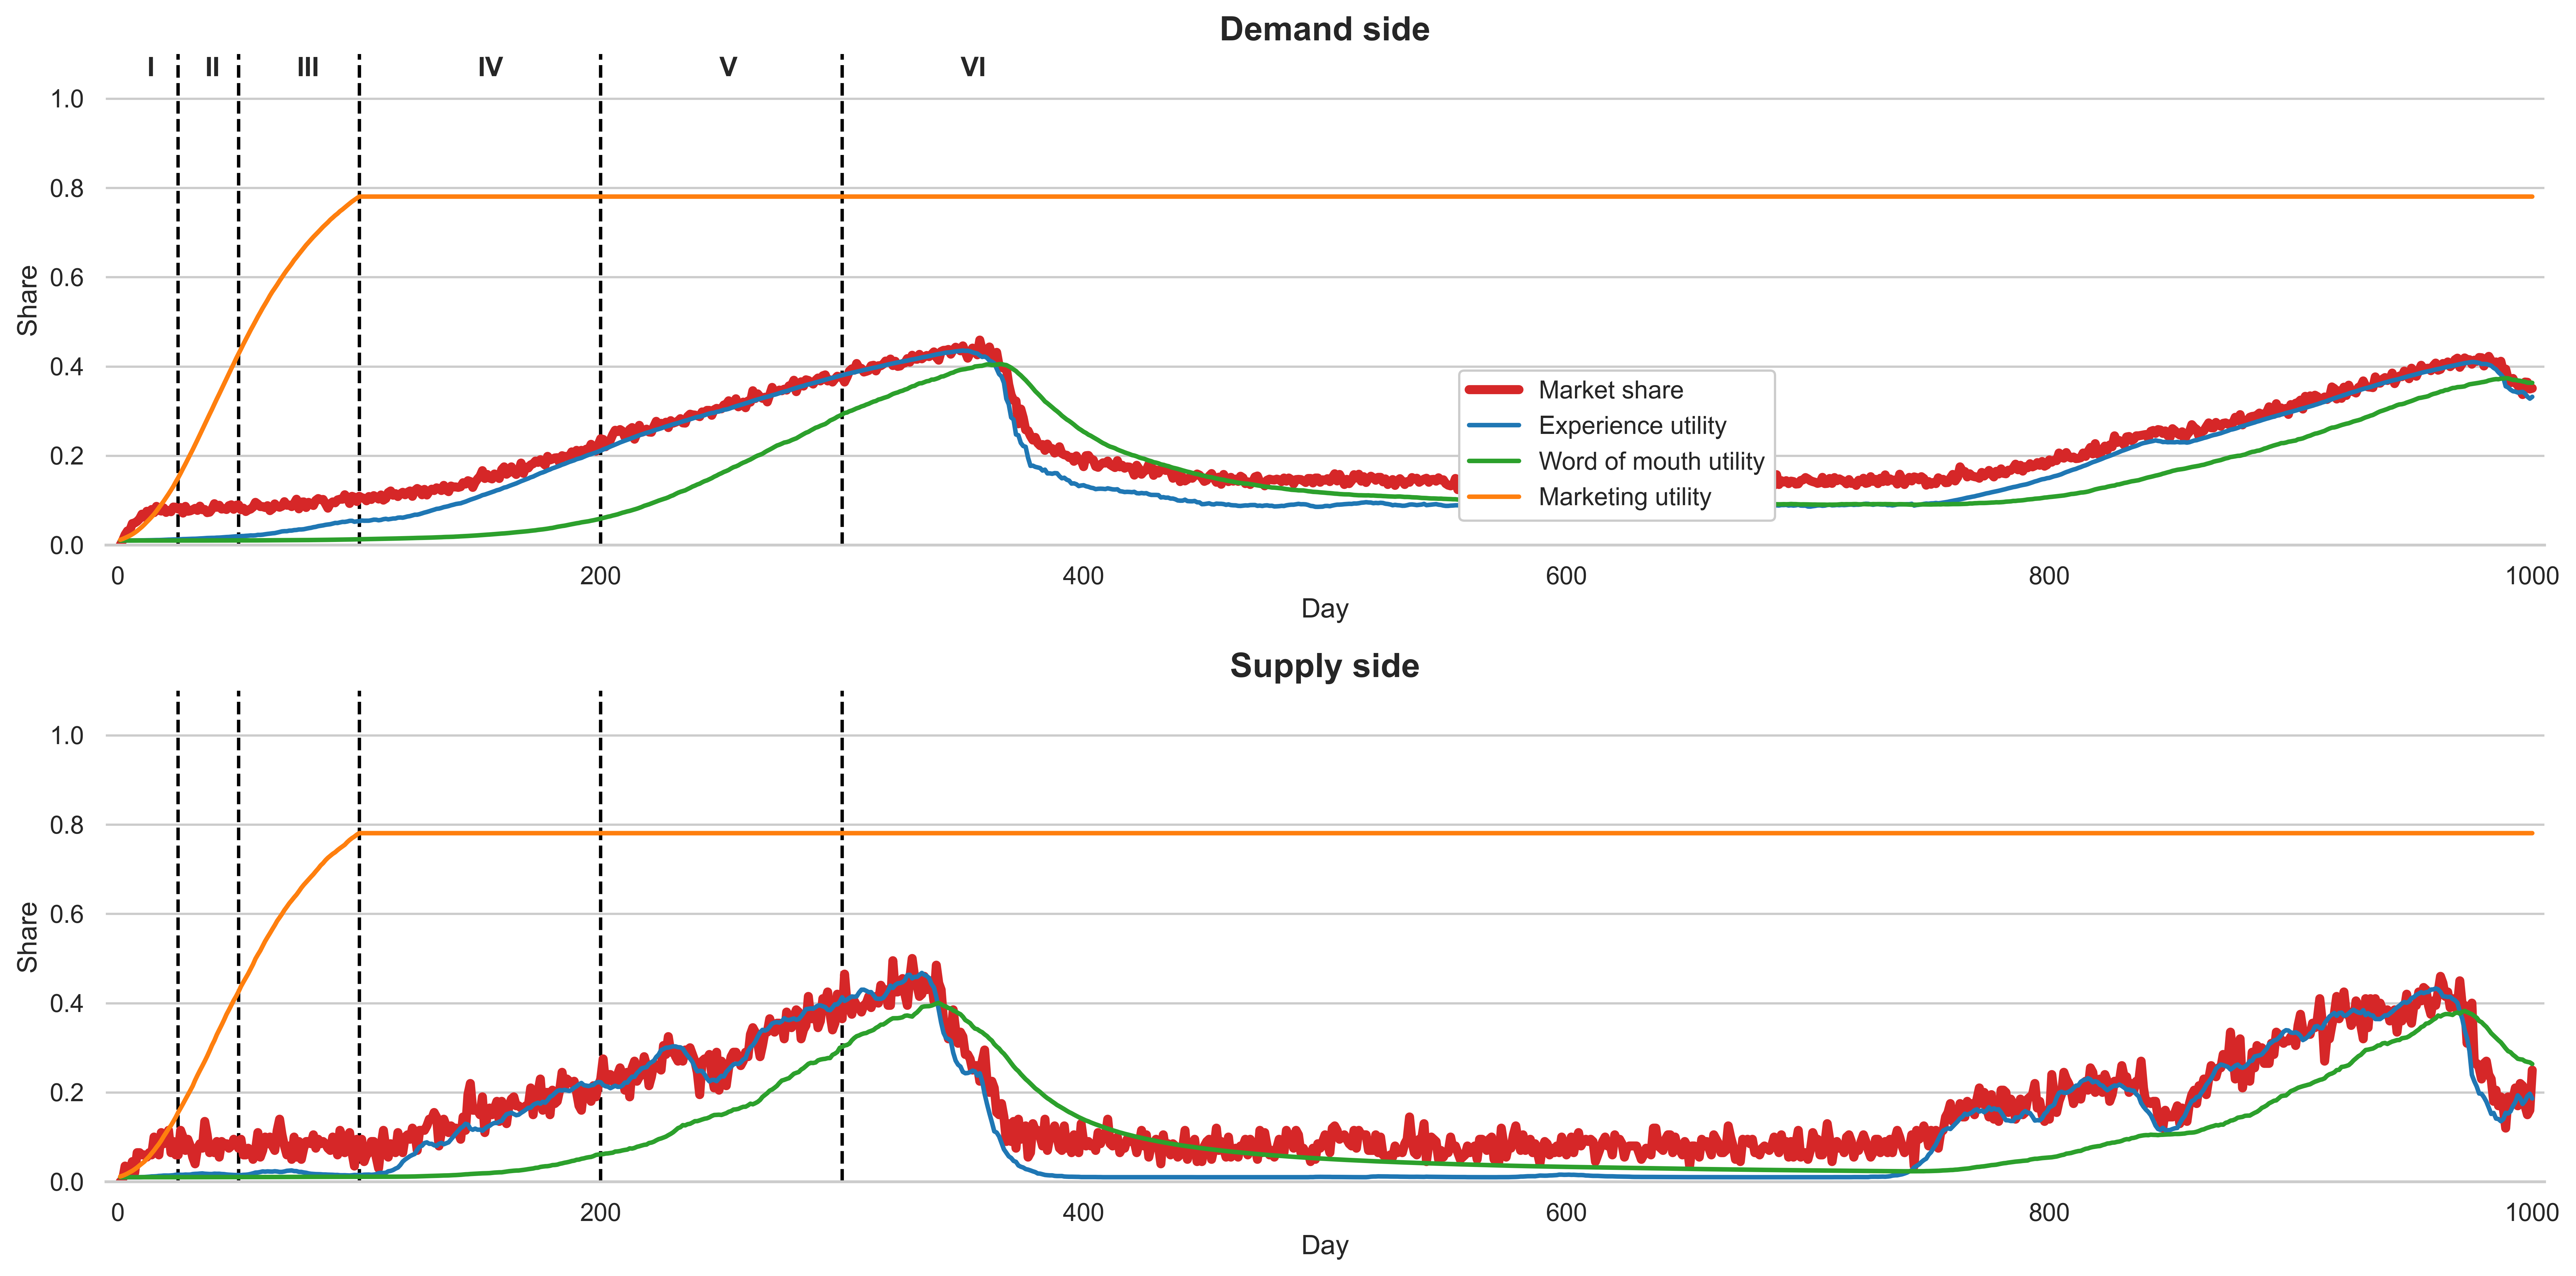

In [8]:
sim0 = sim_rln_train
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,1005))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim_rln_test,agent_test = MaaSSim.simulators.simulate_RLn_with_agent(input_agent=agent,params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

In [ ]:
sim_rln_test.RL.to_csv('../RL_EXP/csv/303030_5x/400_24x24x24_1585_0.001_rev_only_test_3.csv')

In [ ]:
sim0 = sim_rln_test
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sim = sim_rln

In [ ]:
sim.res[100].veh_exp

In [ ]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [ ]:
sim.res[100].pax_exp.plat_revenue

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [ ]:
sim.platforms.fare[1]

In [ ]:
sim

In [ ]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
df.Platform_rev.mean()

In [ ]:
df.Platform_rev.cumsum()

In [ ]:
20/582

In [ ]:
=====================================================================================

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [ ]:
df = pd.read_csv('csv/baseline_fast.csv')
df

In [ ]:
df.Platform_rev.max()

In [ ]:
2638.8502